Description for which files are where, what is needed

### What you need

This tutorial goes from parsing data to visualizing the posterior of MDSINE2.

The tables that you will need are:
* taxa counts
* qPCR table
* perturbations table
* taxonomy table
* metadata file

Our data is preprocessed in objects from a previous tutorial. For this tutorial we unpacking our data into it's composite tables to walk you through constructing your own `Study` objects


In [1]:
%matplotlib inline

import mdsine2 as md2
from mdsine2.names import STRNAMES
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import logging

md2.LoggingConfig(level=logging.INFO)

In [2]:
# Make example datasets from preprocessed data
def make_toy(dset):
    to_delete = []
    for taxon in dset.taxa:
        if taxon.idx >= 15:
            to_delete.append(taxon.name)
    dset.pop_taxa(to_delete)
    
    os.makedirs(os.path.join('output/data',dset.name+'-toy'), exist_ok=True)
    dset.write_metadata_to_csv(path=os.path.join('output/data',dset.name+'-toy','metadata.tsv'))
    dset.write_qpcr_to_csv(path=os.path.join('output/data',dset.name+'-toy','qpcr.tsv'))
    if dset.perturbations is not None:
        dset.write_perturbations_to_csv(path=os.path.join('output/data',dset.name+'-toy','perturbations.tsv'))
    dset.write_reads_to_csv(path=os.path.join('output/data',dset.name+'-toy','reads.tsv'))
    dset.taxa.write_taxonomy_to_csv(path=os.path.join('output/data',dset.name+'-toy','taxonomy.tsv'))

In [3]:
healthy = md2.Study.load('../processed_data/gibson_healthy_agg_taxa_filtered.pkl')
uc = md2.Study.load('../processed_data/gibson_uc_agg_taxa_filtered.pkl')
replicates = md2.Study.load('../processed_data/gibson_replicates_agg_taxa_filtered.pkl')

make_toy(dset=healthy)
make_toy(dset=uc)
make_toy(dset=replicates)

### Metadata table
The following table is a metadata table. It tells the `Study` object what subject and timepoint each sample belongs to

In [4]:
# Load metadata table
metadata = pd.read_csv('output/data/healthy-toy/metadata.tsv', sep='\t')
metadata.head()

sampleID  subject  time
0    2-D10        2  10.0
1    2-D11        2  11.0
2    2-D14        2  14.0
3    2-D16        2  16.0
4    2-D18        2  18.0

### qPCR table
The following table is a qPCR table. This has the replicate measurements of the qPCR for every sample.

In [5]:
# qPCR table
qpcr = pd.read_csv('output/data/healthy-toy/qpcr.tsv', sep='\t')
qpcr.head()

sampleID  measurement1  measurement2  measurement3
0    2-D10  4.129004e+10  6.423568e+10  8.384557e+10
1    2-D11  2.981363e+10  6.587538e+10  5.077812e+10
2    2-D14  1.647771e+10  7.104907e+10  2.498869e+10
3    2-D16  3.666487e+10  6.237899e+10  3.875999e+10
4    2-D18  4.523257e+10  2.320504e+10  2.330249e+10

### Perturbation table
The following table is a perturbation table. This tells the `Study` object which subject has a perturbation and when. There can be multiple perturbations for each subject. Note that this is only necessary if you have perturbations in your dataset.

In [6]:
perturbations = pd.read_csv('output/data/healthy-toy/perturbations.tsv', sep='\t')
perturbations

name  start   end  subject
0   High Fat Diet   21.5  28.5        2
1   High Fat Diet   21.5  28.5        3
2   High Fat Diet   21.5  28.5        4
3   High Fat Diet   21.5  28.5        5
4      Vancomycin   35.5  42.5        2
5      Vancomycin   35.5  42.5        3
6      Vancomycin   35.5  42.5        4
7      Vancomycin   35.5  42.5        5
8      Gentamicin   50.5  57.5        2
9      Gentamicin   50.5  57.5        3
10     Gentamicin   50.5  57.5        4
11     Gentamicin   50.5  57.5        5

### Reads table
The following table is a reads table. This shows the number of counts each taxa has for each sample ID.

In [7]:
reads = pd.read_csv('output/data/healthy-toy/reads.tsv', sep='\t')
reads.head()

name  2-D10  2-D11  2-D14  2-D16  2-D18  2-D1AM  2-D1PM  2-D21AM  2-D21PM  \
0  OTU_1   1227   1793   8023   9503   3243    1830     199     3539     5270   
1  OTU_2  17362   6887  17165  29854  36759    2929    9880    15863    20619   
2  OTU_3   8162   4911   9743   5776  11136     213     555     8566    12664   
3  OTU_4   3793   2713   2683   3423   5351       9      32     3815     6512   
4  OTU_5   5852   3034   6870   6102   9957       2       7     4626     6412   

   2-D22AM  2-D22PM  2-D23AM  2-D23PM  2-D24  2-D25  2-D28AM  2-D28PM  \
0     3866     3899     1984      807   2299   1349     1074      855   
1     2725     1792      466       51     86     38       25       34   
2    21003    19170    19830    16629  14891  31789    15839    13884   
3     1091      617      215      318    273    551      366      209   
4      691      503      197      388    172    289      162      186   

   2-D29AM  2-D29PM  2-D2AM  2-D2PM  2-D30AM  2-D30PM  2-D31AM  2-D31PM  \
0     3479     3910     489    1056     5113     5624     7096     5788   
1     1317     2217   24422   17184     5490     5924     6906     7466   
2    10019    15779     878    4879     7562     9470    11915    16469   
3     2626     3040     205     264     4519     5056     4976     4818   
4     2677     1548      71      84     1740     1395     2559     1266   

   2-D32  2-D33  2-D35AM  2-D35PM  2-D36AM  2-D36PM  2-D37AM  2-D37PM  2-D38  \
0  10237   2784     2711     2421     1554     1216      259      154    114   
1   9783   7856    10490     9939    18164    17769    16694     8553   8842   
2  13191   9874     8836     6895     5094    14544     2291     1194    458   
3   1757   4139     5070     5575     7195     7188    18681    20984  13723   
4   2868   3018     2967     3276     9350     9143      707      313     77   

   2-D39  2-D3AM  2-D3PM  2-D42AM  2-D42PM  2-D43AM  2-D43PM  2-D44AM  \
0    100    1474    3227     1963     2950      126      202      207   
1   5806   11193   15984     8567     6995     5108     6693     5785   
2    116    5842    8939      126       23       20       47       54   
3   7217     203     371     3507     3929     5977    11837    10752   
4    350     895    1121      214      284       89      143       72   

   2-D44PM  2-D45AM  2-D45PM  2-D46  2-D47  2-D4AM  2-D4PM   2-D5  2-D50AM  \
0      222       89       50    185    180    7637    4237   5597       53   
1     6963     5880     6755   8239   7199   21915   13035  15798      625   
2       50      270     1248   4086   4776   11968   12345   7441     2124   
3    12467    16906    21535  26287  21442    1124     906   1159    32890   
4      270       68       94    272   4075    2338    2171   3073     2234   

   2-D50PM  2-D51AM  2-D51PM  2-D52AM  2-D52PM  2-D53  2-D54  2-D57AM  \
0       47       29       48      162       37    188   2349     5520   
1      751     2368     2556      632      206    278    177      644   
2      922     1647     2651      179       42     72     19       10   
3    31234    18899    15800    27427    18337  11751  11131     5372   
4     4275     1704     2197     2899     2423   5110   5053     6722   

   2-D57PM  2-D58AM  2-D58PM  2-D59AM  2-D59PM   2-D6  2-D60AM  2-D60PM  \
0     3265     3892     3881     1646     1805   6129     1913     6688   
1     1857     5473     5433     2847     2693  14811     2652     8942   
2        0       13        9        6        3   4962       19       19   
3     4236     6239     7312     6239     8399    988     9308     9043   
4     4262     7589     5362     3944     2194   3616     5433     7774   

   2-D61  2-D62  2-D63  2-D64AM  2-D64PM   2-D7  2-D8   2-D9  3-D10  3-D11  \
0   1730   1269    651      987      853   9591  2503    234   6265   6822   
1   3765   4053   2497     4608     4569  12926  8541  12646  11800  14693   
2     28     11     11        7       24   6209  2010   3556   5306   7339   
3  12250  10925   6086     9824     

### Taxonomy table
The following table is a taxonomy table. For each taxa name, it shows the sequence and taxonomy

In [8]:
taxonomy = pd.read_csv('output/data/healthy-toy/taxonomy.tsv', sep='\t')
taxonomy

name                                           sequence   kingdom  \
0    OTU_1  TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...  Bacteria   
1    OTU_2  TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...  Bacteria   
2    OTU_3  TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...  Bacteria   
3    OTU_4  TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...  Bacteria   
4    OTU_5  TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...  Bacteria   
5    OTU_6  TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...  Bacteria   
6    OTU_7  TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...  Bacteria   
7    OTU_8  TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...  Bacteria   
8    OTU_9  TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...  Bacteria   
9   OTU_10  TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...  Bacteria   
10  OTU_11  TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCA...  Bacteria   
11  OTU_12  TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...  Bacteria   
12  OTU_13  TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...  Bacteria   
13  OTU_14  TACGTAGGTGGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGNGCA...  Bacteria   
14  OTU_15  TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...  Bacteria   

             phylum                class               order  \
0     Bacteroidetes          Bacteroidia       Bacteroidales   
1     Bacteroidetes          Bacteroidia       Bacteroidales   
2   Verrucomicrobia     Verrucomicrobiae  Verrucomicrobiales   
3     Bacteroidetes          Bacteroidia       Bacteroidales   
4    Proteobacteria   Betaproteobacteria     Burkholderiales   
5     Bacteroidetes          Bacteroidia       Bacteroidales   
6     Bacteroidetes          Bacteroidia       Bacteroidales   
7     Bacteroidetes          Bacteroidia       Bacteroidales   
8     Bacteroidetes          Bacteroidia       Bacteroidales   
9     Bacteroidetes          Bacteroidia       Bacteroidales   
10   Proteobacteria  Gammaproteobacteria    Enterobacterales   
11    Bacteroidetes          Bacteroidia       Bacteroidales   
12    Bacteroidetes          Bacteroidia       Bacteroidales   
13       Firmicutes        Negativicutes   Acidaminococcales   
14    Bacteroidetes          Bacteroidia       Bacteroidales   

                family                  genus            species  
0       Bacteroidaceae            Phocaeicola                NaN  
1       Bacteroidaceae            Bacteroides    ovatus/fragilis  
2      Akkermansiaceae            Akkermansia        muciniphila  
3       Bacteroidaceae            Bacteroides                NaN  
4       Sutterellaceae         Parasutterella  excrementihominis  
5       Bacteroidaceae            Bacteroides     fragilis/dorei  
6       Bacteroidaceae            Bacteroides             caccae  
7       Bacteroidaceae            Bacteroides         salyersiae  
8       Bacteroidaceae            Bacteroides                NaN  
9       Bacteroidaceae            Bacteroides          uniformis  
10  Enterobacteriaceae   Escherichia/Shigella                NaN  
11  Porphyromonadaceae        Parabacteroides         distasonis  
12  Porphyromonadaceae        Parabacteroides        goldsteinii  
13  Acidaminococcaceae  Phascolarctobacterium            faecium  
14      Bacteroidaceae            Bacteroides             nordii

With these 5 tables, you can run our model. You can parse them directly into a `Study` object with the `mdsine2.dataset.parse` command:

In [9]:
h_toy = md2.dataset.parse(name='healthy-toy-dataset', 
                         taxonomy='output/data/healthy-toy/taxonomy.tsv', 
                         reads='output/data/healthy-toy/reads.tsv', 
                         qpcr='output/data/healthy-toy/qpcr.tsv', 
                         perturbations='output/data/healthy-toy/perturbations.tsv', 
                         metadata='output/data/healthy-toy/metadata.tsv')
uc_toy = md2.dataset.parse(name='uc-toy-dataset', 
                         taxonomy='output/data/uc-toy/taxonomy.tsv', 
                         reads='output/data/uc-toy/reads.tsv', 
                         qpcr='output/data/uc-toy/qpcr.tsv', 
                         perturbations='output/data/uc-toy/perturbations.tsv', 
                         metadata='output/data/uc-toy/metadata.tsv')
rep_toy = md2.dataset.parse(name='replicates-toy-dataset', 
                         taxonomy='output/data/replicates-toy/taxonomy.tsv', 
                         reads='output/data/replicates-toy/reads.tsv', 
                         qpcr='output/data/replicates-toy/qpcr.tsv', 
                         metadata='output/data/replicates-toy/metadata.tsv')


INFO:base.1275: TaxaSet parsng new taxonomy table. Resetting
INFO:base.1275: TaxaSet parsng new taxonomy table. Resetting
INFO:base.1275: TaxaSet parsng new taxonomy table. Resetting


You would just read these in with this parser. These are identical to our precomputed dataset 

# Learning the Negative Binomial dispersion parameters

This corresponds to the script ``

words here

In [10]:
params = md2.config.NegBinConfig(
    seed=0, burnin=100, n_samples=200,
    checkpoint=100, basepath='output/negbin/run2')

description

In [11]:
mcmc_negbin = md2.negbin.build_graph(params=params, graph_name=rep_toy.name, 
                              subjset=rep_toy)

INFO:inference.568: Setting Single Write, Multiple Read Mode
INFO:inference.573: Setting the trace of learned parameters
INFO:inference.574: #######################################
INFO:inference.576: Setting the trace of Negative binomial dispersion a0
INFO:inference.576: Setting the trace of Negative binomial dispersion a1
INFO:inference.576: Setting the trace of Filtering
INFO:inference.578: Setting the trace for diagnostic variables
INFO:inference.579: ##########################################


description

In [12]:
mcmc_negbin = md2.negbin.run_graph(mcmc_negbin, crash_if_error=True)

INFO:inference.446: 

Inference iteration 0/200, time: 0.0
INFO:inference.455: Negative binomial dispersion a0: 1e-10
INFO:inference.455: Negative binomial dispersion a1: 0.1
INFO:inference.455: Filtering: NA
INFO:inference.446: 

Inference iteration 1/200, time: 0.4949991703033447
INFO:inference.455: Negative binomial dispersion a0: Value: 1e-10, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.09932993484270942, Acceptance rate: 1.0
INFO:inference.455: Filtering: no-mp : Time: 0.1340, Acc: [0.333, 0.200, 0.333], data/sec: 335.82
INFO:inference.446: 

Inference iteration 2/200, time: 0.008000373840332031
INFO:inference.455: Negative binomial dispersion a0: Value: 9.612139383543583e-11, Acceptance rate: 0.5
INFO:inference.455: Negative binomial dispersion a1: Value: 0.07611843510778384, Acceptance rate: 1.0
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.333, 0.267, 0.533], data/sec: 11258.87
INFO:inference.446: 

Inference iteration 3/200

INFO:inference.455: Negative binomial dispersion a0: Value: 5.433152020006895e-11, Acceptance rate: 0.42857142857142855
INFO:inference.455: Negative binomial dispersion a1: Value: 0.05290413764815772, Acceptance rate: 0.6190476190476191
INFO:inference.455: Filtering: no-mp : Time: 0.0030, Acc: [0.267, 0.267, 0.267], data/sec: 14996.32
INFO:inference.446: 

Inference iteration 22/200, time: 0.006005764007568359
INFO:inference.455: Negative binomial dispersion a0: Value: 5.096746550369834e-11, Acceptance rate: 0.45454545454545453
INFO:inference.455: Negative binomial dispersion a1: Value: 0.05290413764815772, Acceptance rate: 0.5909090909090909
INFO:inference.455: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.333, 0.467], data/sec: 14973.72
INFO:inference.446: 

Inference iteration 23/200, time: 0.007999181747436523
INFO:inference.455: Negative binomial dispersion a0: Value: 3.436668653129214e-11, Acceptance rate: 0.4782608695652174
INFO:inference.455: Negative binomial dispersion a1: 

INFO:inference.455: Negative binomial dispersion a1: Value: 0.05659787402060928, Acceptance rate: 0.6341463414634146
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.333, 0.533, 0.267], data/sec: 11250.14
INFO:inference.446: 

Inference iteration 42/200, time: 0.008008003234863281
INFO:inference.455: Negative binomial dispersion a0: Value: 2.0481344749675447e-12, Acceptance rate: 0.40476190476190477
INFO:inference.455: Negative binomial dispersion a1: Value: 0.05659787402060928, Acceptance rate: 0.6190476190476191
INFO:inference.455: Filtering: no-mp : Time: 0.0030, Acc: [0.200, 0.333, 0.133], data/sec: 14964.22
INFO:inference.446: 

Inference iteration 43/200, time: 0.005997419357299805
INFO:inference.455: Negative binomial dispersion a0: Value: 2.0481344749675447e-12, Acceptance rate: 0.3953488372093023
INFO:inference.455: Negative binomial dispersion a1: Value: 0.05003316278345163, Acceptance rate: 0.627906976744186
INFO:inference.455: Filtering: no-mp : Time: 0.0030, Ac

INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.24
INFO:inference.455: Negative binomial dispersion a1: Value: 0.07591896190663665, Acceptance rate: 0.56
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.333, 0.400, 0.333], data/sec: 11258.20
INFO:inference.446: 

Inference iteration 63/200, time: 0.006998300552368164
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.22
INFO:inference.455: Negative binomial dispersion a1: Value: 0.06881053138741283, Acceptance rate: 0.56
INFO:inference.455: Filtering: no-mp : Time: 0.0030, Acc: [0.467, 0.400, 0.467], data/sec: 15001.09
INFO:inference.446: 

Inference iteration 64/200, time: 0.007001638412475586
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.22
INFO:inference.455: Negative binomial dispersion a1: Value: 0.06514442553913363, Acceptance rate: 0.58
INFO:inference.455:

INFO:inference.455: Negative binomial dispersion a1: Value: 0.059167916859363984, Acceptance rate: 0.52
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.267, 0.400, 0.333], data/sec: 11244.11
INFO:inference.446: 

Inference iteration 84/200, time: 0.006992816925048828
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.04
INFO:inference.455: Negative binomial dispersion a1: Value: 0.06434788181977058, Acceptance rate: 0.52
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.600, 0.267, 0.200], data/sec: 11263.57
INFO:inference.446: 

Inference iteration 85/200, time: 0.007002115249633789
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.04
INFO:inference.455: Negative binomial dispersion a1: Value: 0.06434788181977058, Acceptance rate: 0.5
INFO:inference.455: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.267, 0.600], data/sec: 14995.13
INFO:inference.446: 

Inf

INFO:inference.455: Filtering: no-mp : Time: 0.0050, Acc: [0.533, 0.400, 0.333], data/sec: 8992.50
INFO:inference.446: 

Inference iteration 105/200, time: 0.008999347686767578
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.05764379659694878, Acceptance rate: 0.46
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.533, 0.400, 0.267], data/sec: 11242.77
INFO:inference.446: 

Inference iteration 106/200, time: 0.009001970291137695
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.05503986513928517, Acceptance rate: 0.48
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.467, 0.467, 0.333], data/sec: 11233.41
INFO:inference.446: 

Inference iteration 107/200, time: 0.010998725891113281
INFO:inference.455: Negative binomial dispersion a0

INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.05229144933116436, Acceptance rate: 0.48
INFO:inference.455: Filtering: no-mp : Time: 0.0050, Acc: [0.533, 0.400, 0.133], data/sec: 9010.11
INFO:inference.446: 

Inference iteration 127/200, time: 0.007997274398803711
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.06848080232784978, Acceptance rate: 0.48
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.467, 0.600, 0.467], data/sec: 11242.77
INFO:inference.446: 

Inference iteration 128/200, time: 0.008996009826660156
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.05352507415677911, Acceptance rate: 0.48
INFO:inference.455: F

INFO:inference.455: Negative binomial dispersion a1: Value: 0.04984504054112914, Acceptance rate: 0.6
INFO:inference.455: Filtering: no-mp : Time: 0.0050, Acc: [0.333, 0.400, 0.333], data/sec: 8998.51
INFO:inference.446: 

Inference iteration 148/200, time: 0.009003400802612305
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.04984504054112914, Acceptance rate: 0.58
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.400, 0.400, 0.400], data/sec: 11244.11
INFO:inference.446: 

Inference iteration 149/200, time: 0.008998394012451172
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.05291161640746216, Acceptance rate: 0.58
INFO:inference.455: Filtering: no-mp : Time: 0.0050, Acc: [0.400, 0.267, 0.667], data/sec: 8999.36
INFO:inference.446: 

Infere

INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.600, 0.333, 0.467], data/sec: 11255.51
INFO:inference.446: 

Inference iteration 169/200, time: 0.006998300552368164
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.07936467417134285, Acceptance rate: 0.58
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.533, 0.333, 0.467], data/sec: 11252.16
INFO:inference.446: 

Inference iteration 170/200, time: 0.009000539779663086
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.07228201190866185, Acceptance rate: 0.6
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.400, 0.467, 0.467], data/sec: 11238.76
INFO:inference.446: 

Inference iteration 171/200, time: 0.007997989654541016
INFO:inference.455: Negative binomial dispersion a0

INFO:inference.446: 

Inference iteration 190/200, time: 0.007003068923950195
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.06150373754895097, Acceptance rate: 0.54
INFO:inference.455: Filtering: no-mp : Time: 0.0040, Acc: [0.400, 0.400, 0.467], data/sec: 11240.10
INFO:inference.446: 

Inference iteration 191/200, time: 0.007000446319580078
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispersion a1: Value: 0.06150373754895097, Acceptance rate: 0.54
INFO:inference.455: Filtering: no-mp : Time: 0.0030, Acc: [0.467, 0.400, 0.467], data/sec: 14993.94
INFO:inference.446: 

Inference iteration 192/200, time: 0.005998134613037109
INFO:inference.455: Negative binomial dispersion a0: Value: 1.1642672989308661e-13, Acceptance rate: 0.0
INFO:inference.455: Negative binomial dispers

description, we are repeating this on the smaller dataset so you know how to run it and know what it looks like. This is not representative of the real results because we only have the ten most abundant taxa here.

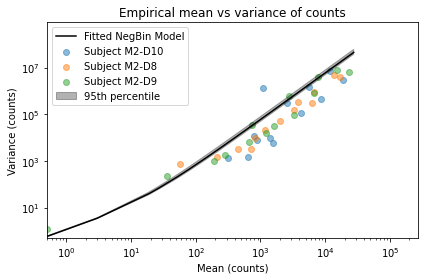

In [13]:
fig = md2.negbin.visualize_learned_negative_binomial_model(mcmc_negbin)
fig.tight_layout()

# Run the model

In [14]:
# Get a0 and a1 from negbin (get the mean of the posterior)
from mdsine2.names import STRNAMES
a0 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A0])['mean']
a1 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A1])['mean']

print('negbin a0', a0)
print('negbin a1', a1)

basepath = 'output/mdsine2/uc0'
os.makedirs(basepath, exist_ok=True)


# Initialize parameters of the model
params = md2.config.MDSINE2ModelConfig(
    basepath=basepath, seed=0, burnin=50, 
    n_samples=100, negbin_a0=a0, negbin_a1=a1, checkpoint=50)

# The default number of modules is 30, which is larger than the number of taxa
# that we have in this dataset, which would throw a flag.
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'

negbin a0 1.1642672989308661e-13
negbin a1 0.05972242507901712


In [15]:
# initilize the graph
mcmc_uc0 = md2.initialize_graph(params=params, graph_name=uc_toy.name, subjset=uc_toy)


INFO:base.2743: max_value found: 1797837340792.1643, scaling_factor: 5.5622384590108656e-11
INFO:run.87: Normalizing abundances for a max value of 100. Normalization constant: 5.5622E-11
INFO:run.254: There are 372 qPCR measurements for 3 buckets. Each bucket is 124 measurements long
INFO:run.289: Initializing Filtering
INFO:posterior.2669: Setting up the essential timepoints
INFO:posterior.2682: Essential timepoints: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   6.   7.   8.   9.  10.  11.  14.  16.  18.  21.  21.5 22.  22.5 23.  23.5 24.  25.  28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  33.  35.  35.5 36.  36.5 37.  37.5 38.  39.  42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  47.  50.  50.5 51.  51.5 52.  52.5 53.  54.  57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
INFO:run.289: Initializing Zero inflation
INFO:design_matrices.850: Initializing LHS vector
INFO:design_matrices.1005: Initializing growth design matrix
INFO:design_matrices.931: Initializing self-inte

INFO:run.374: 		prior.loc: 0
INFO:run.372: 	perturbation Vancomycin
INFO:run.373: 		value: {100115: 0, 100116: 0, 100117: 0, 100118: 0, 100119: 0, 100120: 0, 100121: 0, 100122: 0, 100123: 0, 100124: 0, 100125: 0, 100126: 0, 100127: 0, 100128: 0, 100129: 0}
INFO:run.374: 		prior.loc: 0
INFO:run.372: 	perturbation Gentamicin
INFO:run.373: 		value: {100115: 0, 100116: 0, 100117: 0, 100118: 0, 100119: 0, 100120: 0, 100121: 0, 100122: 0, 100123: 0, 100124: 0, 100125: 0, 100126: 0, 100127: 0, 100128: 0, 100129: 0}
INFO:run.374: 		prior.loc: 0
INFO:run.375: Perturbation prior variances:
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.380: Perturbation indicators:
INFO:run.383: 	perturbation High Fat Diet: [False False False False False False False False False False False False 

In [16]:
mcmc_uc0 = md2.run_graph(mcmc_uc0, crash_if_error=True)

INFO:inference.446: 

Inference iteration 0/100, time: 0.0
INFO:inference.455: Cluster interaction indicator parameter: None
INFO:inference.455: Cluster interaction probability: 0.09234190994988938
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: Nones
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (0/15): [False False False False False False False False False False False False False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.1527842458791451
	perturbation Vancomycin: 0.1527842458791451
	perturbation Gentamicin: 0.1527842458791451
INFO:inference.455: Logistic growth parameters (growth, se

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 9.483892334955561
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -5.633760869066583
	perturbation Vancomycin: -32.394691549238026
	perturbation Gentamicin: 19.22092898194378
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.2111291303141315, Acceptance rate: 1.0
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.8397508500772749, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 4047.7156572959684
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 204.06655221025355
	perturbation Vancomycin: 1115.7342315369867
	perturbation Ge

INFO:inference.455: Cluster interaction probability: 0.06389609988570996
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.017994165420532227s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (2/15): [False False False False False False False False  True False False False  True False False]
perturbation Gentamicin (2/15): [False False False False False False False  True False False False False  True False False]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.03955137360995759
	perturbation Vancomycin: 0.05797388977555838
	perturbation Gentamicin: 0.012043708419812338
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.13844534 0.20611971 0.57753856 0.16961057 0.6055

INFO:inference.455: Clustering concentration parameter: 2548.488953421099
INFO:posterior.1584: 0/15: 0
INFO:posterior.1584: 1/15: 1
INFO:posterior.1584: 2/15: 4
INFO:posterior.1584: 3/15: 12
INFO:posterior.1584: 4/15: 13
INFO:posterior.1584: 5/15: 11
INFO:posterior.1584: 6/15: 10
INFO:posterior.1584: 7/15: 2
INFO:posterior.1584: 8/15: 6
INFO:posterior.1584: 9/15: 9
INFO:posterior.1584: 10/15: 14
INFO:posterior.1584: 11/15: 3
INFO:posterior.1584: 12/15: 7
INFO:posterior.1584: 13/15: 8
INFO:posterior.1584: 14/15: 5
INFO:inference.446: 

Inference iteration 5/100, time: 1.2759852409362793
INFO:inference.455: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fal

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -162.62799033310483
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 48.665548805328434
	perturbation Vancomycin: 35.89010203038467
	perturbation Gentamicin: -29.34852655539822
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.640557624515564, Acceptance rate: 1.0
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5670669973165798, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 25.90573495088634
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4625.237453625238
	perturbation Vancomycin: 843.7061600958893
	perturbation Genta

INFO:inference.455: Cluster interaction probability: 0.0009595080217071794
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.012998819351196289s
perturbation High Fat Diet (0/14): [False False False False False False False False False False False False False False]
perturbation Vancomycin (1/14): [False False False  True False False False False False False False False False False]
perturbation Gentamicin (0/14): [False False False False False False False False False False False False False False]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.004758827871727658
	perturbation Vancomycin: 0.08497550730684672
	perturbation Gentamicin: 0.003914953291589338
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.30182409 0.23439326 0.60476892 0.22176458 0.647522   0.04205184

INFO:inference.455: Clustering concentration parameter: 10.487999079449878
INFO:inference.446: 

Inference iteration 10/100, time: 0.42903566360473633
INFO:inference.455: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False F

INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5798673447720847, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 280.509922366224
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1919.3375699410437
	perturbation Vancomycin: 738.2462272780818
	perturbation Gentamicin: 1678.8704536874322
INFO:inference.455: Process Variance parameter: 4.2979331147472575, empirical_variance: 4.26916
INFO:inference.455: Filtering: no-mp - Time: 0.3060, Acc: [0.628, 0.614, 0.623, 0.629, 0.619], data/sec: 18382.50
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 14
Cluster 100145
	members: ['OTU_1']
	size: 1
Cluster 100154
	members: ['OTU_16']
	size: 1
Cluster 100155
	members: ['OTU_8']
	size: 1
Clust

INFO:inference.455: Cluster interaction probability: 0.007194770523757083
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.013031244277954102s
perturbation High Fat Diet (0/13): [False False False False False False False False False False False False False]
perturbation Vancomycin (3/13): [ True False  True  True False False False False False False False False False]
perturbation Gentamicin (0/13): [False False False False False False False False False False False False False]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.009022038507340934
	perturbation Vancomycin: 0.2504576332867969
	perturbation Gentamicin: 0.02753783019523799
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.78228761 0.3214719  0.46763266 0.3415586  0.39397387 0.37726895 0.58734153 0.3358324

INFO:inference.455: Clustering concentration parameter: 34.66063875674127
INFO:inference.446: 

Inference iteration 15/100, time: 0.4139750003814697
INFO:inference.455: Cluster interaction indicator parameter: [False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fal

INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 14881.100027008128
	perturbation Vancomycin: 8436.794970355193
	perturbation Gentamicin: 644.3144668023924
INFO:inference.455: Process Variance parameter: 4.070453710028116, empirical_variance: 4.02216
INFO:inference.455: Filtering: no-mp - Time: 0.2930, Acc: [0.606, 0.612, 0.632, 0.600, 0.608], data/sec: 19197.84
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 13
Cluster 100154
	members: ['OTU_9', 'OTU_17', 'OTU_16']
	size: 3
Cluster 100160
	members: ['OTU_13']
	size: 1
Cluster 100175
	members: ['OTU_7']
	size: 1
Cluster 100179
	members: ['OTU_10']
	size: 1
Cluster 100181
	members: ['OTU_5']
	size: 1
Cluster 100183
	members: ['OTU_1']
	size: 1
Cluster 100185
	members: ['OTU_6']
	size: 1
Cluster 100186
	members: ['OTU_18']
	size: 1
Cluster 100187
	membe

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -2.154072941488706
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 59.24554414552452
	perturbation Vancomycin: 79.88996868487311
	perturbation Gentamicin: 43.92928507611232
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.7435158625056546, Acceptance rate: 1.0
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.8512579926154002, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 48.33255474609229
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 7672.358028186977
	perturbation Vancomycin: 8349.326610960603
	perturbation Gentami

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 5.615953657607601
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -77.555269015841
	perturbation Vancomycin: 13.672805816993703
	perturbation Gentamicin: -153.65543367440435
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5885718387558714, Acceptance rate: 1.0
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.034247676552913, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 30.54688105398761
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3471.0271681651802
	perturbation Vancomycin: 1810.732056009923
	perturbation Gentam

INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.009246709884839084
	perturbation Vancomycin: 0.09184883233949531
	perturbation Gentamicin: 0.12346444753302853
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.67006525 0.30282185 0.81917369 0.07741431 0.37118642 0.69081697 0.65821801 0.37226113 0.08977058 0.04041844 0.45514753 0.14788071 1.37034219 0.71314802 0.37571764]
Self Interactions:
[2.05089350e-01 1.68791041e-01 3.40337163e-01 9.19939542e+00 9.85966044e-01 4.27016434e-01 1.45343396e+00 8.64171113e-01 1.55765658e+02 1.75034667e+02 2.33803805e+00 5.78609717e+01 4.47891278e+00 2.32060012e+00 4.41684797e+00]
Interactions:
[-1.48813433 -0.99881422]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.33380311]
	 perturbation Gentamici

INFO:inference.455: Cluster interaction probability: 0.045659780411061175
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.010999679565429688s
perturbation High Fat Diet (0/12): [False False False False False False False False False False False False]
perturbation Vancomycin (1/12): [ True False False False False False False False False False False False]
perturbation Gentamicin (2/12): [False False False False False False False False False  True  True False]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0283478977932786
	perturbation Vancomycin: 0.004974460803887143
	perturbation Gentamicin: 0.09756428463285047
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.48668765 0.40424198 0.00702602 0.08880496 0.59289492 0.47977928 0.54074716 0.56583191 0.29637886 0.100

INFO:inference.455: Clustering concentration parameter: 19.312335366309597
INFO:inference.446: 

Inference iteration 26/100, time: 0.37596940994262695
INFO:inference.455: Cluster interaction indicator parameter: [False  True  True False False False  True  True False False  True False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False]
total time: 0.03699159622192383, n_interactions: 7/90, 0.08
INFO:inference.455: Cluster interaction probability: 0.05714906200576357
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.011003971099853516s
pertu

INFO:inference.455: Clustering concentration parameter: 10.616754079023156
INFO:inference.446: 

Inference iteration 28/100, time: 0.3809995651245117
INFO:inference.455: Cluster interaction indicator parameter: [ True False False  True False False False  True False False False False  True  True False False  True False False False False False False  True False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False  True False False]
total time: 0.039002180099487305, n_interactions: 11/90, 0.12
INFO:inference.455: Cluster interaction probability: 0.1198109524698387
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.01197052001953125s
pertur

INFO:inference.455: Filtering: no-mp - Time: 0.2880, Acc: [0.617, 0.611, 0.624, 0.636, 0.621], data/sec: 19531.24
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 10
Cluster 100207
	members: ['OTU_7', 'OTU_17', 'OTU_16']
	size: 3
Cluster 100242
	members: ['OTU_2', 'OTU_9']
	size: 2
Cluster 100251
	members: ['OTU_8']
	size: 1
Cluster 100258
	members: ['OTU_4', 'OTU_13']
	size: 2
Cluster 100259
	members: ['OTU_3']
	size: 1
Cluster 100262
	members: ['OTU_1']
	size: 1
Cluster 100265
	members: ['OTU_12']
	size: 1
Cluster 100269
	members: ['OTU_10']
	size: 1
Cluster 100272
	members: ['OTU_18']
	size: 1
Cluster 100273
	members: ['OTU_5', 'OTU_6']
	size: 2
no mp - Total time: 0.4540064334869385
INFO:inference.455: Clustering concentration parameter: 4.048755832218416
INFO:inference.446: 

Inference iteration 30/100, time: 0.40199995040893555
INFO:inference.455: Cluster interaction indicator parameter: [False  True Fal

INFO:inference.455: Process Variance parameter: 3.5054083424825624, empirical_variance: 3.46096
INFO:inference.455: Filtering: no-mp - Time: 0.3050, Acc: [0.646, 0.624, 0.638, 0.633, 0.613], data/sec: 18442.66
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 10
Cluster 100207
	members: ['OTU_7', 'OTU_17', 'OTU_16']
	size: 3
Cluster 100242
	members: ['OTU_2', 'OTU_9']
	size: 2
Cluster 100251
	members: ['OTU_8']
	size: 1
Cluster 100258
	members: ['OTU_4', 'OTU_13']
	size: 2
Cluster 100259
	members: ['OTU_3']
	size: 1
Cluster 100262
	members: ['OTU_1']
	size: 1
Cluster 100265
	members: ['OTU_12']
	size: 1
Cluster 100269
	members: ['OTU_10']
	size: 1
Cluster 100272
	members: ['OTU_18']
	size: 1
Cluster 100273
	members: ['OTU_5', 'OTU_6']
	size: 2
no mp - Total time: 0.4540064334869385
INFO:inference.455: Clustering concentration parameter: 12.653323465212985
INFO:inference.446: 

Inference iteration 32/100, time: 

INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.510133283838567, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 34.50267186096455
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4946.973376235013
	perturbation Vancomycin: 2740.641241300002
	perturbation Gentamicin: 6206.6428714604135
INFO:inference.455: Process Variance parameter: 3.4565779864778445, empirical_variance: 3.36651
INFO:inference.455: Filtering: no-mp - Time: 0.2860, Acc: [0.640, 0.604, 0.628, 0.617, 0.618], data/sec: 19669.90
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100207
	members: ['OTU_5', 'OTU_7', 'OTU_6', 'OTU_17', 'OTU_16']
	size: 5
Cluster 100242
	members: ['OTU_13']
	size: 1
Cluster 10026

INFO:inference.455: Clustering concentration parameter: 5.352293583642107
INFO:inference.446: 

Inference iteration 36/100, time: 0.34700512886047363
INFO:inference.455: Cluster interaction indicator parameter: [False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False]
total time: 0.0180056095123291, n_interactions: 1/42, 0.02
INFO:inference.455: Cluster interaction probability: 0.054024526384401646
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.008026123046875s
perturbation High Fat Diet (0/7): [False False False False False False False]
perturbation Vancomycin (1/7): [ True False False False False False False]
perturbation Gentamicin (0/7): [False False False False False False False]
INFO:inference.455: Probability parameter for the beta prior of the p

INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.030600781895415673
	perturbation Vancomycin: 0.15654749358903025
	perturbation Gentamicin: 0.008458462910394315
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.90260646 0.50395784 0.64360526 0.02407854 0.83943738 0.62482283 0.82801774 0.41880133 0.13724149 0.32586048 0.23330816 0.07933343 1.30246378 1.3288346  0.38770751]
Self Interactions:
[4.32464879e-01 2.59033981e-01 2.95040781e-01 9.02761006e+00 3.75257564e-01 1.48030833e-01 6.03099973e-01 1.18366459e+00 1.98735198e+02 2.67745351e+02 2.52326253e+00 1.04036512e+02 2.29404069e+00 4.78164029e+00 5.44473057e+00]
Interactions:
[-0.16121724]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.10132873]
	 perturbation Gentamicin: []
INFO:

INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.204395886634673, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 165.90529008677288
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1540.653805041359
	perturbation Vancomycin: 3764.4874823453497
	perturbation Gentamicin: 2718.8099519564817
INFO:inference.455: Process Variance parameter: 3.179140157076966, empirical_variance: 3.15957
INFO:inference.455: Filtering: no-mp - Time: 0.2800, Acc: [0.628, 0.620, 0.619, 0.599, 0.619], data/sec: 20089.25
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100207
	members: ['OTU_5', 'OTU_7', 'OTU_6', 'OTU_16', 'OTU_17']
	size: 5
Cluster 100262
	members: ['OTU_2', 'OTU_1', 'OTU_8', 'OTU

INFO:inference.455: Clustering concentration parameter: 2.8506676374056243
INFO:inference.446: 

Inference iteration 43/100, time: 0.3400003910064697
INFO:inference.455: Cluster interaction indicator parameter: [ True False False False False False False False False False False  True False False False  True False False False False]
total time: 0.012002706527709961, n_interactions: 3/20, 0.15
INFO:inference.455: Cluster interaction probability: 0.26842618220694725
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.007997512817382812s
perturbation High Fat Diet (0/5): [False False False False False]
perturbation Vancomycin (1/5): [ True False False False False]
perturbation Gentamicin (0/5): [False False False False False]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.06057536446496194
	perturbation Vancomycin: 0.0481695546113271


INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.54717447 0.35206339 0.47947535 0.1542185  0.77570981 0.77759851 0.61008569 0.34711284 0.21006674 0.14694211 0.14718126 0.20850316 1.27309395 1.22746602 0.26235249]
Self Interactions:
[  0.39347195   0.25222832   0.24458212   5.96880436   0.21665225   0.45843369   0.22245639   1.35115404 164.04454908 136.5703649    1.68204828  94.81412553   3.59588781   3.59735313   4.48824082]
Interactions:
[-0.18799739]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.19755494]
	 perturbation Gentamicin: []
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 4.270470540285675
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -84.33516117341591
	perturbation Vancomycin: 26.16887189391655

INFO:inference.455: Process Variance parameter: 2.93139718143, empirical_variance: 2.97798
INFO:inference.455: Filtering: no-mp - Time: 0.2940, Acc: [0.621, 0.645, 0.630, 0.611, 0.617], data/sec: 19132.47
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100207
	members: ['OTU_5', 'OTU_6', 'OTU_7', 'OTU_17', 'OTU_16']
	size: 5
Cluster 100262
	members: ['OTU_4', 'OTU_2', 'OTU_1', 'OTU_13', 'OTU_10', 'OTU_12']
	size: 6
Cluster 100305
	members: ['OTU_3', 'OTU_9', 'OTU_8', 'OTU_18']
	size: 4
no mp - Total time: 0.19500350952148438
INFO:inference.455: Clustering concentration parameter: 0.15386198583396388
INFO:inference.446: 

Inference iteration 48/100, time: 0.33603596687316895
INFO:inference.455: Cluster interaction indicator parameter: [ True False False False False False]
total time: 0.004998683929443359, n_interactions: 1/6, 0.17
INFO:inference.455: Cluster interaction probability: 0.065399491868616

INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.001298315741064044
	perturbation Vancomycin: 0.44267857745455175
	perturbation Gentamicin: 0.017985776200557774
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.87524029 0.40110676 0.55944635 0.01936405 0.7835777  0.69710703 0.73751862 0.6011982  0.10057647 0.22517148 0.49722534 0.29903919 1.17205799 1.10445562 0.634244  ]
Self Interactions:
[  0.50519854   0.20543508   0.3209762    8.89113318   0.21397064   0.4094846    0.9270895    1.59720082 125.63137281 185.13182422   2.05933734  86.56068243   3.85231118   2.39159385   6.28660008]
Interactions:
[-0.16760658]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.07862323]
	 perturbation Gentamicin: [-1.57113467]
INFO:inference.455: Mean

INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 36.82634648154232
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3905.4193994480706
	perturbation Vancomycin: 33194.98015064064
	perturbation Gentamicin: 694.7584003055478
INFO:inference.455: Process Variance parameter: 2.8509356658719107, empirical_variance: 2.87500
INFO:inference.455: Filtering: no-mp - Time: 0.2910, Acc: [0.669, 0.629, 0.638, 0.650, 0.620], data/sec: 19329.67
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100207
	members: ['OTU_5', 'OTU_6', 'OTU_17', 'OTU_7', 'OTU_16']
	size: 5
Cluster 100262
	members: ['OTU_2', 'OTU_1', 'OTU_13', 'OTU_9', 'OTU_12']
	size: 5
Cluster 100305
	members: ['OTU_3', 'OTU_4', 'OTU_10', 'OTU_8', 'OTU_18']
	size: 5
no mp - Total time: 0.16200613975524902
IN

INFO:inference.455: Cluster interaction indicator parameter: [ True False False False False  True]
total time: 0.00800013542175293, n_interactions: 2/6, 0.33
INFO:inference.455: Cluster interaction probability: 0.22113704022347172
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.005002498626708984s
perturbation High Fat Diet (0/3): [False False False]
perturbation Vancomycin (1/3): [ True False False]
perturbation Gentamicin (1/3): [False False  True]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.09673943884351051
	perturbation Vancomycin: 0.19164331314250105
	perturbation Gentamicin: 0.4388142937805677
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.92975031 0.75066357 0.89390262 0.30354152 0.66127919 0.68866874 0.43076527 0.70906897 0.20345405 0.36376273 0.6

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -1.026303410553645
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 50.16660209537931
	perturbation Vancomycin: -28.207544864275416
	perturbation Gentamicin: 0.9877423398214759
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.200990406366754, Acceptance rate: 1.0
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.411924412880448, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 27.462807819427354
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5385.713067995302
	perturbation Vancomycin: 1337.7643266422715
	perturbation Gen

INFO:inference.455: Clustering concentration parameter: 0.8621611187780692
INFO:inference.446: 

Inference iteration 60/100, time: 0.3360023498535156
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False False False  True]
total time: 0.006000995635986328, n_interactions: 3/6, 0.50
INFO:inference.455: Cluster interaction probability: 0.29758213805805184
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.004998683929443359s
perturbation High Fat Diet (0/3): [False False False]
perturbation Vancomycin (1/3): [ True False False]
perturbation Gentamicin (0/3): [False False False]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.19515322343460806
	perturbation Vancomycin: 0.6228271110827152
	perturbation Gentamicin: 0.20794556672988695
INFO:inference.455: Logistic growth parameters (growth, self-interactions, 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -2.429981669614487
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -7.986235262554768
	perturbation Vancomycin: -43.64954501464785
	perturbation Gentamicin: 96.77096090626958
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.3906526031688236, Acceptance rate: 1.0
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.930114676679453, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 57.26714219743697
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1998.3748580310453
	perturbation Vancomycin: 713.1551858870858
	perturbation Gent

INFO:inference.455: Clustering concentration parameter: 1.6244626007690335
INFO:posterior.1584: 0/15: 1
INFO:posterior.1584: 1/15: 5
INFO:posterior.1584: 2/15: 7
INFO:posterior.1584: 3/15: 10
INFO:posterior.1584: 4/15: 6
INFO:posterior.1584: 5/15: 14
INFO:posterior.1584: 6/15: 11
INFO:posterior.1584: 7/15: 13
INFO:posterior.1584: 8/15: 0
INFO:posterior.1584: 9/15: 4
INFO:posterior.1584: 10/15: 9
INFO:posterior.1584: 11/15: 12
INFO:posterior.1584: 12/15: 3
INFO:posterior.1584: 13/15: 2
INFO:posterior.1584: 14/15: 8
INFO:inference.446: 

Inference iteration 65/100, time: 0.7330009937286377
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True False False  True False  True  True False False False]
total time: 0.013011455535888672, n_interactions: 6/12, 0.50
INFO:inference.455: Cluster interaction probability: 0.13499735054604656
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.012003183364868164s
perturbation High Fat Diet (

INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.63485065 0.47577461 0.87587163 0.69099069 0.68374047 0.41550136 0.54841598 0.447561   0.33627975 0.06895024 0.53459188 0.3977564  1.08434254 0.88081261 0.39920196]
Self Interactions:
[4.07262753e-01 2.17260107e-01 1.83362962e-01 2.12573894e+00 3.28114565e-01 3.59524014e-01 3.80268103e-01 1.15111844e+00 2.78095792e+02 1.77364209e+02 2.71889119e+00 1.25434994e+02 3.83564550e+00 3.52783755e+00 2.02202076e+00]
Interactions:
[-0.11107605 -0.94682164 -0.69230409]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-0.6218725]
	 perturbation Gentamicin: []
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -7.209155356235787
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 205.6777

INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8991223688367659, Acceptance rate: 1.0
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.7161771909682404, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 13.484684925179804
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 937.1484471051809
	perturbation Vancomycin: 3203.5794987867716
	perturbation Gentamicin: 5028.253249525646
INFO:inference.455: Process Variance parameter: 2.5236189945374945, empirical_variance: 2.56012
INFO:inference.455: Filtering: no-mp - Time: 0.2920, Acc: [0.620, 0.617, 0.635, 0.614, 0.599], data/sec: 19261.85
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 

INFO:inference.446: 

Inference iteration 72/100, time: 0.34400057792663574
INFO:inference.455: Cluster interaction indicator parameter: [ True False False False False False False False False False False False]
total time: 0.007000446319580078, n_interactions: 1/12, 0.08
INFO:inference.455: Cluster interaction probability: 0.0500660247570519
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.0050296783447265625s
perturbation High Fat Diet (0/4): [False False False False]
perturbation Vancomycin (1/4): [ True False False False]
perturbation Gentamicin (0/4): [False False False False]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.023624593760634242
	perturbation Vancomycin: 0.11054400848843587
	perturbation Gentamicin: 2.491916728107345e-05
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/pe

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -15.02597032217529
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 86.74485679693069
	perturbation Vancomycin: 128.02256135766316
	perturbation Gentamicin: 58.39276501502649
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8170709399332718, Acceptance rate: 0.98
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.0828368486616426, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 48.12937908607207
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1997.672410439343
	perturbation Vancomycin: 8957.236352774868
	perturbation Gent

INFO:inference.455: Clustering concentration parameter: 0.10864569044790637
INFO:posterior.1584: 0/15: 0
INFO:posterior.1584: 1/15: 9
INFO:posterior.1584: 2/15: 14
INFO:posterior.1584: 3/15: 2
INFO:posterior.1584: 4/15: 11
INFO:posterior.1584: 5/15: 12
INFO:posterior.1584: 6/15: 7
INFO:posterior.1584: 7/15: 4
INFO:posterior.1584: 8/15: 13
INFO:posterior.1584: 9/15: 1
INFO:posterior.1584: 10/15: 6
INFO:posterior.1584: 11/15: 3
INFO:posterior.1584: 12/15: 5
INFO:posterior.1584: 13/15: 10
INFO:posterior.1584: 14/15: 8
INFO:inference.446: 

Inference iteration 77/100, time: 0.5169990062713623
INFO:inference.455: Cluster interaction indicator parameter: [ True False False False False False]
total time: 0.006001472473144531, n_interactions: 1/6, 0.17
INFO:inference.455: Cluster interaction probability: 0.14192443936615076
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.004998922348022461s
perturbation High Fat Diet (0/3): [False False False]
perturbati

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -3.1384999941916334
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -6.0695941438689
	perturbation Vancomycin: -75.56750246313126
	perturbation Gentamicin: -67.15360483332137
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9959440655147336, Acceptance rate: 0.98
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.626561364467682, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 53.12535696967768
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 42134.82053013432
	perturbation Vancomycin: 6852.766771138479
	perturbation Gent

INFO:inference.455: Filtering: no-mp - Time: 0.2940, Acc: [0.630, 0.604, 0.619, 0.607, 0.611], data/sec: 19132.47
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100207
	members: ['OTU_4', 'OTU_5', 'OTU_6', 'OTU_7', 'OTU_16', 'OTU_3', 'OTU_18', 'OTU_17']
	size: 8
Cluster 100305
	members: ['OTU_10']
	size: 1
Cluster 100416
	members: ['OTU_8', 'OTU_12', 'OTU_1', 'OTU_2']
	size: 4
Cluster 100470
	members: ['OTU_9', 'OTU_13']
	size: 2
no mp - Total time: 0.1959998607635498
INFO:inference.455: Clustering concentration parameter: 2.3766714016263957
INFO:inference.446: 

Inference iteration 82/100, time: 0.3699967861175537
INFO:inference.455: Cluster interaction indicator parameter: [False  True  True False False False False False False False  True False]
total time: 0.012999296188354492, n_interactions: 3/12, 0.25
INFO:inference.455: Cluster interaction probability: 0.19075630200491958
INFO:inference.455:

INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.6356105  0.51684321 0.64833675 0.63686401 0.90362343 0.62875028 0.79911019 0.39854532 0.34440875 0.12186914 0.61495509 0.16560873 0.96965931 1.00415011 0.84039613]
Self Interactions:
[3.80037214e-01 3.09625500e-01 3.52696020e-02 4.71750630e+00 3.99172964e-01 2.14575678e-01 9.19782321e-01 1.17724157e+00 1.97295950e+02 2.37982952e+02 3.29202766e+00 1.39986569e+02 1.95597540e+00 2.57462647e+00 1.23427631e+00]
Interactions:
[-18.57507185  -0.12989111  -8.82415293   0.3240723   -7.9504366 ]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-0.67644414]
	 perturbation Gentamicin: [-0.57841499]
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -3.650888652464355
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Me

INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9334263161743515, Acceptance rate: 0.98
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.197302121175783, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 237.12748045729103
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 509.3344538499882
	perturbation Vancomycin: 3841.0386441959686
	perturbation Gentamicin: 779.9996363780139
INFO:inference.455: Process Variance parameter: 2.324370704196555, empirical_variance: 2.36236
INFO:inference.455: Filtering: no-mp - Time: 0.3180, Acc: [0.615, 0.607, 0.602, 0.624, 0.616], data/sec: 17688.74
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3

INFO:posterior.1584: 8/15: 11
INFO:posterior.1584: 9/15: 2
INFO:posterior.1584: 10/15: 14
INFO:posterior.1584: 11/15: 3
INFO:posterior.1584: 12/15: 7
INFO:posterior.1584: 13/15: 6
INFO:posterior.1584: 14/15: 12
INFO:inference.446: 

Inference iteration 89/100, time: 0.5579986572265625
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False False False False]
total time: 0.007001161575317383, n_interactions: 2/6, 0.33
INFO:inference.455: Cluster interaction probability: 0.05337840293666142
INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.006001710891723633s
perturbation High Fat Diet (0/4): [False False False False]
perturbation Vancomycin (1/4): [ True False False False]
perturbation Gentamicin (0/4): [False False False False]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.20583734521952432
	perturbatio

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 10.537850884391855
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 26.089704193906766
	perturbation Vancomycin: -10.057955874684403
	perturbation Gentamicin: 99.77791392660643
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4762195006302379, Acceptance rate: 0.98
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.3914625172639346, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 129.27005751046266
INFO:inference.455: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2451.159356159466
	perturbation Vancomycin: 2086.4058503013875
	perturbation 

INFO:inference.455: Process Variance parameter: 2.4253363974236777, empirical_variance: 2.34639
INFO:inference.455: Filtering: no-mp - Time: 0.3070, Acc: [0.615, 0.608, 0.613, 0.622, 0.615], data/sec: 18322.65
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 100207
	members: ['OTU_5', 'OTU_6', 'OTU_7', 'OTU_16', 'OTU_4', 'OTU_18', 'OTU_17', 'OTU_3']
	size: 8
Cluster 100305
	members: ['OTU_9', 'OTU_12']
	size: 2
Cluster 100416
	members: ['OTU_1', 'OTU_2']
	size: 2
Cluster 100514
	members: ['OTU_10', 'OTU_13']
	size: 2
Cluster 100520
	members: ['OTU_8']
	size: 1
no mp - Total time: 0.27100396156311035
INFO:inference.455: Clustering concentration parameter: 0.851521341182124
INFO:inference.446: 

Inference iteration 94/100, time: 0.4200325012207031
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False False False False  True False False False False  True False False False False

INFO:inference.455: Perturbation indicator parameter: Perturbation Indicators - time: 0.011995792388916016s
perturbation High Fat Diet (0/5): [False False False False False]
perturbation Vancomycin (1/5): [ True False False False False]
perturbation Gentamicin (1/5): [ True False False False False]
INFO:inference.455: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.013750058111318202
	perturbation Vancomycin: 0.28408677088238765
	perturbation Gentamicin: 0.20405337025768902
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.49114175 0.58517575 0.79204389 0.6645264  0.82792681 0.73652479 0.55555691 0.49609806 0.20265754 0.04669609 0.77463026 0.19336654 1.20020306 0.84706946 0.83992396]
Self Interactions:
[4.51912960e-01 3.92608301e-01 1.45159486e-01 6.62909295e+00 2.29300631e-01 1.26855128e-01 4.04139261e-01 1.09492930e+00 

INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.5593337  0.45610666 0.99939329 0.64449728 0.73615662 0.87106692 0.6458649  0.50640885 0.17776455 0.21533404 0.6391016  0.33480661 1.21468309 0.83080906 0.73218305]
Self Interactions:
[4.21276032e-01 3.37124920e-01 1.54213287e-01 2.90580212e+00 1.88779186e-01 3.10464758e-01 3.72064247e-01 1.45886352e+00 2.24598489e+02 2.13086745e+02 2.45647192e+00 1.80966181e+02 3.63410063e+00 2.15148192e+00 1.54765060e+00]
Interactions:
[ -0.14629062 -17.69173587   3.69185765  -1.33279585  -8.12327031]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-0.77622688]
	 perturbation Gentamicin: [-0.70986162]
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.24790506870376205
INFO:inference.455: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior 

INFO:util.174: Number of clusters: 3
INFO:util.180: Clusters assigned: [0 0 0 0 1 1 1 0 0 0 2 0 1 1 1]


Cluster 0
	 Bacteroidetes distasonis OTU_12
Cluster 1
	 * Bacteroidetes OTU_1
	 Bacteroidetes ovatus/fragilis OTU_2
	 Verrucomicrobia muciniphila OTU_3
	 * Bacteroidetes OTU_4
	 Bacteroidetes salyersiae OTU_8
	 * Bacteroidetes OTU_9
	 Bacteroidetes uniformis OTU_10
	 Bacteroidetes goldsteinii OTU_13
Cluster 2
	 Proteobacteria excrementihominis OTU_5
	 Bacteroidetes fragilis/dorei OTU_6
	 Bacteroidetes caccae OTU_7
	 * Firmicutes OTU_16
	 Firmicutes intestini OTU_17
	 Bacteroidetes merdae OTU_18


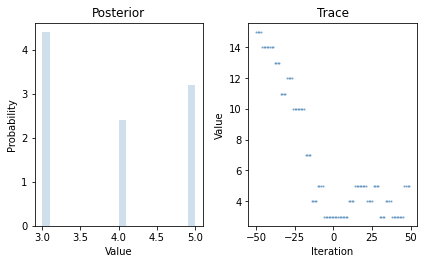

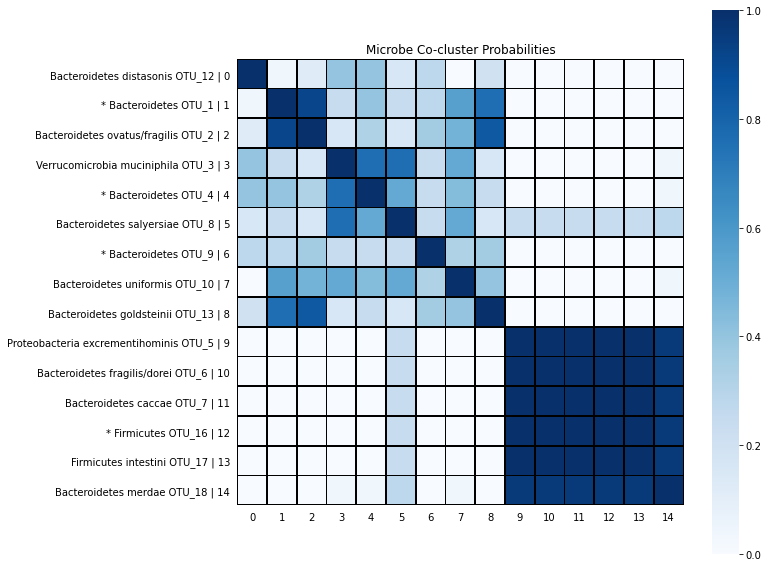

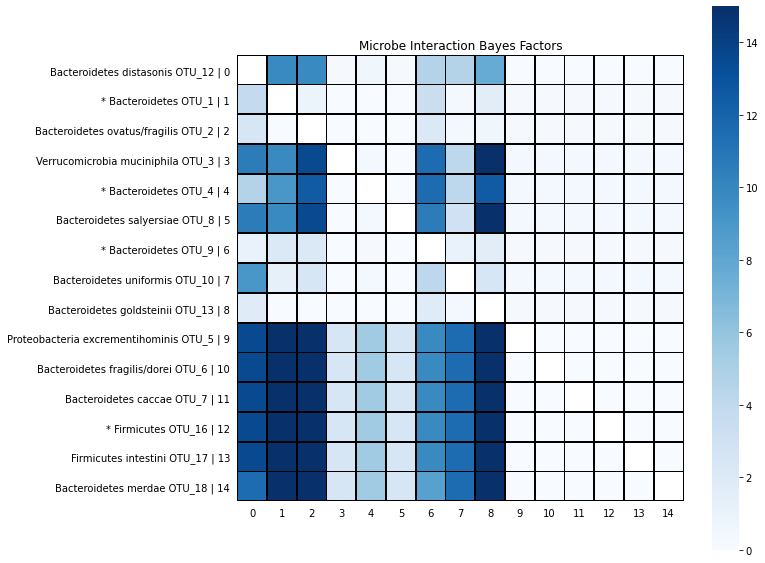

In [31]:
clustering = mcmc_uc0.graph[STRNAMES.CLUSTERING_OBJ]
md2.generate_cluster_assignments_posthoc(clustering, set_as_value=True)
taxa = mcmc_uc0.graph.data.taxa

md2.visualization.render_trace(clustering.n_clusters)
order = []
for i, cluster in enumerate(clustering):
    print('Cluster {}'.format(i))
    for oidx in cluster:
        print('\t', md2.taxaname_for_paper(taxa[oidx], taxa))
        order.append(oidx)

coclusters = md2.summary(mcmc_uc0.graph[STRNAMES.CLUSTERING_OBJ].coclusters)['mean']
md2.visualization.render_cocluster_probabilities(coclusters, taxa=uc_toy.taxa,
    yticklabels='%(paperformat)s | %(index)s', order=order)

bayes_factors = md2.generate_interation_bayes_factors_posthoc(mcmc_uc0)
md2.visualization.render_bayes_factors(
    bayes_factors, taxa=taxa, yticklabels='%(paperformat)s | %(index)s',
    order=order)
plt.show()

# Calculating  $\hat{r}$

In [32]:
params = md2.config.MDSINE2ModelConfig(
    basepath='output/mdsine2/uc100', seed=100, burnin=50, 
    n_samples=100, negbin_a0=a0, negbin_a1=a1, 
    checkpoint=50)
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'
mcmc_uc1 = md2.initialize_graph(params=params, graph_name=uc_toy.name, subjset=uc_toy)
mcmc_uc1 = md2.run_graph(mcmc_uc1, crash_if_error=True)


INFO:base.2727: max_value found: 1797837340792.1643, scaling_factor: 5.5622384590108656e-11
INFO:run.87: Normalizing abundances for a max value of 100. Normalization constant: 5.5622E-11
INFO:run.254: There are 372 qPCR measurements for 3 buckets. Each bucket is 124 measurements long
INFO:run.289: Initializing Filtering
INFO:posterior.2670: Setting up the essential timepoints
INFO:posterior.2683: Essential timepoints: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   6.   7.   8.   9.  10.  11.  14.  16.  18.  21.  21.5 22.  22.5 23.  23.5 24.  25.  28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  33.  35.  35.5 36.  36.5 37.  37.5 38.  39.  42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  47.  50.  50.5 51.  51.5 52.  52.5 53.  54.  57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
INFO:run.289: Initializing Zero inflation
INFO:design_matrices.851: Initializing LHS vector
INFO:design_matrices.1006: Initializing growth design matrix
INFO:design_matrices.932: Initializing self-inte

INFO:run.374: 		prior.loc: 0
INFO:run.372: 	perturbation Vancomycin
INFO:run.373: 		value: {100115: 0, 100116: 0, 100117: 0, 100118: 0, 100119: 0, 100120: 0, 100121: 0, 100122: 0, 100123: 0, 100124: 0, 100125: 0, 100126: 0, 100127: 0, 100128: 0, 100129: 0}
INFO:run.374: 		prior.loc: 0
INFO:run.372: 	perturbation Gentamicin
INFO:run.373: 		value: {100115: 0, 100116: 0, 100117: 0, 100118: 0, 100119: 0, 100120: 0, 100121: 0, 100122: 0, 100123: 0, 100124: 0, 100125: 0, 100126: 0, 100127: 0, 100128: 0, 100129: 0}
INFO:run.374: 		prior.loc: 0
INFO:run.375: Perturbation prior variances:
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.380: Perturbation indicators:
INFO:run.383: 	perturbation High Fat Diet: [False False False False False False False False False False False False 

INFO:inference.456: Cluster interaction probability: 0.6902120211131538
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.030039310455322266s
perturbation High Fat Diet (9/15): [ True  True False  True False  True False  True  True  True False  True  True False False]
perturbation Vancomycin (11/15): [False  True False  True  True  True  True  True  True False  True False  True  True  True]
perturbation Gentamicin (11/15): [False  True  True False  True False False  True  True  True  True  True  True  True  True]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.543380172150942
	perturbation Vancomycin: 0.6541798484844479
	perturbation Gentamicin: 0.5771423101278725
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.09958    0.38387087 0.7283936  0.36285918 0.75078167

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.24935488589151739
	perturbation Vancomycin: 0.39478510894188606
	perturbation Gentamicin: 0.0836243339418902
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.09957189 0.21635949 0.70717837 0.29550604 0.4482678  0.50763439 0.28883574 0.56296437 0.04565164 0.26232925 0.34255238 0.24172293 1.20049888 0.8471626  0.35822239]
Self Interactions:
[ 0.12229918  0.17919848  0.26583662  0.12226809  1.18765687  0.37478657  0.42474047  0.49806619 13.41267749 89.58921508  1.59763507 84.43380055  3.39319423  1.70660775  1.35282097]
Interactions:
[ 3.83274227e+01 -3.48940960e+01  1.08872832e+00 -3.69915372e+01 -3.85478815e+01 -5.59170951e-02  4.78135228e+00  2.41699377e-01 -1.24752743e+02 -1.17700560e+01  2.11959722e+00 -5.02257219e+00  5.70098702e-02 -2.34517573e+01  3

INFO:inference.456: Filtering: no-mp - Time: 0.2840, Acc: [0.612, 0.603, 0.620, 0.618, 0.607], data/sec: 19804.71
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 15
Cluster 100115
	members: ['OTU_1']
	size: 1
Cluster 100116
	members: ['OTU_2']
	size: 1
Cluster 100117
	members: ['OTU_3']
	size: 1
Cluster 100118
	members: ['OTU_4']
	size: 1
Cluster 100119
	members: ['OTU_5']
	size: 1
Cluster 100120
	members: ['OTU_6']
	size: 1
Cluster 100121
	members: ['OTU_7']
	size: 1
Cluster 100122
	members: ['OTU_8']
	size: 1
Cluster 100123
	members: ['OTU_9']
	size: 1
Cluster 100124
	members: ['OTU_10']
	size: 1
Cluster 100125
	members: ['OTU_12']
	size: 1
Cluster 100126
	members: ['OTU_13']
	size: 1
Cluster 100127
	members: ['OTU_16']
	size: 1
Cluster 100128
	members: ['OTU_17']
	size: 1
Cluster 100129
	members: ['OTU_18']
	size: 1
no mp - Total time: -1
INFO:inference.456: Clustering concentration parameter: 938.66310714

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.08997769129193614
	perturbation Vancomycin: 0.10182442866807949
	perturbation Gentamicin: 0.03354019072715985
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.17136265 0.40177406 0.63648195 0.22807703 0.44415589 0.54373544 0.30906861 0.42988179 0.10936112 0.08288654 0.06592591 0.10648683 0.95775765 0.72361331 0.17563134]
Self Interactions:
[1.75656502e-01 2.22965695e-01 2.92670358e-01 5.21337041e+00 8.07793169e-01 4.57074689e-02 1.68926437e+00 1.09879157e+00 1.16986617e+02 7.63194134e+01 3.93673096e-01 5.70597652e+01 2.71953316e+00 2.86367539e+00 9.84384316e-01]
Interactions:
[ 1.75395794e-01  4.72274654e-01 -2.42855262e+00 -1.82655155e+00  3.15767297e+01  1.56505735e+00  2.94259854e-02 -1.48960285e+01 -2.76982454e+00 -9.56035841e-01]
Perturbations:
Pert

INFO:inference.447: 

Inference iteration 7/100, time: 0.3730299472808838
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False 

INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7912374883774207, Acceptance rate: 0.875
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 184.97407855510477
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5528.266541497254
	perturbation Vancomycin: 2589.383830484611
	perturbation Gentamicin: 3030.096284631454
INFO:inference.456: Process Variance parameter: 4.471185734106456, empirical_variance: 4.38291
INFO:inference.456: Filtering: no-mp - Time: 0.2800, Acc: [0.617, 0.596, 0.618, 0.611, 0.584], data/sec: 20089.10
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 14
Cluster 100131
	members: ['OTU_2']
	size: 1
Cluster 100133
	members: ['OTU_8']
	size: 1
Cluster 100135
	members: ['OTU_12']
	size: 1
Clus

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.07347864684307993
	perturbation Vancomycin: 0.12467362494920095
	perturbation Gentamicin: 0.0808235625508013
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.43779328 0.46403054 0.73544685 0.1281555  0.69398281 0.29696545 0.3081585  0.17216979 0.10289488 0.12980304 0.53920924 0.037853   0.99083254 0.91449774 0.35014422]
Self Interactions:
[  0.21940803   0.23235377   0.25358912   6.67470148   0.96407406   0.19648329   1.45685749   0.6263926   54.20830689 105.52214122   1.24834763  44.58020207   2.8098821    2.88465678   4.0930328 ]
Interactions:
[ 0.00904106 -0.92606366]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.79863545 -2.14226557]
	 perturbation Gentamicin: []
INFO:inference

INFO:inference.456: Cluster interaction probability: 0.020426685942397042
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.009966611862182617s
perturbation High Fat Diet (0/13): [False False False False False False False False False False False False False]
perturbation Vancomycin (1/13): [ True False False False False False False False False False False False False]
perturbation Gentamicin (0/13): [False False False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.009723117980024558
	perturbation Vancomycin: 0.0018780161193492103
	perturbation Gentamicin: 0.05612789973131868
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.15756215 0.30584464 0.45238853 0.05925518 0.46821553 0.51092096 0.11046252 0.3008

INFO:inference.456: Clustering concentration parameter: 23.133409311506806
INFO:inference.447: 

Inference iteration 14/100, time: 0.36803722381591797
INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False F

INFO:inference.456: Filtering: no-mp - Time: 0.2700, Acc: [0.610, 0.601, 0.646, 0.622, 0.612], data/sec: 20833.91
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 12
Cluster 100138
	members: ['OTU_16', 'OTU_6', 'OTU_17']
	size: 3
Cluster 100163
	members: ['OTU_10', 'OTU_3']
	size: 2
Cluster 100176
	members: ['OTU_12']
	size: 1
Cluster 100178
	members: ['OTU_4']
	size: 1
Cluster 100180
	members: ['OTU_8']
	size: 1
Cluster 100181
	members: ['OTU_9']
	size: 1
Cluster 100183
	members: ['OTU_18']
	size: 1
Cluster 100185
	members: ['OTU_1']
	size: 1
Cluster 100188
	members: ['OTU_13']
	size: 1
Cluster 100190
	members: ['OTU_7']
	size: 1
Cluster 100192
	members: ['OTU_2']
	size: 1
Cluster 100196
	members: ['OTU_5']
	size: 1
no mp - Total time: 0.4869992733001709
INFO:inference.456: Clustering concentration parameter: 32.19028479457938
INFO:inference.447: 

Inference iteration 16/100, time: 0.3490333557128906
INFO:inf

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -4.5848508635742595
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -53.97791044844141
	perturbation Vancomycin: -154.79730953998765
	perturbation Gentamicin: -264.4715179395944
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.7722107601983961, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.6462183194214082, Acceptance rate: 0.8823529411764706
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 64.59658491791268
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3343.7149697418645
	perturbation Vancomycin: 37897.542718484874

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.57401512 0.4272023  0.37624479 0.13439445 0.35259317 0.61562545 0.69930242 0.43769542 0.08664359 0.02374352 0.41044868 0.1291397  1.3083219  0.33405384 0.25859234]
Self Interactions:
[3.97717246e-01 2.35813212e-01 2.09258966e-01 2.27060558e+00 5.59352928e-01 1.10248138e-01 1.00987395e+00 1.03920070e+00 8.63091535e+01 1.14829146e+02 1.84769740e+00 3.80320936e+01 4.36963022e+00 2.49682486e+00 4.08383023e+00]
Interactions:
[-2.18591259 -0.15555275]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.24854729]
	 perturbation Gentamicin: []
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -7.136562827980314
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -142.96884894433373

INFO:inference.456: Cluster interaction probability: 0.023496239452593038
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.01196908950805664s
perturbation High Fat Diet (0/10): [False False False False False False False False False False]
perturbation Vancomycin (2/10): [ True False  True False False False False False False False]
perturbation Gentamicin (0/10): [False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.000804569272812529
	perturbation Vancomycin: 0.15686178766219896
	perturbation Gentamicin: 0.004560830216201981
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.65372052 0.3989057  0.58363127 0.2143254  0.48472854 0.63949027 0.67328953 0.40809059 0.36335196 0.16282222 0.25174207 0.16503686 1.20730

INFO:inference.456: Cluster interaction probability: 0.012785083459415012
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.008977174758911133s
perturbation High Fat Diet (0/10): [False False False False False False False False False False]
perturbation Vancomycin (1/10): [ True False False False False False False False False False]
perturbation Gentamicin (0/10): [False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.013970073394085734
	perturbation Vancomycin: 0.0786370347336592
	perturbation Gentamicin: 0.06633661197944131
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.52470549 0.436773   0.50977548 0.43490989 0.65030734 0.31335068 0.57623915 0.31142065 0.11088987 0.23690656 0.3612008  0.18477927 1.280510

INFO:inference.456: Cluster interaction probability: 0.03256985853381462
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.009989738464355469s
perturbation High Fat Diet (0/8): [False False False False False False False False]
perturbation Vancomycin (2/8): [ True False False False False False False  True]
perturbation Gentamicin (0/8): [False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.00014182958373295818
	perturbation Vancomycin: 0.12771786542132266
	perturbation Gentamicin: 0.04335606476917943
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.23064839 0.34521645 0.65548908 0.38664915 0.6373291  0.56780243 0.96178067 0.23821992 0.15382038 0.18628211 0.72687936 0.18280891 1.31772531 0.94600507 0.40071415]
Self Intera

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.00011598468972756694
	perturbation Vancomycin: 0.09382276560000982
	perturbation Gentamicin: 0.07870943386017569
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.37791869 0.50186339 0.41441033 0.21812209 0.60937968 0.68230935 0.51326689 0.36198888 0.06367832 0.01540539 0.60599747 0.23886943 0.8469675  0.9216541  0.3031934 ]
Self Interactions:
[3.40915040e-01 3.03414590e-01 1.94245750e-01 2.62731262e+00 1.04351272e+00 4.68983340e-01 1.36052079e-01 9.26761157e-01 1.88650305e+02 1.44499764e+02 2.89906816e+00 6.20503330e+01 1.82558829e+00 2.33667394e+00 5.21105977e+00]
Interactions:
[-0.58525246 -0.7342316 ]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.08928206]
	 perturbation Gentami

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.55315346 0.34656032 0.66090237 0.18645377 0.55118878 0.44124782 0.34567548 0.13502606 0.11376308 0.09196727 0.66591554 0.01856753 1.06404169 1.02090331 0.54076719]
Self Interactions:
[  0.39292461   0.31175338   0.2775651    6.01012249   0.91209008   0.43934313   1.05604983   1.02518532 134.32842916 160.39537843   2.53897626  57.92937031   4.63135683   3.37539028   6.01543699]
Interactions:
[-1.60986161  0.11921122 -0.65717845]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.22877077]
	 perturbation Gentamicin: []
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.15730130254033425
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 131.1913276902818
	perturbation Van

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.9271442515913557, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.8109882773455537, Acceptance rate: 0.9354838709677419
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 67.7536502622468
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 7069.5388561870095
	perturbation Vancomycin: 10484.66703409728
	perturbation Gentamicin: 1501.292783546172
INFO:inference.456: Process Variance parameter: 3.539962653453014, empirical_variance: 3.61795
INFO:inference.456: Filtering: no-mp - Time: 0.2810, Acc: [0.614, 0.641, 0.631, 0.637, 0.598], data/sec: 20017.77
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n

INFO:inference.456: Process Variance parameter: 3.559397165445073, empirical_variance: 3.56443
INFO:inference.456: Filtering: no-mp - Time: 0.2716, Acc: [0.637, 0.636, 0.613, 0.608, 0.625], data/sec: 20711.73
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100138
	members: ['OTU_16', 'OTU_7', 'OTU_6', 'OTU_17']
	size: 4
Cluster 100239
	members: ['OTU_10']
	size: 1
Cluster 100247
	members: ['OTU_2', 'OTU_12']
	size: 2
Cluster 100251
	members: ['OTU_8', 'OTU_13', 'OTU_5', 'OTU_4']
	size: 4
Cluster 100269
	members: ['OTU_3']
	size: 1
Cluster 100271
	members: ['OTU_1', 'OTU_18']
	size: 2
Cluster 100282
	members: ['OTU_9']
	size: 1
no mp - Total time: 0.24499845504760742
INFO:inference.456: Clustering concentration parameter: 7.854264245281343
INFO:inference.447: 

Inference iteration 34/100, time: 0.3260347843170166
INFO:inference.456: Cluster interaction indicator parameter: [False  True False False Fa

INFO:inference.456: Clustering concentration parameter: 7.2751361201720295
INFO:inference.447: 

Inference iteration 36/100, time: 0.31799960136413574
INFO:inference.456: Cluster interaction indicator parameter: [False  True False False False  True False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False]
total time: 0.015996456146240234, n_interactions: 3/42, 0.07
INFO:inference.456: Cluster interaction probability: 0.08766732018273676
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.007003307342529297s
perturbation High Fat Diet (0/7): [False False False False False False False]
perturbation Vancomycin (1/7): [ True False False False False False False]
perturbation Gentamicin (0/7): [False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of 

INFO:inference.456: Cluster interaction probability: 0.09891989362929415
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.006996631622314453s
perturbation High Fat Diet (0/7): [False False False False False False False]
perturbation Vancomycin (1/7): [ True False False False False False False]
perturbation Gentamicin (0/7): [False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.012899900033660153
	perturbation Vancomycin: 0.11666398347846804
	perturbation Gentamicin: 0.11263606507383217
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.47034221 0.67790207 0.5075122  0.47722286 0.45627359 0.62703343 0.64580827 0.36386823 0.18806488 0.25289187 0.80672027 0.16579353 1.11908801 0.88451681 0.51517889]
Self Interactions:
[3.25747029e

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.40534249 0.62267084 0.76211805 0.39136109 0.56456195 0.56461508 0.28482131 0.82035259 0.26726973 0.22156783 0.42983895 0.1590339  1.16196553 0.99545131 0.49851987]
Self Interactions:
[4.41449130e-01 2.17185993e-01 2.25472718e-01 5.16113568e+00 9.93979156e-01 4.93721063e-01 7.10828799e-01 1.51851581e+00 1.69678155e+02 2.19175515e+02 3.02243909e+00 8.89798582e+01 4.35364267e+00 3.31080351e+00 3.70630394e+00]
Interactions:
[-0.03182872 -0.99545306 -1.08803938]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.12628351]
	 perturbation Gentamicin: []
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.0125029180642935
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -30.96

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.7404810686785592
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -64.85026606994336
	perturbation Vancomycin: -116.95594165729271
	perturbation Gentamicin: 34.17182770844259
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0136622995811737, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.696096377644732, Acceptance rate: 0.9523809523809523
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 30.07386807138693
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1488.3107817727757
	perturbation Vancomycin: 8054.553598570395
	p

INFO:inference.456: Process Variance parameter: 3.2939777681737974, empirical_variance: 3.27769
INFO:inference.456: Filtering: no-mp - Time: 0.2626, Acc: [0.613, 0.641, 0.629, 0.609, 0.617], data/sec: 21422.19
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 100138
	members: ['OTU_16', 'OTU_10', 'OTU_4', 'OTU_6', 'OTU_17', 'OTU_18']
	size: 6
Cluster 100239
	members: ['OTU_2', 'OTU_7']
	size: 2
Cluster 100290
	members: ['OTU_1', 'OTU_3', 'OTU_8']
	size: 3
Cluster 100307
	members: ['OTU_12', 'OTU_9']
	size: 2
Cluster 100312
	members: ['OTU_13']
	size: 1
Cluster 100318
	members: ['OTU_5']
	size: 1
no mp - Total time: 0.23000049591064453
INFO:inference.456: Clustering concentration parameter: 1.7993882932293348
INFO:posterior.1585: 0/15: 10
INFO:posterior.1585: 1/15: 0
INFO:posterior.1585: 2/15: 6
INFO:posterior.1585: 3/15: 9
INFO:posterior.1585: 4/15: 14
INFO:posterior.1585: 5/15: 13
INFO:posterior.1585

INFO:inference.456: Clustering concentration parameter: 0.9485358272741873
INFO:inference.447: 

Inference iteration 47/100, time: 0.3060004711151123
INFO:inference.456: Cluster interaction indicator parameter: [False  True False False  True  True False False False False False False False False False False False False False False]
total time: 0.009968280792236328, n_interactions: 3/20, 0.15
INFO:inference.456: Cluster interaction probability: 0.1347315722130485
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.006032228469848633s
perturbation High Fat Diet (0/5): [False False False False False]
perturbation Vancomycin (1/5): [ True False False False False]
perturbation Gentamicin (0/5): [False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0011432854753505028
	perturbation Vancomycin: 0.1436644540793238

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.009404913063441779
	perturbation Vancomycin: 0.0881112130485914
	perturbation Gentamicin: 0.1347683642963099
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.75840031 0.40017807 0.64379331 0.1951525  0.53931262 0.53817727 0.59500389 0.67465299 0.22318794 0.51346605 0.43420693 0.10453141 1.09775636 1.09098281 0.94301635]
Self Interactions:
[  0.40685806   0.27398655   0.2061778    6.96747519   0.91842416   0.35601908   0.97417752   1.42816935 171.33371061 182.95601176   2.19390799  64.07517066   3.27205764   4.23333129   4.12856918]
Interactions:
[-0.04522618 -0.9072851  -0.80081513  0.07372229]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.45622419]
	 perturbation Gentamicin: []
IN

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 2.9699630470653116
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 18.01828699261033
	perturbation Vancomycin: -26.417343862520298
	perturbation Gentamicin: 10.506673857670105
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9087815519169008, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7311487426774008, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 49.66897181732735
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3557.056295584065
	perturbation Vancomycin: 1076.0645376515756
	perturbation Ge

INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 45.728688083575705
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 719.5772201900985
	perturbation Vancomycin: 1286.1268876035326
	perturbation Gentamicin: 719.09780539173
INFO:inference.456: Process Variance parameter: 2.881282702057938, empirical_variance: 2.98624
INFO:inference.456: Filtering: no-mp - Time: 0.2730, Acc: [0.622, 0.617, 0.612, 0.613, 0.614], data/sec: 20606.82
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100138
	members: ['OTU_7', 'OTU_16', 'OTU_6', 'OTU_17', 'OTU_18']
	size: 5
Cluster 100290
	members: ['OTU_8', 'OTU_5', 'OTU_10', 'OTU_1']
	size: 4
Cluster 100345
	members: ['OTU_3', 'OTU_9', 'OTU_13', 'OTU_2']
	size: 4
Cluster 100363
	members: ['OTU_12', 'OTU_4']
	size: 2
no mp - T

INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.006029844284057617s
perturbation High Fat Diet (0/4): [False False False False]
perturbation Vancomycin (1/4): [ True False False False]
perturbation Gentamicin (0/4): [False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.268581408121416
	perturbation Vancomycin: 0.20736876989334926
	perturbation Gentamicin: 0.08687229780662237
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.78194955 0.55647433 0.66845813 0.07126228 0.72781148 0.72720217 0.6560555  0.62528641 0.12309259 0.36740526 0.63943106 0.29181051 1.12063374 1.2685238  0.64776377]
Self Interactions:
[4.20765099e-01 3.28900816e-01 2.65375282e-01 8.24982660e+00 7.59980771e-01 3.68747936e-01 3.56601180e-02 1.21390504e+00 1.52843476e+02 2.4343

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.0970523465766866
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 25.41997228092972
	perturbation Vancomycin: -18.220744974985273
	perturbation Gentamicin: -120.78195183069896
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.4900119514611006, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.35339565089472, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 40.687554704447656
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2566.311724316491
	perturbation Vancomycin: 7336.221544534071
	perturbation Ge

INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 100138
	members: ['OTU_16', 'OTU_6', 'OTU_17', 'OTU_18', 'OTU_7']
	size: 5
Cluster 100290
	members: ['OTU_4', 'OTU_3', 'OTU_1', 'OTU_8', 'OTU_2']
	size: 5
Cluster 100345
	members: ['OTU_5', 'OTU_9', 'OTU_13']
	size: 3
Cluster 100373
	members: ['OTU_12']
	size: 1
Cluster 100380
	members: ['OTU_10']
	size: 1
no mp - Total time: 0.1849989891052246
INFO:inference.456: Clustering concentration parameter: 3.082197155033145
INFO:posterior.1585: 0/15: 4
INFO:posterior.1585: 1/15: 12
INFO:posterior.1585: 2/15: 6
INFO:posterior.1585: 3/15: 14
INFO:posterior.1585: 4/15: 3
INFO:posterior.1585: 5/15: 0
INFO:posterior.1585: 6/15: 11
INFO:posterior.1585: 7/15: 9
INFO:posterior.1585: 8/15: 13
INFO:posterior.1585: 9/15: 7
INFO:posterior.1585: 10/15: 1
INFO:posterior.1585: 11/15: 2
INFO:posterior.1585: 12/15: 5
INFO:posterior.1585: 13/15: 10
INFO:posterior.1585: 14/15: 

INFO:inference.456: Cluster interaction probability: 0.3464002981240225
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.0069980621337890625s
perturbation High Fat Diet (0/5): [False False False False False]
perturbation Vancomycin (1/5): [ True False False False False]
perturbation Gentamicin (0/5): [False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.015180008301248238
	perturbation Vancomycin: 0.10956827539207327
	perturbation Gentamicin: 0.07653734654078534
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.503406   0.46212137 0.43950615 0.17533105 0.7107293  0.76598977 0.65421529 0.3371151  0.29963231 0.20654079 0.57176235 0.00530666 1.18159361 0.85223323 0.63272311]
Self Interactions:
[3.96455441e-01 2.22299833e-01 2.55288356e-01 4.

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -1.4010832387289214
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 32.23335236325398
	perturbation Vancomycin: -54.92017477985805
	perturbation Gentamicin: 2.740762915305189
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.2520155698798041, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7614085629918204, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 34.44040157722139
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2345.469901916732
	perturbation Vancomycin: 2162.188007259011
	perturbation Genta

INFO:inference.456: Clustering concentration parameter: 0.6871369004484217
INFO:inference.447: 

Inference iteration 68/100, time: 0.3190011978149414
INFO:inference.456: Cluster interaction indicator parameter: [ True  True False  True  True False False False False False False False]
total time: 0.009999275207519531, n_interactions: 4/12, 0.33
INFO:inference.456: Cluster interaction probability: 0.3300135068471817
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.006029605865478516s
perturbation High Fat Diet (0/4): [False False False False]
perturbation Vancomycin (1/4): [ True False False False]
perturbation Gentamicin (0/4): [False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.015403885781172692
	perturbation Vancomycin: 0.19694229178576728
	perturbation Gentamicin: 0.02033047120030677
INFO:inference.456:

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.64034023 0.37151724 0.57080373 0.19550153 0.4959145  0.87281013 0.80762944 0.47380474 0.33309708 0.17911744 0.54744553 0.21714176 1.14795266 1.11434852 0.75616409]
Self Interactions:
[4.36785393e-01 2.67271688e-01 2.78415006e-01 5.95254158e+00 1.04972800e+00 2.07112123e-01 4.34890474e-01 1.13703571e+00 2.58087664e+02 2.44355692e+02 2.90876639e+00 9.48023590e+01 1.48256918e+00 2.62933542e+00 1.00999807e+00]
Interactions:
[-0.07557013 -1.25922353  0.22017252 -1.01563351]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.14242099]
	 perturbation Gentamicin: []
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.9731151879867903
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat 

INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 13.453920929387122
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 743.3053284822226
	perturbation Vancomycin: 1716.3744148653539
	perturbation Gentamicin: 2939.6841176133157
INFO:inference.456: Process Variance parameter: 2.6880810676146143, empirical_variance: 2.68109
INFO:inference.456: Filtering: no-mp - Time: 0.2690, Acc: [0.638, 0.613, 0.612, 0.612, 0.588], data/sec: 20909.18
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100138
	members: ['OTU_17', 'OTU_7', 'OTU_16', 'OTU_18', 'OTU_6']
	size: 5
Cluster 100290
	members: ['OTU_10', 'OTU_2', 'OTU_4', 'OTU_1', 'OTU_9', 'OTU_8', 'OTU_13', 'OTU_3']
	size: 8
Cluster 100416
	members: ['OTU_5']
	size: 1
Cluster 100424
	members: ['OTU_12']
	size: 1
no mp

INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False False]
total time: 0.006989955902099609, n_interactions: 1/6, 0.17
INFO:inference.456: Cluster interaction probability: 0.16313757225718775
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.004031658172607422s
perturbation High Fat Diet (0/3): [False False False]
perturbation Vancomycin (1/3): [ True False False]
perturbation Gentamicin (0/3): [False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.14005604060044455
	perturbation Vancomycin: 0.3434735196994371
	perturbation Gentamicin: 0.18049201394200032
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.811686   0.3905124  0.7060511  0.1382394  0.49512951 0.69600551 0.58366704 0.37737647 0.27632691 0.27054602 0.

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 9.379193363239693
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -370.31904366717987
	perturbation Vancomycin: 2.241956759512285
	perturbation Gentamicin: 11.453799050345859
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.3999400346163519, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.46097055591587544, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 40.489470833510836
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3703.8851019152653
	perturbation Vancomycin: 1421.6854945429336
	perturbation 

INFO:inference.456: Clustering concentration parameter: 0.5584762227668479
INFO:inference.447: 

Inference iteration 80/100, time: 0.32558655738830566
INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False False]
total time: 0.006002664566040039, n_interactions: 1/6, 0.17
INFO:inference.456: Cluster interaction probability: 0.03055062080457772
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.0070323944091796875s
perturbation High Fat Diet (0/3): [False False False]
perturbation Vancomycin (1/3): [ True False False]
perturbation Gentamicin (2/3): [ True False  True]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0001349657574966941
	perturbation Vancomycin: 0.08845196376058882
	perturbation Gentamicin: 0.7368194997433709
INFO:inference.456: Logistic growth parameters (growth, self-interactio

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.9074454254457187
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -8.96895600230549
	perturbation Vancomycin: -11.459393599992676
	perturbation Gentamicin: 14.120842476964222
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.4178030984219693, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.8141724939815347, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 39.91709732811855
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2294.855610955472
	perturbation Vancomycin: 1960.0933613828715
	perturbation G

INFO:inference.456: Clustering concentration parameter: 3.976940969200101
INFO:posterior.1585: 0/15: 1
INFO:posterior.1585: 1/15: 8
INFO:posterior.1585: 2/15: 14
INFO:posterior.1585: 3/15: 7
INFO:posterior.1585: 4/15: 6
INFO:posterior.1585: 5/15: 10
INFO:posterior.1585: 6/15: 3
INFO:posterior.1585: 7/15: 0
INFO:posterior.1585: 8/15: 9
INFO:posterior.1585: 9/15: 12
INFO:posterior.1585: 10/15: 4
INFO:posterior.1585: 11/15: 2
INFO:posterior.1585: 12/15: 11
INFO:posterior.1585: 13/15: 13
INFO:posterior.1585: 14/15: 5
INFO:inference.447: 

Inference iteration 85/100, time: 0.530005693435669
INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False False False False False False False False]
total time: 0.009026288986206055, n_interactions: 1/12, 0.08
INFO:inference.456: Cluster interaction probability: 0.03701830965471325
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.005997180938720703s
perturbation High Fat Diet (0/

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.009416333264059213
	perturbation Vancomycin: 0.10309530968852622
	perturbation Gentamicin: 0.3663802230913488
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.66487604 0.39084431 0.63182271 0.22205373 0.59449677 0.76148239 0.58946138 0.46406665 0.17509937 0.22893342 0.58406603 0.33135298 1.16924902 0.88911995 0.87250086]
Self Interactions:
[4.96429481e-01 2.05199624e-01 2.42798631e-01 4.60693999e+00 1.05055470e+00 2.59130615e-01 3.93834153e-01 1.27041651e+00 1.73427275e+02 2.51451718e+02 2.70333434e+00 1.25340175e+02 2.74302251e+00 2.62212031e+00 1.53346559e+00]
Interactions:
[ -0.32475709 -26.09483422]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.25058327]
	 perturbation Gentamic

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -3.1002811853574546
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 47.37810570259916
	perturbation Vancomycin: 32.65892167718235
	perturbation Gentamicin: 86.54484036673375
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8679820445916742, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.752644636285556, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 226.79772811589402
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1563.7670813379673
	perturbation Vancomycin: 1172.6082770695373
	perturbation Gen

INFO:inference.456: Process Variance parameter: 2.3349503813860912, empirical_variance: 2.37233
INFO:inference.456: Filtering: no-mp - Time: 0.2710, Acc: [0.614, 0.602, 0.629, 0.604, 0.604], data/sec: 20754.73
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 100138
	members: ['OTU_6', 'OTU_17', 'OTU_18', 'OTU_16', 'OTU_7']
	size: 5
Cluster 100290
	members: ['OTU_2', 'OTU_12', 'OTU_10', 'OTU_1']
	size: 4
Cluster 100433
	members: ['OTU_3', 'OTU_8', 'OTU_5']
	size: 3
Cluster 100474
	members: ['OTU_4']
	size: 1
Cluster 100475
	members: ['OTU_9']
	size: 1
Cluster 100501
	members: ['OTU_13']
	size: 1
no mp - Total time: 0.24703288078308105
INFO:inference.456: Clustering concentration parameter: 2.2272559108428283
INFO:inference.447: 

Inference iteration 92/100, time: 0.3301360607147217
INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False False False False False False

INFO:inference.456: Clustering concentration parameter: 3.5168206224277774
INFO:inference.447: 

Inference iteration 94/100, time: 0.3390007019042969
INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False False False False False False False False False False False False False False False False False  True False False False False False  True False False False False False False False False False False False False False False]
total time: 0.015001296997070312, n_interactions: 3/42, 0.07
INFO:inference.456: Cluster interaction probability: 0.04603744192854234
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.008031606674194336s
perturbation High Fat Diet (0/7): [False False False False False False False]
perturbation Vancomycin (1/7): [ True False False False False False False]
perturbation Gentamicin (0/7): [False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of t

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0016801712070839742
	perturbation Vancomycin: 0.08710367675007992
	perturbation Gentamicin: 0.06885919493244642
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.69474459 0.44905939 0.63717411 0.01666444 0.57651989 0.66591866 0.36995406 0.51913187 0.19750589 0.24768645 0.66108138 0.20906706 1.16324765 0.9279854  0.56509739]
Self Interactions:
[3.32506713e-01 2.69039089e-01 2.37534714e-01 6.33788865e+00 9.27452783e-01 3.39214491e-01 6.38667144e-01 1.33513088e+00 2.93352244e+02 2.90120576e+02 2.76612271e+00 1.46674911e+02 3.85664396e+00 4.42047660e+00 1.43336574e+00]
Interactions:
[-0.27300144 10.18908078]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.69616118]
	 perturbation Gentamic

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.54195825 0.42294974 0.54542895 0.16192928 0.62313202 0.59313513 0.70403993 0.65900463 0.14133763 0.17831063 0.44672329 0.23728745 1.08858095 1.23516757 0.64767191]
Self Interactions:
[3.60148713e-01 2.02326266e-01 2.31430170e-01 5.04925128e+00 8.57360076e-01 3.32608224e-01 3.38279060e-01 1.40279360e+00 2.57579311e+02 2.42645452e+02 2.69984304e+00 1.24779573e+02 3.24435362e+00 4.86940408e+00 1.41721439e+00]
Interactions:
[-0.24712122 12.81308411]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.20398623]
	 perturbation Gentamicin: [-1.84972642]
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -5.668170394954014
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -55.5955

INFO:util.174: Number of clusters: 4
INFO:util.180: Clusters assigned: [0 0 0 0 1 3 3 0 0 0 2 1 3 3 3]


Cluster 0
	 * Firmicutes OTU_16
	 Bacteroidetes merdae OTU_18
	 Firmicutes intestini OTU_17
	 Bacteroidetes caccae OTU_7
	 Bacteroidetes fragilis/dorei OTU_6
Cluster 1
	 * Bacteroidetes OTU_1
	 Bacteroidetes ovatus/fragilis OTU_2
	 Verrucomicrobia muciniphila OTU_3
	 * Bacteroidetes OTU_4
	 Bacteroidetes salyersiae OTU_8
	 * Bacteroidetes OTU_9
	 Bacteroidetes uniformis OTU_10
Cluster 2
	 Proteobacteria excrementihominis OTU_5
	 Bacteroidetes goldsteinii OTU_13
Cluster 3
	 Bacteroidetes distasonis OTU_12


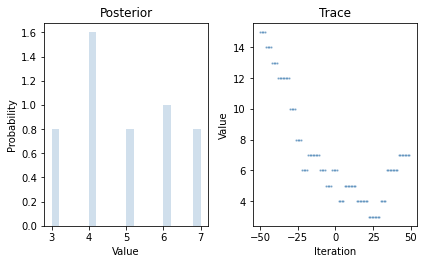

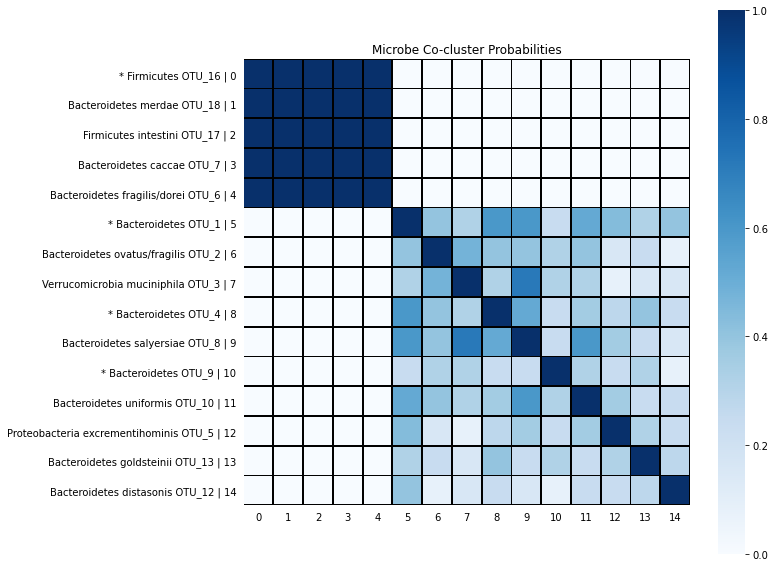

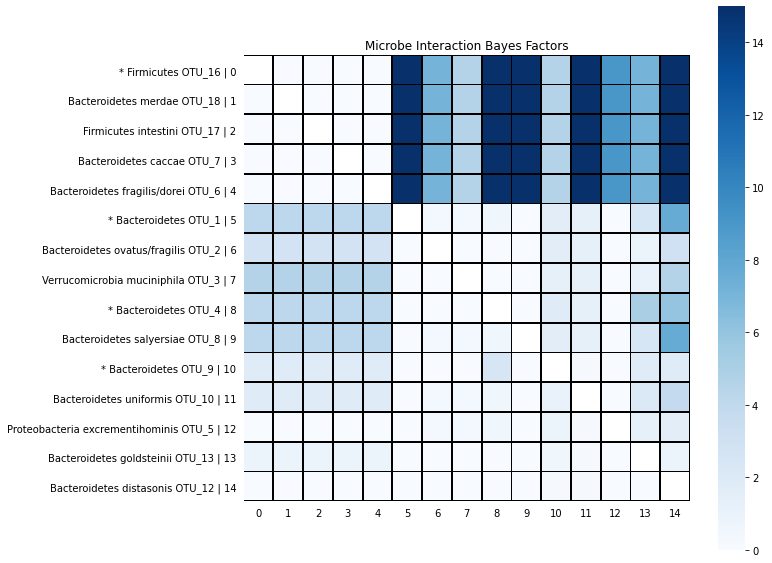

In [33]:
clustering = mcmc_uc1.graph[STRNAMES.CLUSTERING_OBJ]
md2.generate_cluster_assignments_posthoc(clustering, set_as_value=True)
taxa = mcmc_uc1.graph.data.taxa

md2.visualization.render_trace(clustering.n_clusters)
order = []
for i, cluster in enumerate(clustering):
    print('Cluster {}'.format(i))
    for oidx in cluster:
        print('\t', md2.taxaname_for_paper(taxa[oidx], taxa))
        order.append(oidx)

coclusters = md2.summary(mcmc_uc1.graph[STRNAMES.CLUSTERING_OBJ].coclusters)['mean']
md2.visualization.render_cocluster_probabilities(
    coclusters, taxa=uc_toy.taxa, yticklabels='%(paperformat)s | %(index)s',
    order=order)

bayes_factors = md2.generate_interation_bayes_factors_posthoc(mcmc_uc1)
md2.visualization.render_bayes_factors(
    bayes_factors, taxa=taxa, yticklabels='%(paperformat)s | %(index)s',
    order=order)

plt.show()

In [34]:
chains = [mcmc_uc0, mcmc_uc1]
start = 10
end = 20
vname = STRNAMES.GROWTH_VALUE

rhat = md2.pylab.inference.r_hat(chains, start=start, end=end, vname=vname)
print('Growth values:', rhat)

vname = STRNAMES.CONCENTRATION
rhat = md2.pylab.inference.r_hat(chains, start=start, end=end, vname=vname)
print('Concentration parameter:', rhat)

vname = STRNAMES.PROCESSVAR
rhat = md2.pylab.inference.r_hat(chains, start=start, end=end, vname=vname)
print('Process variance parameter:', rhat)


Growth values: [2.27759015 1.91194137 1.90157166 1.71162753 1.76806987 1.82309684 1.75571646 2.28988163 1.80208809 1.64993987 1.65244786 1.74677639 2.63487229 1.7743072  1.64481383]
Concentration parameter: [1.36955026]
Process variance parameter: [2.77366281]


# Consensus clustering
Run the model with a fixed modules

In [35]:
# Use the clustering from a previous as the clustering assignment
params = md2.config.MDSINE2ModelConfig(
    basepath=basepath, seed=0, burnin=50, n_samples=100, 
    negbin_a0=a0, negbin_a1=a1, checkpoint=50)

# Do not learn the clustering parameters
params.LEARN[STRNAMES.CLUSTERING] = False
params.LEARN[STRNAMES.CONCENTRATION] = False

# Set the initialization option for clustering
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'fixed-clustering'
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value'] = 'output/mdsine2/uc100/mcmc.pkl'

mcmc = md2.initialize_graph(params=params, graph_name=uc_toy.name, subjset=uc_toy)
mcmc = md2.run_graph(mcmc, crash_if_error=True)

INFO:base.2727: max_value found: 1797837340792.1643, scaling_factor: 5.5622384590108656e-11
INFO:run.87: Normalizing abundances for a max value of 100. Normalization constant: 5.5622E-11
INFO:run.254: There are 372 qPCR measurements for 3 buckets. Each bucket is 124 measurements long
INFO:run.289: Initializing Filtering
INFO:posterior.2670: Setting up the essential timepoints
INFO:posterior.2683: Essential timepoints: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   6.   7.   8.   9.  10.  11.  14.  16.  18.  21.  21.5 22.  22.5 23.  23.5 24.  25.  28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  33.  35.  35.5 36.  36.5 37.  37.5 38.  39.  42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  47.  50.  50.5 51.  51.5 52.  52.5 53.  54.  57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
INFO:run.289: Initializing Zero inflation
INFO:design_matrices.851: Initializing LHS vector
INFO:design_matrices.1006: Initializing growth design matrix
INFO:design_matrices.932: Initializing self-inte

INFO:run.374: 		prior.loc: 0
INFO:run.372: 	perturbation Gentamicin
INFO:run.373: 		value: {100115: 0, 100116: 0, 100117: 0, 100118: 0}
INFO:run.374: 		prior.loc: 0
INFO:run.375: Perturbation prior variances:
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.380: Perturbation indicators:
INFO:run.383: 	perturbation High Fat Diet: [False False False False]
INFO:run.383: 	perturbation Vancomycin: [False False False False]
INFO:run.383: 	perturbation Gentamicin: [False False False False]
INFO:run.384: Perturbation indicator probability:
INFO:run.386: 	perturbation High Fat Diet
INFO:run.387: 		value: 0.1527842458791451
INFO:run.388: 		prior.a: 0.5
INFO:run.389: 		prior.b: 2.772588722239781
INFO:run.386: 	perturbation Vancomycin
INFO:run.387: 		value: 0.1527842458791451
INFO:r

INFO:inference.447: 

Inference iteration 2/100, time: 0.33554530143737793
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False  True False]
total time: 0.012042522430419922, n_interactions: 1/12, 0.08
INFO:inference.456: Cluster interaction probability: 0.04080523952283359
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.006956815719604492s
perturbation High Fat Diet (0/4): [False False False False]
perturbation Vancomycin (1/4): [False False False  True]
perturbation Gentamicin (1/4): [ True False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.010689706019422762
	perturbation Vancomycin: 0.18947173002497814
	perturbation Gentamicin: 0.042262163137034334
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/pert

INFO:inference.456: Process Variance parameter: 4.46790843043687, empirical_variance: 4.50564
INFO:inference.456: Filtering: no-mp - Time: 0.2740, Acc: [0.620, 0.636, 0.624, 0.615, 0.594], data/sec: 20529.13
INFO:inference.447: 

Inference iteration 5/100, time: 0.3160068988800049
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False  True False]
total time: 0.00699925422668457, n_interactions: 1/12, 0.08
INFO:inference.456: Cluster interaction probability: 0.09618522520553119
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.008002519607543945s
perturbation High Fat Diet (0/4): [False False False False]
perturbation Vancomycin (1/4): [False False False  True]
perturbation Gentamicin (0/4): [False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 

INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 14867.263791643105
	perturbation Vancomycin: 1568.6077945834418
	perturbation Gentamicin: 1404.1736631702959
INFO:inference.456: Process Variance parameter: 4.401297931032727, empirical_variance: 4.51663
INFO:inference.456: Filtering: no-mp - Time: 0.2790, Acc: [0.627, 0.620, 0.628, 0.629, 0.628], data/sec: 20163.65
INFO:inference.447: 

Inference iteration 8/100, time: 0.32004213333129883
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False  True]
total time: 0.008999109268188477, n_interactions: 1/12, 0.08
INFO:inference.456: Cluster interaction probability: 0.02642490263384244
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.005029201507568359s
perturbation High Fat Diet (0/4): [False False False False]
perturbatio

INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.3606592080345865, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 34.5765014228529
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1665.9662526150025
	perturbation Vancomycin: 30962.295616894586
	perturbation Gentamicin: 2262.9135105850587
INFO:inference.456: Process Variance parameter: 4.339983026183199, empirical_variance: 4.38323
INFO:inference.456: Filtering: no-mp - Time: 0.2830, Acc: [0.620, 0.590, 0.636, 0.614, 0.597], data/sec: 19875.40
INFO:inference.447: 

Inference iteration 11/100, time: 0.3159675598144531
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False  True]
total time: 0.007021427154541016, n_interactions: 1/12, 0

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.31271640312945514, Acceptance rate: 0.8461538461538461
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.298759675786387, Acceptance rate: 0.9230769230769231
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 33.112292787547005
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 817.4578614362416
	perturbation Vancomycin: 4367.362879541128
	perturbation Gentamicin: 2157.713824048188
INFO:inference.456: Process Variance parameter: 4.284402523072991, empirical_variance: 4.30787
INFO:inference.456: Filtering: no-mp - Time: 0.2830, Acc: [0.627, 0.645, 0.592, 0.603, 0.619], data/sec: 19873.18
INFO:inference.447: 

Inference iteration 14/100, time: 0.31401562690734863
INFO:inference.456: Clu

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -1.8575541798637332
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 91.73278726824816
	perturbation Vancomycin: 29.544500659221537
	perturbation Gentamicin: 34.94280680901769
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.24623413730575217, Acceptance rate: 0.875
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.291046886596519, Acceptance rate: 0.9375
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 231.47919521160392
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 986.3439724794539
	perturbation Vancomycin: 4533.897565131829
	perturbation

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.24447079072502698
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 83.34506970485751
	perturbation Vancomycin: -15.43234694069277
	perturbation Gentamicin: -47.517608949605766
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.41423795314226763, Acceptance rate: 0.8947368421052632
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.153070863575008, Acceptance rate: 0.9473684210526315
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 17.372033065518085
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 9369.608129351978
	perturbation Vancomycin: 528

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.496991315296574
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -111.6649528956681
	perturbation Vancomycin: -4.546869182792594
	perturbation Gentamicin: 8.531086970188431
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5330771597669527, Acceptance rate: 0.8181818181818182
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.916890082917551, Acceptance rate: 0.9545454545454546
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 88.52570134757104
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4436.874360654091
	perturbation Vancomycin: 2901.978

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -3.0844229578403985
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -89.75978116026242
	perturbation Vancomycin: 6.964072593520322
	perturbation Gentamicin: 7.9172151171901755
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.255839231816282, Acceptance rate: 0.84
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 4.0582437294482165, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 27.105588124514234
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1731.5047986682514
	perturbation Vancomycin: 5669.784105193812
	perturbation G

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 6.325605116243045
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -88.50355978149773
	perturbation Vancomycin: -23.702207018149718
	perturbation Gentamicin: 12.391605842592003
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.6119600546405104, Acceptance rate: 0.8571428571428571
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 4.00689518642993, Acceptance rate: 0.9642857142857143
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 182.5011592528249
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 10595.655934873053
	perturbation Vancomycin: 1518.59

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -4.495562315970082
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -33.31353660446302
	perturbation Vancomycin: 13.592140645829442
	perturbation Gentamicin: 2.984893204294531
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4221552988045698, Acceptance rate: 0.8709677419354839
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.066999427088387, Acceptance rate: 0.967741935483871
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 11.874723795914297
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2734.8314284636185
	perturbation Vancomycin: 1011.32

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.3586152867945565
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 30.182466597002545
	perturbation Vancomycin: 52.30446885210676
	perturbation Gentamicin: 32.56185180493978
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3326772225992634, Acceptance rate: 0.8823529411764706
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.6360741498375124, Acceptance rate: 0.9705882352941176
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 103.47180800820027
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1421.2431788807942
	perturbation Vancomycin: 1640.

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -6.01217229578715
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -17.84568148972631
	perturbation Vancomycin: 11.729518847157767
	perturbation Gentamicin: -23.950985731506474
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.837660468481236, Acceptance rate: 0.8918918918918919
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.297189984456416, Acceptance rate: 0.972972972972973
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 61.65276128262622
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4257.0340172695705
	perturbation Vancomycin: 1028.034

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 2.427505186275602
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -78.89511169665614
	perturbation Vancomycin: 3.3477313012210286
	perturbation Gentamicin: 5.748759296004337
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.2712807646710504, Acceptance rate: 0.9
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.9725101757186323, Acceptance rate: 0.975
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 44.497701000961456
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 24776.07800703674
	perturbation Vancomycin: 3450.7485381842666
	perturbation Ge

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -4.955826788323743
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -102.57628873411579
	perturbation Vancomycin: 55.130162021049564
	perturbation Gentamicin: 47.078985266679936
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4239333428592125, Acceptance rate: 0.8604651162790697
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.527097575761074, Acceptance rate: 0.9767441860465116
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 29.8241236220571
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3080.385248083093
	perturbation Vancomycin: 2070.14

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -1.0404863892403933
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 35.06536169958741
	perturbation Vancomycin: -41.71289778326325
	perturbation Gentamicin: -31.13774812626761
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.5542880083215584, Acceptance rate: 0.8695652173913043
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.4263061969357578, Acceptance rate: 0.9782608695652174
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 25.400869971493478
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3251.1651892129603
	perturbation Vancomycin: 2678

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 1.0731677939770017
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 43.188548414463064
	perturbation Vancomycin: -32.43710281159346
	perturbation Gentamicin: -127.75883722966503
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.994614016240481, Acceptance rate: 0.8775510204081632
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.085453662492897, Acceptance rate: 0.9795918367346939
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 27.104321320849014
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4622.474262595775
	perturbation Vancomycin: 2151.8

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 1.1828148298836
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 86.09732704959465
	perturbation Vancomycin: -61.288003192607874
	perturbation Gentamicin: -69.04314293609605
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.547148602453225, Acceptance rate: 0.88
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.904756505756322, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 11.943381089851291
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2007.2450516873162
	perturbation Vancomycin: 1656.8754690040832
	perturbation Gent

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 0.26441176608881345
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -25.60557487488276
	perturbation Vancomycin: 6.5098262432105045
	perturbation Gentamicin: 178.58833920787555
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.954926800981792, Acceptance rate: 0.88
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.682426927871017, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 17.63624149030899
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3664.3689352580964
	perturbation Vancomycin: 1016.1143608727676
	perturbation G

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 2.629282987158453
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 173.90650353862617
	perturbation Vancomycin: 55.478312974149254
	perturbation Gentamicin: 44.96167914951324
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.415014449218109, Acceptance rate: 0.88
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.5915481217581022, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 37.72101413936939
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1360.5513169839794
	perturbation Vancomycin: 4628.150876568034
	perturbation Gent

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.6883385399939623
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -70.35589172875953
	perturbation Vancomycin: 13.326005547723081
	perturbation Gentamicin: -3.1016172121613472
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.1881129321192785, Acceptance rate: 0.9
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 4.412241747621734, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 18.845670929526122
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 9379.297203028049
	perturbation Vancomycin: 936.1242707671815
	perturbation G

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.8230833611124186
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 121.6095301328022
	perturbation Vancomycin: -2.03486314444023
	perturbation Gentamicin: -44.5071779228792
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.574160337894608, Acceptance rate: 0.92
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 5.41961924400323, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 25.777096073585824
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1683.9245906216534
	perturbation Vancomycin: 786.6534316817638
	perturbation Gentam

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 1.2132949569312546
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -93.52862778186255
	perturbation Vancomycin: -103.689584319665
	perturbation Gentamicin: 119.42329657938838
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.4290314743147103, Acceptance rate: 0.92
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 6.180650912643667, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 32.87989492377049
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2163.60685247602
	perturbation Vancomycin: 7862.878855333638
	perturbation Gentam

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -11.235856938368196
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -167.7262157005333
	perturbation Vancomycin: -60.60153455946623
	perturbation Gentamicin: -140.3104417000471
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.6780305985384794, Acceptance rate: 0.94
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 6.7783948429043654, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 76.54494244552956
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 887.9210262140356
	perturbation Vancomycin: 1906.6580507696026
	perturbation G

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 0.5280698308656508
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 13.893647044402927
	perturbation Vancomycin: 93.30050938547087
	perturbation Gentamicin: -47.835341973982985
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.9562682332136534, Acceptance rate: 0.96
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 6.1689228029161995, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 41.72722795820897
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2690.1546736944824
	perturbation Vancomycin: 2532.3165845633816
	perturbation G

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 4.979147488443652
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -85.54577415286158
	perturbation Vancomycin: -33.95766319691363
	perturbation Gentamicin: 127.28333489025634
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.8849946884763256, Acceptance rate: 0.96
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 6.620108208011921, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 43.033332481674904
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4414.9457711377745
	perturbation Vancomycin: 1673.7170294344685
	perturbation Ge

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -1.6050351131539025
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 135.90460740016994
	perturbation Vancomycin: 40.846046175485846
	perturbation Gentamicin: 1.5616021019936177
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 4.205579767298232, Acceptance rate: 0.96
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 7.765974447606769, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 30.68283285927479
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1166.1585427976026
	perturbation Vancomycin: 878.2424976711391
	perturbation Gen

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.1606525544059303
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -161.5475268109127
	perturbation Vancomycin: 14.206374688069431
	perturbation Gentamicin: -81.37588839704947
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.6822975712620365, Acceptance rate: 0.96
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 8.325995199958959, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 54.35132195327895
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1703.8116860654102
	perturbation Vancomycin: 2396.991588694939
	perturbation Ge

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 3.6883122779559687
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 214.35351503875424
	perturbation Vancomycin: 53.386688928895865
	perturbation Gentamicin: -103.5376572065153
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 4.40395408652855, Acceptance rate: 0.96
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 7.623771894613031, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 162.8400734198965
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 16839.74148275511
	perturbation Vancomycin: 2228.6864880139515
	perturbation Genta

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 4.01898866053529
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 14.851819004684675
	perturbation Vancomycin: 51.31003601903379
	perturbation Gentamicin: -11.131917833166682
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.925277050164136, Acceptance rate: 0.96
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 7.2028381213991315, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 49.66918734828847
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 709.2334253305996
	perturbation Vancomycin: 6465.357391499374
	perturbation Gentam

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 0.802644904162531
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 182.98932276447775
	perturbation Vancomycin: 35.599236694522645
	perturbation Gentamicin: -97.7627778359643
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.8552623476405383, Acceptance rate: 0.96
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 7.076974237538609, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 36.69167186373516
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1795.0642497050185
	perturbation Vancomycin: 2378.866221505809
	perturbation Genta

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.23620829801039256
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 32.21701228473006
	perturbation Vancomycin: -15.049385560592349
	perturbation Gentamicin: 109.17979231921164
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.80285185163586, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 7.098528352286328, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 19.301786744711364
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 8193.191531052877
	perturbation Vancomycin: 1906.0728249064416
	perturbation Gen

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -4.2345897681165585
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 90.40966590129274
	perturbation Vancomycin: -7.917766811738673
	perturbation Gentamicin: -47.64821929033991
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.6619193432134103, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 7.109143263297759, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 33.64304378771323
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4660.288442048424
	perturbation Vancomycin: 1591.191633682764
	perturbation Genta

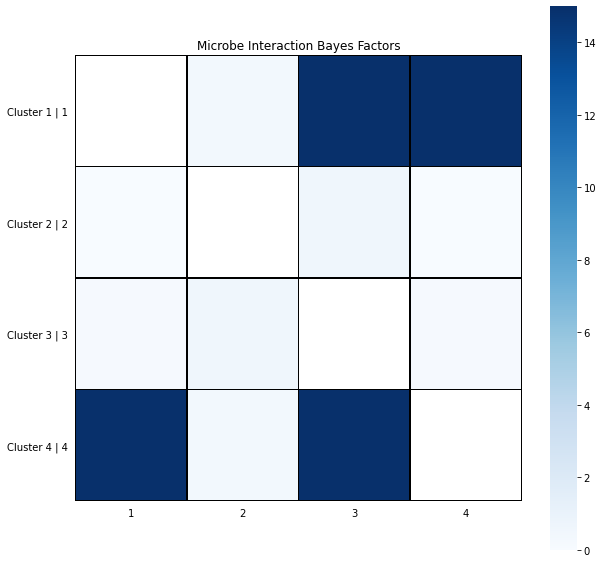

In [36]:
# Plot the posterior
clustering = mcmc.graph[STRNAMES.CLUSTERING_OBJ]
bf_taxa = md2.generate_interation_bayes_factors_posthoc(mcmc)
bf_clustering = md2.condense_fixed_clustering_interaction_matrix(bf_taxa, clustering=clustering)

labels = ['Cluster {} | {}'.format(i+1, i+1) for i in range(len(clustering))]
md2.visualization.render_bayes_factors(bf_clustering, yticklabels=labels)
plt.show()

# Cross validation

Take out a single subject and use that as initial conditions for forward simulation

In [37]:
# Make the data and validation Study objects
study = md2.dataset.parse(
    name='uc-toy-dataset', 
    taxonomy='output/data/uc-toy/taxonomy.tsv', 
    reads='output/data/uc-toy/reads.tsv', 
    qpcr='output/data/uc-toy/qpcr.tsv', 
    perturbations='output/data/uc-toy/perturbations.tsv', 
    metadata='output/data/uc-toy/metadata.tsv')

val = study.pop_subject('8')
val.name += '-validate'

print(study.name)
for subj in study:
    print(subj.name)
for pert in study.perturbations:
    print(pert)
print()
print(val.name)
for subj in val:
    print(subj.name)
for pert in val.perturbations:
    print(pert)


INFO:base.1275: TaxaSet parsng new taxonomy table. Resetting


uc-toy-dataset
10
6
7
9
Perturbation High Fat Diet:
	Subject 6: (21.5, 28.5)
	Subject 7: (21.5, 28.5)
	Subject 9: (21.5, 28.5)
	Subject 10: (21.5, 28.5)

Perturbation Vancomycin:
	Subject 6: (35.5, 42.5)
	Subject 7: (35.5, 42.5)
	Subject 9: (35.5, 42.5)
	Subject 10: (35.5, 42.5)

Perturbation Gentamicin:
	Subject 6: (50.5, 57.5)
	Subject 7: (50.5, 57.5)
	Subject 9: (50.5, 57.5)
	Subject 10: (50.5, 57.5)


unnamed-study-validate
8
Perturbation High Fat Diet:
	Subject 8: (21.5, 28.5)

Perturbation Vancomycin:
	Subject 8: (35.5, 42.5)

Perturbation Gentamicin:
	Subject 8: (50.5, 57.5)



In [38]:
# Learn the model
params = md2.config.MDSINE2ModelConfig(
    basepath='output/mdsine2/cv/'+study.name, seed=0, 
    burnin=50, n_samples=100, 
    negbin_a0=a0, negbin_a1=a1, checkpoint=50)
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'
mcmc = md2.initialize_graph(params=params, graph_name=study.name, subjset=study)
mcmc = md2.run_graph(mcmc, crash_if_error=True)

INFO:base.2727: max_value found: 1797837340792.1643, scaling_factor: 5.5622384590108656e-11
INFO:run.87: Normalizing abundances for a max value of 100. Normalization constant: 5.5622E-11
INFO:run.254: There are 297 qPCR measurements for 3 buckets. Each bucket is 99 measurements long
INFO:run.289: Initializing Filtering
INFO:posterior.2670: Setting up the essential timepoints
INFO:posterior.2683: Essential timepoints: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   6.   7.   8.   9.  10.  11.  14.  16.  18.  21.  21.5 22.  22.5 23.  23.5 24.  25.  28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  33.  35.  35.5 36.  36.5 37.  37.5 38.  39.  42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  47.  50.  50.5 51.  51.5 52.  52.5 53.  54.  57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
INFO:run.289: Initializing Zero inflation
INFO:design_matrices.851: Initializing LHS vector
INFO:design_matrices.1006: Initializing growth design matrix
INFO:design_matrices.932: Initializing self-inter

INFO:run.374: 		prior.loc: 0
INFO:run.372: 	perturbation Vancomycin
INFO:run.373: 		value: {100115: 0, 100116: 0, 100117: 0, 100118: 0, 100119: 0, 100120: 0, 100121: 0, 100122: 0, 100123: 0, 100124: 0, 100125: 0, 100126: 0, 100127: 0, 100128: 0, 100129: 0}
INFO:run.374: 		prior.loc: 0
INFO:run.372: 	perturbation Gentamicin
INFO:run.373: 		value: {100115: 0, 100116: 0, 100117: 0, 100118: 0, 100119: 0, 100120: 0, 100121: 0, 100122: 0, 100123: 0, 100124: 0, 100125: 0, 100126: 0, 100127: 0, 100128: 0, 100129: 0}
INFO:run.374: 		prior.loc: 0
INFO:run.375: Perturbation prior variances:
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.380: Perturbation indicators:
INFO:run.383: 	perturbation High Fat Diet: [False False False False False False False False False False False False 

INFO:inference.456: Cluster interaction probability: 0.5907630856509913
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.02603936195373535s
perturbation High Fat Diet (9/15): [False  True False  True  True False  True  True  True  True False  True  True False False]
perturbation Vancomycin (10/15): [False  True False  True  True  True  True False  True False  True False  True  True  True]
perturbation Gentamicin (11/15): [False  True  True False  True  True False  True False  True  True  True  True  True  True]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.5032813527614807
	perturbation Vancomycin: 0.606532764595715
	perturbation Gentamicin: 0.65283684507178
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.1561304  0.39361365 0.65143108 0.36511188 0.60037192 0.

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.08343731 0.21935548 0.45055237 0.08132064 0.66671448 0.71610887 0.152467   0.259189   0.29046298 0.30360319 0.32960671 0.44947594 1.45316177 0.76213581 0.15028379]
Self Interactions:
[1.88215473e-01 1.10014286e-01 1.68447523e-01 5.38095473e+00 1.23784027e+00 6.64952382e-01 5.98842899e-02 4.39603631e-01 3.69544485e+01 4.84587786e+01 1.37917981e+00 9.20794035e+01 3.78785974e+00 1.92941094e+00 3.31958442e+00]
Interactions:
[-76.98270038  68.23008154   4.79863125   0.99795047   3.4008842  -44.0271055    0.13252516  -0.40975003  97.33285797 -26.73860572 -23.78305834  -5.4921639    0.79531645  10.44121761  -1.35094035   7.13373344   2.47581292  -0.75713145  36.25984654 -20.93426006   9.1237103   -6.39001279 -13.47285215 -44.22444746 -19.05162269  -1.87190986 -22.29747116  14.11334439  66.25708272  -2.19687361   6.96958011   9.87724664   2.58918598  24.38410455 -58.90229762  -1.2

INFO:inference.456: Clustering concentration parameter: 2698.9912000084532
INFO:inference.447: 

Inference iteration 4/100, time: 0.3469705581665039
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False  True False Fal

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.4843539449780985
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -119.14006393229901
	perturbation Vancomycin: -9.258626976098446
	perturbation Gentamicin: 20.009783278399667
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4191071634859607, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2789934311021393, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 31.298263977838612
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 25245.826551965445
	perturbation Vancomycin: 4780.43595290712
	perturbation G

INFO:inference.456: Cluster interaction probability: 0.053223567657930494
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.013979673385620117s
perturbation High Fat Diet (0/14): [False False False False False False False False False False False False False False]
perturbation Vancomycin (1/14): [False  True False False False False False False False False False False False False]
perturbation Gentamicin (0/14): [False False False False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0008266084108613446
	perturbation Vancomycin: 0.05928057393067922
	perturbation Gentamicin: 0.002371445874271937
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.4029349  0.0296601  0.50147295 0.09993498 0.3339706  0.71740516

INFO:inference.456: Clustering concentration parameter: 92.22666078765575
INFO:posterior.1585: 0/15: 2
INFO:posterior.1585: 1/15: 7
INFO:posterior.1585: 2/15: 4
INFO:posterior.1585: 3/15: 11
INFO:posterior.1585: 4/15: 5
INFO:posterior.1585: 5/15: 8
INFO:posterior.1585: 6/15: 14
INFO:posterior.1585: 7/15: 3
INFO:posterior.1585: 8/15: 12
INFO:posterior.1585: 9/15: 6
INFO:posterior.1585: 10/15: 0
INFO:posterior.1585: 11/15: 9
INFO:posterior.1585: 12/15: 10
INFO:posterior.1585: 13/15: 1
INFO:posterior.1585: 14/15: 13
INFO:inference.447: 

Inference iteration 9/100, time: 0.8831050395965576
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fal

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.5924740439711353
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -88.15743457749545
	perturbation Vancomycin: -3.941550297903161
	perturbation Gentamicin: 26.025190302474037
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.670138777383479, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.37001466178474907, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 14.721298905803833
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1783.5716903701355
	perturbation Vancomycin: 2918.872126193267
	perturbation G

INFO:inference.456: Cluster interaction probability: 0.0039002884934129615
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.012031793594360352s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (2/15): [False False False False False False False False False False False False False  True  True]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.13403722486135985
	perturbation Vancomycin: 0.28975308751028905
	perturbation Gentamicin: 0.02383443825128591
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.62932539 0.23430128 0.51906447 0.03786055 0.431

INFO:inference.456: Filtering: no-mp - Time: 0.2210, Acc: [0.615, 0.621, 0.615, 0.604], data/sec: 20362.61
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 15
Cluster 100180
	members: ['OTU_6']
	size: 1
Cluster 100182
	members: ['OTU_10']
	size: 1
Cluster 100184
	members: ['OTU_9']
	size: 1
Cluster 100186
	members: ['OTU_12']
	size: 1
Cluster 100187
	members: ['OTU_3']
	size: 1
Cluster 100189
	members: ['OTU_17']
	size: 1
Cluster 100190
	members: ['OTU_18']
	size: 1
Cluster 100192
	members: ['OTU_13']
	size: 1
Cluster 100194
	members: ['OTU_4']
	size: 1
Cluster 100196
	members: ['OTU_5']
	size: 1
Cluster 100197
	members: ['OTU_8']
	size: 1
Cluster 100198
	members: ['OTU_2']
	size: 1
Cluster 100199
	members: ['OTU_7']
	size: 1
Cluster 100201
	members: ['OTU_16']
	size: 1
Cluster 100203
	members: ['OTU_1']
	size: 1
no mp - Total time: 0.5539970397949219
INFO:inference.456: Clustering concentration parameter: 134

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.006620855983310563
	perturbation Vancomycin: 0.2878068408213779
	perturbation Gentamicin: 0.014920839158986008
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.73060709 0.50733998 0.34498564 0.13920952 0.48051356 0.16036862 0.34458432 0.31590055 0.03872106 0.20304576 0.19336086 0.12959136 0.48733542 0.6729814  0.35118499]
Self Interactions:
[  0.46677599   0.25297994   0.15458181   6.10992812   0.65450507   0.78899535   1.96546683   1.71851399  90.25949321 154.29684804   1.29457929  66.39288162   4.44443235   2.50777984   4.59508585]
Interactions:
[-41.48616778]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-3.71813126 -2.76419939]
	 perturbation Gentamicin: []
INFO:inference.456: Mea

INFO:posterior.1585: 0/15: 11
INFO:posterior.1585: 1/15: 3
INFO:posterior.1585: 2/15: 13
INFO:posterior.1585: 3/15: 14
INFO:posterior.1585: 4/15: 10
INFO:posterior.1585: 5/15: 6
INFO:posterior.1585: 6/15: 0
INFO:posterior.1585: 7/15: 7
INFO:posterior.1585: 8/15: 1
INFO:posterior.1585: 9/15: 9
INFO:posterior.1585: 10/15: 12
INFO:posterior.1585: 11/15: 8
INFO:posterior.1585: 12/15: 4
INFO:posterior.1585: 13/15: 2
INFO:posterior.1585: 14/15: 5
INFO:inference.447: 

Inference iteration 17/100, time: 0.8790321350097656
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fals

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -47.527024380881755
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 105.58517444413931
	perturbation Vancomycin: -12.733048409537728
	perturbation Gentamicin: 1.0007885216309866
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.741205296567615, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7725574838328727, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 21.353192117603484
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 9481.167420123391
	perturbation Vancomycin: 1990.760362190405
	perturbation Ge

INFO:inference.456: Cluster interaction probability: 0.008474569740740295
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.01200413703918457s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (3/15): [False False False  True False False False False False  True  True False False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.07708445111635516
	perturbation Vancomycin: 0.23930757068976252
	perturbation Gentamicin: 0.0015106194841068197
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.56785709 0.29919305 0.32888897 0.30366051 0.627

INFO:inference.456: Filtering: no-mp - Time: 0.2300, Acc: [0.611, 0.602, 0.625, 0.599], data/sec: 19564.08
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 13
Cluster 100199
	members: ['OTU_5', 'OTU_13']
	size: 2
Cluster 100226
	members: ['OTU_4']
	size: 1
Cluster 100229
	members: ['OTU_10']
	size: 1
Cluster 100231
	members: ['OTU_1']
	size: 1
Cluster 100233
	members: ['OTU_6']
	size: 1
Cluster 100235
	members: ['OTU_8', 'OTU_12']
	size: 2
Cluster 100237
	members: ['OTU_17']
	size: 1
Cluster 100239
	members: ['OTU_18']
	size: 1
Cluster 100241
	members: ['OTU_2']
	size: 1
Cluster 100243
	members: ['OTU_7']
	size: 1
Cluster 100246
	members: ['OTU_16']
	size: 1
Cluster 100247
	members: ['OTU_3']
	size: 1
Cluster 100250
	members: ['OTU_9']
	size: 1
no mp - Total time: 0.5050265789031982
INFO:inference.456: Clustering concentration parameter: 1829.1621511283902
INFO:inference.447: 

Inference iteration 22/100, time

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -153.35904257708745
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 6.9497161015385975
	perturbation Vancomycin: 25.851093347464897
	perturbation Gentamicin: -96.20545749259578
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.136272162537916, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.3500486905907243, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 26.942031826903484
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3414.6229656480205
	perturbation Vancomycin: 4254.137416828476
	perturbation Ge

INFO:inference.456: Cluster interaction probability: 0.00311287754968384
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.010020256042480469s
perturbation High Fat Diet (0/12): [False False False False False False False False False False False False]
perturbation Vancomycin (1/12): [ True False False False False False False False False False False False]
perturbation Gentamicin (1/12): [False False False False False False False  True False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.11481142993895396
	perturbation Vancomycin: 0.056586986501413146
	perturbation Gentamicin: 0.10535112009175719
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.48455364 0.33258858 0.52241952 0.2940643  0.47614961 0.24066341 0.19120547 0.39318104 0.33295677 0.068

INFO:inference.456: Cluster interaction probability: 0.0011798921315861422
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.009976625442504883s
perturbation High Fat Diet (0/12): [False False False False False False False False False False False False]
perturbation Vancomycin (1/12): [ True False False False False False False False False False False False]
perturbation Gentamicin (0/12): [False False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.006060952579233037
	perturbation Vancomycin: 0.019652066264792375
	perturbation Gentamicin: 2.2942250181615867e-05
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.59281298 0.32007894 0.70261108 0.21823571 0.42088002 0.38779013 0.30667689 0.41640822 0.15055693

INFO:posterior.1585: 6/15: 8
INFO:posterior.1585: 7/15: 14
INFO:posterior.1585: 8/15: 0
INFO:posterior.1585: 9/15: 1
INFO:posterior.1585: 10/15: 9
INFO:posterior.1585: 11/15: 13
INFO:posterior.1585: 12/15: 2
INFO:posterior.1585: 13/15: 12
INFO:posterior.1585: 14/15: 5
INFO:inference.447: 

Inference iteration 29/100, time: 0.7659657001495361
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False 

INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 11
Cluster 100237
	members: ['OTU_17']
	size: 1
Cluster 100264
	members: ['OTU_5']
	size: 1
Cluster 100272
	members: ['OTU_8']
	size: 1
Cluster 100274
	members: ['OTU_4']
	size: 1
Cluster 100275
	members: ['OTU_7']
	size: 1
Cluster 100278
	members: ['OTU_12', 'OTU_10']
	size: 2
Cluster 100279
	members: ['OTU_13', 'OTU_18']
	size: 2
Cluster 100281
	members: ['OTU_9', 'OTU_16']
	size: 2
Cluster 100284
	members: ['OTU_1', 'OTU_3']
	size: 2
Cluster 100285
	members: ['OTU_2']
	size: 1
Cluster 100290
	members: ['OTU_6']
	size: 1
no mp - Total time: 0.4610013961791992
INFO:inference.456: Clustering concentration parameter: 10.351467097602281
INFO:inference.447: 

Inference iteration 31/100, time: 0.30696535110473633
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False Fal

INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3938.130930181722
	perturbation Vancomycin: 2045.3911482325796
	perturbation Gentamicin: 1160.1632094753772
INFO:inference.456: Process Variance parameter: 3.526929747314283, empirical_variance: 3.54147
INFO:inference.456: Filtering: no-mp - Time: 0.2240, Acc: [0.609, 0.629, 0.628, 0.615], data/sec: 20089.35
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 11
Cluster 100237
	members: ['OTU_17']
	size: 1
Cluster 100264
	members: ['OTU_5']
	size: 1
Cluster 100272
	members: ['OTU_8']
	size: 1
Cluster 100274
	members: ['OTU_4']
	size: 1
Cluster 100275
	members: ['OTU_7']
	size: 1
Cluster 100278
	members: ['OTU_12', 'OTU_10']
	size: 2
Cluster 100279
	members: ['OTU_13', 'OTU_18']
	size: 2
Cluster 100281
	members: ['OTU_9', 'OTU_16']
	size: 2
Cluster 100284
	m

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 38.11040826126672
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 35.03647352538978
	perturbation Vancomycin: -10.714527591350828
	perturbation Gentamicin: 97.9921491399246
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0290271077299324, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.7417537374955931, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 6484.284087476507
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 15957.302839811073
	perturbation Vancomycin: 725.1812589707448
	perturbation Gentam

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.07638337876697442
	perturbation Vancomycin: 0.17592393134667242
	perturbation Gentamicin: 0.10093166567242629
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.5366982  0.4322036  0.63889876 0.09095049 0.5717013  0.36372939 0.29876263 0.45476229 0.40141008 0.10670005 0.77689229 0.17993041 0.88909726 0.68570167 0.18800653]
Self Interactions:
[  0.48372002   0.29071363   0.21924886  11.33968084   1.08183495   1.20054213   1.23736047   1.26885733 183.8780146  117.69173039   3.08911909  84.02783207   3.98823756   4.62209119   4.54101843]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: [3.47947995]
	 perturbation Vancomycin: [-2.52403442 -2.98085006]
	 perturbation Gentamicin: []
INFO:inference.456: Mean p

INFO:inference.456: Cluster interaction probability: 0.01816709328519292
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.010032415390014648s
perturbation High Fat Diet (0/11): [False False False False False False False False False False False]
perturbation Vancomycin (2/11): [ True False False False False  True False False False False False]
perturbation Gentamicin (0/11): [False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.003645801793136214
	perturbation Vancomycin: 0.21503201388604756
	perturbation Gentamicin: 0.0011224681640126545
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.88308205 0.28821676 0.484981   0.21899661 0.51404046 0.49890956 0.40980905 0.4541502  0.39734331 0.17213076 0.29098464

INFO:inference.456: Cluster interaction probability: 0.014507523631974308
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.009977579116821289s
perturbation High Fat Diet (0/11): [False False False False False False False False False False False]
perturbation Vancomycin (2/11): [ True False False False False  True False False False False False]
perturbation Gentamicin (0/11): [False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.01742981266255197
	perturbation Vancomycin: 0.08891809887500175
	perturbation Gentamicin: 0.0007200945866975301
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.65210273 0.45166122 0.26417422 0.23939261 0.57167617 0.77941943 0.41133721 0.37394926 0.42645402 0.15037685 0.64130131

INFO:inference.456: Clustering concentration parameter: 16.071639045463932
INFO:inference.447: 

Inference iteration 42/100, time: 0.3356199264526367
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False  True False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fa

INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4671.942715524161
	perturbation Vancomycin: 1950.4822131196909
	perturbation Gentamicin: 3184.335841276122
INFO:inference.456: Process Variance parameter: 3.333391203426855, empirical_variance: 3.26758
INFO:inference.456: Filtering: no-mp - Time: 0.2210, Acc: [0.634, 0.604, 0.628, 0.603], data/sec: 20357.91
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 13
Cluster 100237
	members: ['OTU_6', 'OTU_16']
	size: 2
Cluster 100303
	members: ['OTU_7']
	size: 1
Cluster 100330
	members: ['OTU_9']
	size: 1
Cluster 100332
	members: ['OTU_10']
	size: 1
Cluster 100333
	members: ['OTU_3']
	size: 1
Cluster 100335
	members: ['OTU_13']
	size: 1
Cluster 100337
	members: ['OTU_18', 'OTU_2']
	size: 2
Cluster 100339
	members: ['OTU_8']
	size: 1
Cluster 100341
	members: ['OT

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.58476787 0.40236093 0.53450958 0.09498287 0.54778767 0.75754319 0.36085651 0.17885431 0.14396402 0.06091506 0.51716287 0.34185159 1.14301877 0.37304333 0.21842855]
Self Interactions:
[3.49661511e-01 1.96747622e-01 2.57111333e-01 4.97132811e+00 8.97731152e-01 3.98502736e-01 2.28753819e+00 4.82533479e-01 2.05845022e+02 2.49458687e+02 2.21784585e+00 1.08983549e+02 3.33456747e+00 3.49615382e+00 2.17831023e+00]
Interactions:
[ -0.28953501 -77.23594141 -42.41937457 -10.67803133 -37.62324098]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [5.9983684]
	 perturbation Gentamicin: []
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -34.55015438915918
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturba

INFO:inference.456: Cluster interaction probability: 0.017993997166662147
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.012031793594360352s
perturbation High Fat Diet (0/13): [False False False False False False False False False False False False False]
perturbation Vancomycin (1/13): [False False False False False False False  True False False False False False]
perturbation Gentamicin (0/13): [False False False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.06207795571681751
	perturbation Vancomycin: 0.055314182807224714
	perturbation Gentamicin: 0.06837800247875112
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.47148948 0.30585113 0.54124428 0.37971685 0.66590153 0.41918925 0.80977192 0.336148

INFO:inference.456: Clustering concentration parameter: 153.0726669666798
INFO:posterior.1585: 0/15: 11
INFO:posterior.1585: 1/15: 6
INFO:posterior.1585: 2/15: 0
INFO:posterior.1585: 3/15: 10
INFO:posterior.1585: 4/15: 8
INFO:posterior.1585: 5/15: 3
INFO:posterior.1585: 6/15: 2
INFO:posterior.1585: 7/15: 4
INFO:posterior.1585: 8/15: 9
INFO:posterior.1585: 9/15: 1
INFO:posterior.1585: 10/15: 5
INFO:posterior.1585: 11/15: 12
INFO:posterior.1585: 12/15: 13
INFO:posterior.1585: 13/15: 14
INFO:posterior.1585: 14/15: 7
INFO:inference.447: 

Inference iteration 49/100, time: 0.7609961032867432
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False  True False False False False False False False False False False Fa

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.082453447655408, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.6497056218550121, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 5698.592609129466
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2992.2287785945086
	perturbation Vancomycin: 2524.685703069245
	perturbation Gentamicin: 5253.7390012017295
INFO:inference.456: Process Variance parameter: 3.0177516452539144, empirical_variance: 2.96223
INFO:inference.456: Filtering: no-mp - Time: 0.2161, Acc: [0.639, 0.608, 0.611, 0.617], data/sec: 20822.36
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 13
Cluste

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.78838654 0.42154226 0.27856585 0.3828841  0.76611712 0.64033994 0.6777414  0.46994766 0.40925219 0.04671645 0.47183675 0.47980934 0.90832152 1.07063171 0.42607564]
Self Interactions:
[3.62391504e-01 2.77706835e-01 1.66877754e-01 5.76361132e+00 1.30772773e+00 5.22797459e-01 2.36519518e+00 1.24979921e+00 1.71319098e+02 1.90209061e+02 3.15928215e+00 8.54851661e+01 3.67227439e+00 5.18661517e+00 5.73681673e+00]
Interactions:
[  -1.02207917   -0.16479457 -128.37806375 -154.85723672   -0.28811141]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.7130154]
	 perturbation Gentamicin: []
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 26.42212667116481
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	per

INFO:inference.456: Cluster interaction probability: 0.0925585622463167
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.00997614860534668s
perturbation High Fat Diet (0/11): [False False False False False False False False False False False]
perturbation Vancomycin (1/11): [False False False False False False False False False  True False]
perturbation Gentamicin (0/11): [False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.12429313009673026
	perturbation Vancomycin: 0.17840341969314885
	perturbation Gentamicin: 0.030327354614069234
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.49788032 0.61218235 0.49903851 0.20906739 0.76931811 0.70886443 0.4961924  0.15006019 0.28176148 0.07182808 0.57267816 0.2

INFO:inference.456: Cluster interaction probability: 0.0666492369571409
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.01003122329711914s
perturbation High Fat Diet (0/11): [False False False False False False False False False False False]
perturbation Vancomycin (2/11): [ True False False False False False False False False  True False]
perturbation Gentamicin (0/11): [False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.03975830922575344
	perturbation Vancomycin: 0.08107005433362273
	perturbation Gentamicin: 0.09766273073923384
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.54862744 0.48572263 0.31598078 0.30261633 0.4145239  0.59669177 0.50563128 0.25338584 0.38536596 0.13017759 0.69183306 0.11

INFO:inference.456: Clustering concentration parameter: 22.78503524256136
INFO:inference.447: 

Inference iteration 58/100, time: 0.3219926357269287
INFO:inference.456: Cluster interaction indicator parameter: [ True  True False  True False  True False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False  True False False False False False  True False False False False False False False False False False False False]
total time: 0.03699970245361328, n_interactions: 10/110, 0.09
INFO:inference.456: Cluster interaction probability: 0.14042184357

INFO:inference.456: Clustering concentration parameter: 9.26386293417959
INFO:inference.447: 

Inference iteration 60/100, time: 0.30699944496154785
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False  True False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False  True False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False]
total time: 0.03999972343444824, n_interactions: 6/110, 0.05
INFO:inference.456: Cluster interaction probability: 0.046749654192

INFO:inference.456: Process Variance parameter: 2.7938552298137718, empirical_variance: 2.80957
INFO:inference.456: Filtering: no-mp - Time: 0.2210, Acc: [0.616, 0.613, 0.621, 0.621], data/sec: 20363.75
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 9
Cluster 100387
	members: ['OTU_16', 'OTU_7', 'OTU_6']
	size: 3
Cluster 100421
	members: ['OTU_4', 'OTU_17']
	size: 2
Cluster 100433
	members: ['OTU_5', 'OTU_12', 'OTU_2']
	size: 3
Cluster 100436
	members: ['OTU_8']
	size: 1
Cluster 100439
	members: ['OTU_13']
	size: 1
Cluster 100440
	members: ['OTU_1']
	size: 1
Cluster 100444
	members: ['OTU_3']
	size: 1
Cluster 100447
	members: ['OTU_10', 'OTU_18']
	size: 2
Cluster 100452
	members: ['OTU_9']
	size: 1
no mp - Total time: 0.3729994297027588
INFO:inference.456: Clustering concentration parameter: 10.862844093177554
INFO:inference.447: 

Inference iteration 62/100, time: 0.28799962997436523
INFO:inference.456: Clu

INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 9
Cluster 100387
	members: ['OTU_16', 'OTU_7', 'OTU_6']
	size: 3
Cluster 100421
	members: ['OTU_4', 'OTU_17']
	size: 2
Cluster 100433
	members: ['OTU_5', 'OTU_12', 'OTU_2']
	size: 3
Cluster 100436
	members: ['OTU_8']
	size: 1
Cluster 100439
	members: ['OTU_13']
	size: 1
Cluster 100440
	members: ['OTU_1']
	size: 1
Cluster 100444
	members: ['OTU_3']
	size: 1
Cluster 100447
	members: ['OTU_10', 'OTU_18']
	size: 2
Cluster 100452
	members: ['OTU_9']
	size: 1
no mp - Total time: 0.3729994297027588
INFO:inference.456: Clustering concentration parameter: 6.391974625127252
INFO:inference.447: 

Inference iteration 64/100, time: 0.2785670757293701
INFO:inference.456: Cluster interaction indicator parameter: [False  True False False False False False False False False False  True False False False False False False False  True False False False False False False False Fals

INFO:inference.456: Filtering: no-mp - Time: 0.2190, Acc: [0.616, 0.613, 0.623, 0.620], data/sec: 20544.69
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 100387
	members: ['OTU_6', 'OTU_7', 'OTU_17', 'OTU_16']
	size: 4
Cluster 100455
	members: ['OTU_3', 'OTU_18', 'OTU_5', 'OTU_1', 'OTU_4', 'OTU_8', 'OTU_10']
	size: 7
Cluster 100459
	members: ['OTU_13']
	size: 1
Cluster 100460
	members: ['OTU_12']
	size: 1
Cluster 100465
	members: ['OTU_9']
	size: 1
Cluster 100470
	members: ['OTU_2']
	size: 1
no mp - Total time: 0.33499813079833984
INFO:inference.456: Clustering concentration parameter: 2.72157102041751
INFO:inference.447: 

Inference iteration 66/100, time: 0.27700066566467285
INFO:inference.456: Cluster interaction indicator parameter: [False False  True  True  True False False  True  True False False False False False False False False False False False False False False False False False False F

INFO:inference.456: Cluster interaction probability: 0.1526062347398
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.008025646209716797s
perturbation High Fat Diet (0/6): [False False False False False False]
perturbation Vancomycin (1/6): [ True False False False False False]
perturbation Gentamicin (1/6): [False  True False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.013722582803793367
	perturbation Vancomycin: 0.07934266407170532
	perturbation Gentamicin: 0.25995569684794023
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.8761383  0.36427717 0.63870509 0.25890639 0.5839393  0.66908849 0.49909164 0.71135399 0.19942674 0.28345968 0.67428113 0.10769672 0.62811253 0.71647566 0.58728153]
Self Interactions:
[  0.40489848   0.21131558   0.196

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.019115035302488342
	perturbation Vancomycin: 0.16502985988310703
	perturbation Gentamicin: 0.02183034551265479
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.77644309 0.45661286 0.33717992 0.03550936 0.74488442 0.77413159 0.71250653 0.55468432 0.28647571 0.15393901 0.21620026 0.26996241 1.00338668 1.13775673 0.73231984]
Self Interactions:
[3.16695055e-01 2.29294359e-01 1.45371448e-01 6.02170360e+00 7.26345168e-01 4.47863220e-01 2.36777261e-01 5.81653868e-01 1.74630438e+02 1.36886228e+02 1.87867395e+00 1.09466688e+02 1.76215552e+00 3.47627238e+00 2.94532202e+00]
Interactions:
[ -0.11181289  -0.70382425 -21.82638907  -0.61948906  -0.91490906  -2.66834385  -6.03397576]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: [

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 0.8903973204469384
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -81.92519190375619
	perturbation Vancomycin: -39.03873475914688
	perturbation Gentamicin: -62.466708662106164
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8159922130492767, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.923746476759951, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 359.54748835349767
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1646.5919942510884
	perturbation Vancomycin: 2004.1817696407518
	perturbation G

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.5507772122797514, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.7158524471785426, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 154.63945136863305
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 297.82466546612386
	perturbation Vancomycin: 1464.2450806777508
	perturbation Gentamicin: 2381.3564259683394
INFO:inference.456: Process Variance parameter: 2.6594786692611954, empirical_variance: 2.63192
INFO:inference.456: Filtering: no-mp - Time: 0.2370, Acc: [0.615, 0.596, 0.640, 0.646], data/sec: 18987.25
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Clus

INFO:inference.456: Process Variance parameter: 2.5052492261467036, empirical_variance: 2.58688
INFO:inference.456: Filtering: no-mp - Time: 0.2260, Acc: [0.629, 0.635, 0.620, 0.617], data/sec: 19910.78
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100387
	members: ['OTU_18', 'OTU_7', 'OTU_6', 'OTU_16', 'OTU_17']
	size: 5
Cluster 100455
	members: ['OTU_10', 'OTU_3']
	size: 2
Cluster 100472
	members: ['OTU_8', 'OTU_5', 'OTU_9', 'OTU_1']
	size: 4
Cluster 100495
	members: ['OTU_2']
	size: 1
Cluster 100497
	members: ['OTU_13']
	size: 1
Cluster 100499
	members: ['OTU_12']
	size: 1
Cluster 100504
	members: ['OTU_4']
	size: 1
no mp - Total time: 0.3009660243988037
INFO:inference.456: Clustering concentration parameter: 12.343728261940395
INFO:posterior.1585: 0/15: 7
INFO:posterior.1585: 1/15: 14
INFO:posterior.1585: 2/15: 2
INFO:posterior.1585: 3/15: 0
INFO:posterior.1585: 4/15: 5
INFO:posterior.1585: 5/

INFO:inference.456: Filtering: no-mp - Time: 0.2370, Acc: [0.644, 0.611, 0.611, 0.623], data/sec: 18984.94
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 8
Cluster 100387
	members: ['OTU_18', 'OTU_6', 'OTU_17', 'OTU_16', 'OTU_7']
	size: 5
Cluster 100472
	members: ['OTU_8', 'OTU_1', 'OTU_5']
	size: 3
Cluster 100510
	members: ['OTU_3', 'OTU_9']
	size: 2
Cluster 100515
	members: ['OTU_12']
	size: 1
Cluster 100517
	members: ['OTU_13']
	size: 1
Cluster 100520
	members: ['OTU_4']
	size: 1
Cluster 100522
	members: ['OTU_10']
	size: 1
Cluster 100526
	members: ['OTU_2']
	size: 1
no mp - Total time: 0.3130025863647461
INFO:inference.456: Clustering concentration parameter: 7.533991399841932
INFO:inference.447: 

Inference iteration 79/100, time: 0.2939882278442383
INFO:inference.456: Cluster interaction indicator parameter: [ True False  True False False False False False False  True False False False False False Fals

INFO:inference.456: Clustering concentration parameter: 8.106393928960612
INFO:posterior.1585: 0/15: 5
INFO:posterior.1585: 1/15: 9
INFO:posterior.1585: 2/15: 12
INFO:posterior.1585: 3/15: 11
INFO:posterior.1585: 4/15: 7
INFO:posterior.1585: 5/15: 10
INFO:posterior.1585: 6/15: 6
INFO:posterior.1585: 7/15: 14
INFO:posterior.1585: 8/15: 8
INFO:posterior.1585: 9/15: 4
INFO:posterior.1585: 10/15: 13
INFO:posterior.1585: 11/15: 2
INFO:posterior.1585: 12/15: 3
INFO:posterior.1585: 13/15: 0
INFO:posterior.1585: 14/15: 1
INFO:inference.447: 

Inference iteration 81/100, time: 0.5630290508270264
INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False]
total t

INFO:inference.456: Cluster interaction probability: 0.047539008766804995
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.00700068473815918s
perturbation High Fat Diet (1/6): [False False False  True False False]
perturbation Vancomycin (1/6): [ True False False False False False]
perturbation Gentamicin (0/6): [False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.01705889550006628
	perturbation Vancomycin: 0.22851584265743208
	perturbation Gentamicin: 0.024227922361710334
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.95805554 0.30726102 0.66561827 0.30044265 0.56317168 0.85870691 0.69473096 0.26351673 0.31595797 0.03714338 0.75822785 0.14657632 0.89512745 0.95228888 0.9755333 ]
Self Interactions:
[5.69342791e-01 2.13092768e-01

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.7158465  0.38251496 0.61150481 0.10121685 0.53577352 0.92709839 0.67096784 0.36462023 0.35433072 0.06531875 0.61776178 0.13763225 0.9605739  0.96026523 0.41961594]
Self Interactions:
[4.09453032e-01 2.43267723e-01 2.62849135e-01 8.62957612e+00 9.69836719e-01 6.15899731e-01 2.02896004e-01 1.24955915e+00 3.13634029e+02 2.48245382e+02 2.41573027e+00 1.15984388e+02 2.09189346e+00 1.35893558e+00 4.79097996e-01]
Interactions:
[-0.26463951]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.1208631]
	 perturbation Gentamicin: []
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -11.137009732715539
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -179.11116933077435
	perturbati

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -45.85951169752537
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 181.14884558498684
	perturbation Vancomycin: -18.62862470667453
	perturbation Gentamicin: -155.5963923451554
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.7116616747590203, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.968521158186368, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 325.7782827320764
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1833.9559450587387
	perturbation Vancomycin: 1990.6854121043614
	perturbation Ge

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -49.13295967407195
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 74.77776066019493
	perturbation Vancomycin: 67.47653879760429
	perturbation Gentamicin: 136.6769541157849
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.5550120784319317, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.8913170582647227, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 1042.118562183783
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2431.044273737161
	perturbation Vancomycin: 4211.7934366501495
	perturbation Genta

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -34.160849646878596
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -48.03333059609547
	perturbation Vancomycin: -16.97311539313401
	perturbation Gentamicin: 20.809099842091637
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.0080314371810446, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.946910123131119, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 2371.378894586614
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3697.9830571571288
	perturbation Vancomycin: 1679.7074077925215
	perturbation G

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -42.67229693551906
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 47.81612470126898
	perturbation Vancomycin: -22.802780430483036
	perturbation Gentamicin: -32.970557886627155
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.416921323502989, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.2893260976937944, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 1946.9188973579874
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1118.755912793353
	perturbation Vancomycin: 1573.411904755594
	perturbation Ge

INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.591073877799576, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 2114.6854909720055
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5135.943491751765
	perturbation Vancomycin: 1071.2867896791954
	perturbation Gentamicin: 3383.1431713918428
INFO:inference.456: Process Variance parameter: 2.4110739986598952, empirical_variance: 2.36089
INFO:inference.456: Filtering: no-mp - Time: 0.2222, Acc: [0.608, 0.643, 0.621, 0.594], data/sec: 20251.12
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 8
Cluster 100387
	members: ['OTU_18', 'OTU_16', 'OTU_17', 'OTU_7', 'OTU_6']
	size: 5
Cluster 100472
	members: ['OTU_1', 'OTU_2', 'OTU_12']
	size: 

INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.1238564306125713, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 4544.094506290717
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 538.2198569185896
	perturbation Vancomycin: 868.7507439168627
	perturbation Gentamicin: 80282.14729248022
INFO:inference.456: Process Variance parameter: 2.3594315747850185, empirical_variance: 2.37012
INFO:inference.456: Filtering: no-mp - Time: 0.2250, Acc: [0.614, 0.594, 0.627, 0.614], data/sec: 20000.26
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 8
Cluster 100387
	members: ['OTU_7', 'OTU_18', 'OTU_17', 'OTU_6', 'OTU_16']
	size: 5
Cluster 100472
	members: ['OTU_1', 'OTU_2']
	size: 2
Cluster 10

INFO:inference.456: Process Variance parameter: 2.3325827784465227, empirical_variance: 2.36231
INFO:inference.456: Filtering: no-mp - Time: 0.2211, Acc: [0.628, 0.610, 0.631, 0.596], data/sec: 20352.86
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 8
Cluster 100387
	members: ['OTU_7', 'OTU_18', 'OTU_17', 'OTU_6', 'OTU_16']
	size: 5
Cluster 100472
	members: ['OTU_1', 'OTU_2']
	size: 2
Cluster 100551
	members: ['OTU_12', 'OTU_8']
	size: 2
Cluster 100600
	members: ['OTU_5']
	size: 1
Cluster 100602
	members: ['OTU_10']
	size: 1
Cluster 100604
	members: ['OTU_13', 'OTU_3']
	size: 2
Cluster 100608
	members: ['OTU_4']
	size: 1
Cluster 100610
	members: ['OTU_9']
	size: 1
no mp - Total time: 0.3150026798248291
INFO:inference.456: Clustering concentration parameter: 2.4052444082688895
INFO:inference.488: Inference total time: 0.4094884419441223/Gibb step
INFO:inference.492: remove local traces
INFO:run.547: Denormali

In [39]:
# Forward simulate

# Get the initial conditions
subj = val['8']
M_truth = subj.matrix()['abs']
initial_conditions = M_truth[:,0]
initial_conditions[initial_conditions==0] = 1e5
times = subj.times

# Forward simulate for each gibb step
M = md2.model.gLVDynamicsSingleClustering.forward_sim_from_chain(
    mcmc, subj=subj, initial_conditions=initial_conditions, times=times, 
    simulation_dt=0.01)


INFO:model.116: 5/50 - 0.41903018951416016
INFO:model.116: 10/50 - 0.42055821418762207
INFO:model.116: 15/50 - 0.42603039741516113
INFO:model.116: 20/50 - 0.4220085144042969
INFO:model.116: 25/50 - 0.4030740261077881
INFO:model.116: 30/50 - 0.41000914573669434
INFO:model.116: 35/50 - 0.40996813774108887
INFO:model.116: 40/50 - 0.4169940948486328
INFO:model.116: 45/50 - 0.40703582763671875


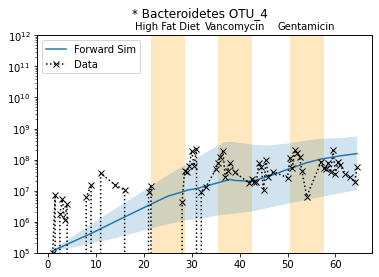

In [40]:
# Plot the forward sims, 25th-75th percentile
taxa = subj.taxa

low = np.percentile(M, q=25, axis=0)
high = np.percentile(M, q=75, axis=0)
med = np.percentile(M, q=50, axis=0)

oidx = 3

fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill_between(times, y1=low[oidx, :], y2=high[oidx, :], alpha=0.2)
ax.plot(times, med[oidx,:], label='Forward Sim')
ax.plot(times, M_truth[oidx, :], label='Data', marker='x', color='black',
       linestyle=':')
ax.set_yscale('log')

md2.visualization.shade_in_perturbations(ax, perturbations=subj.perturbations, subj=subj)
ax.set_ylim(bottom=1e5, top=1e12)

ax.legend()

fig.suptitle(md2.taxaname_for_paper(taxa[oidx], taxa))
plt.show()

# Keystoneness
Calculate the keystoneness by using the `MDSINE2_Paper/keystoneness.py` script of the chain `uc100`.

Each line out table indicates which OTUs to leave out for that iteration of forward simulating to the steady state. Note that these are 0-based indecies for the OTUs.

In [41]:
# Make the leave out table - leave out each Cluster
os.makedirs('output/keystoneness', exist_ok=True)

mcmc = md2.BaseMCMC.load('output/mdsine2/uc100/mcmc.pkl')
clustering = mcmc.graph[STRNAMES.CLUSTERING_OBJ]
md2.generate_cluster_assignments_posthoc(clustering, set_as_value=True)
print(clustering)

txt = '\n'.join([','.join([str(oidx) for oidx in cluster.members]) for cluster in clustering])
f = open('output/keystoneness/leave_out_table.csv', 'w')
f.write(txt)
f.close()
print(txt)

!python ../keystoneness.py \
    --input output/mdsine2/uc0/mcmc.pkl \
    --study output/mdsine2/uc0/subjset.pkl \
    --leave-out-table output/keystoneness/leave_out_table.csv \
    --sep , \
    --simulation-dt 0.01 \
    --output-basepath output/keystoneness/ \
    --n-days 60

INFO:util.174: Number of clusters: 4
INFO:util.180: Clusters assigned: [0 0 0 0 1 3 3 0 0 0 2 1 3 3 3]


Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100138
	members: ['OTU_16', 'OTU_18', 'OTU_17', 'OTU_7', 'OTU_6']
	size: 5
Cluster 100539
	members: ['OTU_1', 'OTU_2', 'OTU_3', 'OTU_4', 'OTU_8', 'OTU_9', 'OTU_10']
	size: 7
Cluster 100540
	members: ['OTU_5', 'OTU_13']
	size: 2
Cluster 100541
	members: ['OTU_12']
	size: 1
12,14,13,6,5
0,1,2,3,7,8,9
4,11
10


INFO:keystoneness.187: "all" provided as index. Iterating over each index
INFO:keystoneness.205: Forward simulating
INFO:keystoneness.210: Input is an MDSINE2.BaseMCMC object
INFO:keystoneness.242: not indexing out anything
INFO:keystoneness.81: 5/50 - 0.46602702140808105
INFO:keystoneness.81: 10/50 - 0.46796631813049316
INFO:keystoneness.81: 15/50 - 0.4660007953643799
INFO:keystoneness.81: 20/50 - 0.4660935401916504
INFO:keystoneness.81: 25/50 - 0.4600059986114502
INFO:keystoneness.81: 30/50 - 0.4579651355743408
INFO:keystoneness.81: 35/50 - 0.4630002975463867
INFO:keystoneness.81: 40/50 - 0.4640026092529297
INFO:keystoneness.81: 45/50 - 0.45803165435791016
INFO:keystoneness.233: indexing out [12, 14, 13, 6, 5]
INFO:keystoneness.81: 5/50 - 0.4564187526702881
INFO:keystoneness.81: 10/50 - 0.44699668884277344
INFO:keystoneness.81: 15/50 - 0.4560251235961914
INFO:keystoneness.81: 20/50 - 0.4449765682220459
INFO:keystoneness.81: 25/50 - 0.44500160217285156
INFO:keystoneness.81: 30/50 - 0.

In [42]:
# Display the steady state table
df_steady_state = pd.read_csv('output/keystoneness/uc-toy-dataset/steady-state-table.tsv',
                sep='\t', index_col=0)
df_steady_state.head()

OTU_1         OTU_2         OTU_3         OTU_4  \
base          3.093428e+10  1.815624e+10  4.236230e+10  89692.651509   
9             3.093448e+10  1.815649e+10  4.236230e+10  89692.704823   
0,1,3,4,8,10           NaN           NaN  4.236230e+10           NaN   
2,7           3.093428e+10  1.815624e+10           NaN  89692.651509   
11            3.092293e+10  1.814069e+10  4.236230e+10  89692.527527   

                     OTU_5         OTU_6         OTU_7         OTU_8  \
base          9.435731e+09  1.315288e+10  8.232234e+09  5.233964e+09   
9             9.435806e+09  1.315282e+10  8.232218e+09  5.233964e+09   
0,1,3,4,8,10           NaN  4.257117e+10  9.548776e+10  5.233964e+09   
2,7           9.435731e+09  1.315288e+10  8.232234e+09           NaN   
11            9.431990e+09  1.316054e+10  8.241588e+09  5.233964e+09   

                     OTU_9       OTU_10        OTU_12        OTU_13  \
base          3.692423e+06  1690.799349  3.812976e+09  3.530125e+07   
9             3.692425e+06          NaN  3.813007e+09  3.530125e+07   
0,1,3,4,8,10           NaN  1690.799349           NaN  3.530125e+07   
2,7           3.692423e+06  1690.799349  3.812976e+09  3.530125e+07   
11            3.692383e+06  1692.466952  3.811552e+09           NaN   

                    OTU_16        OTU_17        OTU_18  
base          4.806152e+09  3.075512e+09  6.914767e+08  
9             4.806110e+09  3.075499e+09  6.914773e+08  
0,1,3,4,8,10  1.081247e+10  5.706281e+09  6.914767e+08  
2,7           4.806152e+09  3.075512e+09  6.914767e+08  
11            4.808368e+09  3.077318e+09  6.915369e+08

In [43]:
# Display the keystoneness table
df_keystoneness = pd.read_csv('output/keystoneness/uc-toy-dataset/keystoneness.tsv',
                sep='\t', index_col=0)
df_keystoneness.head()

l2 distance
9             3.523628e+05
0,1,3,4,8,10  1.034113e+11
2,7           6.276099e-06
11            2.331681e+07
5,6,12,13     0.000000e+00

# Perturbation analysis

In [44]:
!python ../perturbation_analysis.py \
    --input output/mdsine2/uc0/mcmc.pkl \
    --study output/mdsine2/uc0/subjset.pkl \
    --leave-out-table output/keystoneness/leave_out_table.csv \
    --perturbation Vancomycin \
    --output-basepath output/keystoneness/pert_analysis \
    --start-perturbation 60 \
    --end-perturbation 120 \
    --n-days 180

<class 'mdsine2.pylab.base.Perturbations'>
0.01
120.0
60.0
180
18001
0.01
120.0
60.0
180
18001
0.01


INFO:perturbation_analysis.149: "all" provided as index. Iterating over each index
INFO:perturbation_analysis.169: Forward simulating
INFO:perturbation_analysis.174: Input is an MDSINE2.BaseMCMC object
INFO:perturbation_analysis.222: indexing out [12, 14, 13, 6, 5]
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:perturbation_analysis.57: 5/50 - 1.490027666091919
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:perturbation_analysis.57: 10/50 - 1.4820301532745361
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10

120.0
60.0
180
18001
0.01
120.0
60.0
180
18001


INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:perturbation_analysis.57: 5/50 - 1.5500643253326416
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:perturbation_analysis.57: 10/50 - 1.531132459640503
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:perturbation_analysis.57: 15/50 - 1.5336666107177734
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 10000/18001
INFO:dynamics.280: Simulating 

# Full Synthetic
Forward simulate with ICML dataset

INFO:synthetic.175: Forward simulating subj1
INFO:synthetic.175: Forward simulating subj2
INFO:synthetic.175: Forward simulating subj3
INFO:synthetic.175: Forward simulating subj4
INFO:synthetic.175: Forward simulating subj5
INFO:synthetic.249: Fitting real data


13
5


<AxesSubplot:title={'center':'Abundance, Subject subj1, asv level'}, xlabel='Days', ylabel='CFUs/g'>

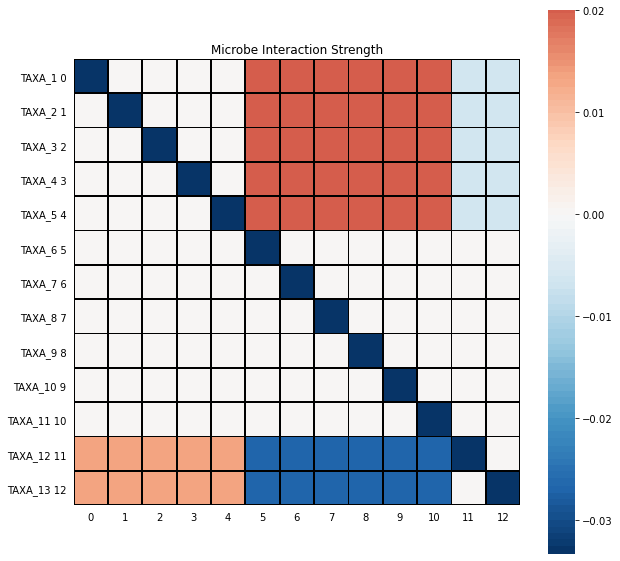

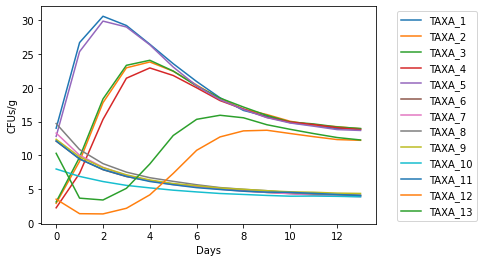

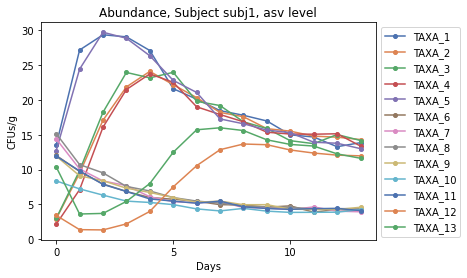

In [33]:
# Make the dynamics
syn = md2.Synthetic(name='icml', seed=0)
syn.icml_dynamics(n_taxa=13)

md2.visualization.render_interaction_strength(
    syn.model.interactions, log_scale=False, taxa=syn.taxa,
    center_colors=True)

# Set the number of subjects
syn.set_subjects(['subj{}'.format(i+1) for i in range(5)])
syn.subjs

# Set the timepoints
syn.set_timepoints(times=np.arange(14))
syn.times

# Forward simulate
pv = md2.model.MultiplicativeGlobal(0.01**2) # 5% process variation
syn.generate_trajectories(dt=0.01, init_dist=md2.variables.Uniform(low=2, high=15),
                          processvar=pv)

# Plot the data without measurement noise
fig = plt.figure()
ax = fig.add_subplot(111)
for taxon in range(13):
    ax.plot(syn.times, syn._data['subj1'][taxon, :], label=syn.taxa[taxon].name)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_ylabel('CFUs/g')
ax.set_xlabel('Days')

# Make a study object and simulate measurement noise
study = syn.simulateMeasurementNoise(
    a0=1e-10, a1=0.001, qpcr_noise_scale=0.01, approx_read_depth=60000, 
    name='sim-study')

print(len(study.taxa))
print(len(study))
      

# Visualize with noise
md2.visualization.abundance_over_time(study['subj1'], dtype='abs', yscale_log=False)

In [36]:
# Inference with the ICML dataset
params = md2.config.MDSINE2ModelConfig(
    basepath='output/mdsine2', seed=6, burnin=200, n_samples=600, 
    checkpoint=100, negbin_a0=1e-10, negbin_a1=0.001)

params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'
mcmc = md2.initialize_graph(params=params, graph_name='icml-graph', subjset=study)

clustering = mcmc.graph[STRNAMES.CLUSTERING_OBJ]
print(clustering.coclusters.value.shape)
print(len(clustering))

mcmc = md2.run_graph(mcmc, crash_if_error=True)


INFO:base.2743: max_value found: 174.74130607742046, scaling_factor: 0.5722745368269953
INFO:run.87: Normalizing abundances for a max value of 100. Normalization constant: 5.7227E-01
INFO:run.254: There are 70 qPCR measurements for 3 buckets. Each bucket is 23 measurements long
INFO:run.289: Initializing Filtering
INFO:posterior.2669: Setting up the essential timepoints
INFO:posterior.2682: Essential timepoints: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
INFO:run.289: Initializing Zero inflation
INFO:design_matrices.850: Initializing LHS vector
INFO:design_matrices.1005: Initializing growth design matrix
INFO:design_matrices.931: Initializing self-interactions design matrix
INFO:run.289: Initializing Clustering concentration parameter
INFO:posterior.874: Cluster Concentration initialization results:
	prior shape: 1e-05
	prior scale: 100000.0
	value: 1.0
INFO:run.289: Initializing Clustering parameter
INFO:posterior.1238: Cluster Assingments initialization results:
Clustering object (c

INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.27393376 0.66534185 0.54253063 0.73442845 0.23335432 0.07399998 0.0653195  0.07635503 0.07534555 0.06107584 0.08331572 0.25466759 0.16868442]
Self Interactions:
[0.02863655 0.07378157 0.05901041 0.08003051 0.02506439 0.0427779  0.04030555 0.04112212 0.04019587 0.03925947 0.04367354 0.03553205 0.02279422]
Interactions:
[]
Perturbations:
None
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: 1
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: 0.04030554843924148
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 16.24537234988043
INFO:inference.455: Process Variance parameter: NA
INFO:inference.455: Filtering: parallel
INFO:inference.455: Clustering parameter:

(13, 13)
13


INFO:posterior.6750: No columns, skipping
INFO:inference.446: 

Inference iteration 3/600, time: 0.10203027725219727
INFO:inference.455: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -2.3654390433102472
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.1342484056257724, Acceptance rate: 1.0
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.00045347620516111853, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.07457462949665308
INFO:inference.455: Process Variance parameter: 0.013943307898087875, empirical_variance: 0.01443
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.110, 0.055, 0.115, 0.066, 0.099], data/sec: 19795.95
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 12
Cluster 100127
	members: ['TAXA_1']
	size: 1
Cluster 100128
	members: ['TAXA_10']
	size: 1
Cluster 100130
	members: ['TAXA_12']
	size: 1
Cluster 100132

INFO:inference.455: Cluster interaction probability: 0.001556786085128612
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.25814021 0.64619078 0.43587505 0.73143318 0.27277178 0.14805622 0.05558191 0.09711822 0.09059518 0.09094278 0.10822936 0.19823906 0.17200417]
Self Interactions:
[0.02782451 0.07277644 0.04505648 0.07680805 0.02795016 0.07466301 0.04675886 0.04752285 0.0400951  0.05146399 0.05869987 0.027989   0.02649319]
Interactions:
[]
Perturbations:
None
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -10.613028527685696
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.3920174367927296, Acceptance rate: 0.875
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.018821490090633688, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the int

INFO:inference.455: Clustering concentration parameter: 535.4807809088885
INFO:posterior.6750: No columns, skipping
INFO:inference.446: 

Inference iteration 11/600, time: 0.09499812126159668
INFO:inference.455: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fa

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.12998381377678017
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.2501059872819646, Acceptance rate: 0.9230769230769231
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.05645689838390479, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.020197215903094
INFO:inference.455: Process Variance parameter: 0.010795642899046136, empirical_variance: 0.01145
INFO:inference.455: Filtering: no-mp - Time: 0.0510, Acc: [0.082, 0.077, 0.115, 0.110, 0.110], data/sec: 17854.45
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100148
	members: ['TAXA_1', 'TAXA_2', 'TAXA_3', 'TAXA_4', 'TAXA_5']
	size: 5
Cluster 100158
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8']
	

INFO:inference.455: Clustering concentration parameter: 8.323461518435588
INFO:posterior.1584: 0/13: 1
INFO:posterior.1584: 1/13: 9
INFO:posterior.1584: 2/13: 0
INFO:posterior.1584: 3/13: 8
INFO:posterior.1584: 4/13: 5
INFO:posterior.1584: 5/13: 4
INFO:posterior.1584: 6/13: 3
INFO:posterior.1584: 7/13: 2
INFO:posterior.1584: 8/13: 12
INFO:posterior.1584: 9/13: 7
INFO:posterior.1584: 10/13: 11
INFO:posterior.1584: 11/13: 10
INFO:posterior.1584: 12/13: 6
INFO:inference.446: 

Inference iteration 17/600, time: 0.26399850845336914
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False False  True  True False False False False False False False False False False False False False False False False False False  True  True False  True False  True False False False False False False  True  True False  True  True  True]
total time: 0.01599597930908203, n_interactions: 13/42, 0.31
INFO:inference.455: Cluster interaction probability: 0.32780248795476175
INFO:inference.455

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.004400929293805334
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.2523065199678514, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.022278741472774158, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.006716705386201267
INFO:inference.455: Process Variance parameter: 0.003862371919840964, empirical_variance: 0.00369
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.088, 0.126, 0.060, 0.088, 0.049], data/sec: 20222.19
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 100148
	members: ['TAXA_1', 'TAXA_2', 'TAXA_3', 'TAXA_4', 'TAXA_5']
	size: 5
Cluster 100158
	members: ['TAXA_9', 'TAXA_7']
	size: 2
Cluster 1001

INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 100148
	members: ['TAXA_2', 'TAXA_3', 'TAXA_1']
	size: 3
Cluster 100158
	members: ['TAXA_9', 'TAXA_8']
	size: 2
Cluster 100177
	members: ['TAXA_4', 'TAXA_5', 'TAXA_11', 'TAXA_6']
	size: 4
Cluster 100203
	members: ['TAXA_13']
	size: 1
Cluster 100204
	members: ['TAXA_7', 'TAXA_10']
	size: 2
Cluster 100208
	members: ['TAXA_12']
	size: 1
no mp - Total time: 0.19100093841552734
INFO:inference.455: Clustering concentration parameter: 5.901391501110444
INFO:inference.446: 

Inference iteration 24/600, time: 0.0820319652557373
INFO:inference.455: Cluster interaction indicator parameter: [ True False False False  True False False False False False False  True False False  True  True  True False False  True False False False False False  True  True False  True False]
total time: 0.012004375457763672, n_interactions: 10/30, 0.33
INFO:inference.455: Cluster intera

INFO:inference.455: Cluster interaction probability: 0.4241997839475107
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.33271453 0.55279558 0.4349876  0.57144667 0.28329329 0.11754483 0.10805459 0.05083281 0.07222778 0.06785015 0.0446704  0.27617013 0.23888796]
Self Interactions:
[0.04150858 0.06691446 0.05488715 0.07045567 0.03614109 0.07796932 0.04898658 0.03521118 0.03903761 0.04074044 0.06702778 0.04043002 0.04585584]
Interactions:
[ 0.01892503 -0.03433588  0.0128373   0.01807577 -0.01456736  0.01812319 -0.04549807 -0.04565808  0.01361607 -0.04102765  0.00969717 -0.02008023 -0.02838586]
Perturbations:
None
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.024410316145197175
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5800971287388464, Acceptance rate: 0.9259259259259259
INFO:inference.455: Mean parameter for the truncated 

INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.034809268062398376, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.02162254539130618
INFO:inference.455: Process Variance parameter: 0.004014594187752833, empirical_variance: 0.00415
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.071, 0.093, 0.077, 0.071, 0.088], data/sec: 19376.18
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100148
	members: ['TAXA_6', 'TAXA_4', 'TAXA_5', 'TAXA_1', 'TAXA_2', 'TAXA_3']
	size: 6
Cluster 100158
	members: ['TAXA_11', 'TAXA_9', 'TAXA_8', 'TAXA_7', 'TAXA_10']
	size: 5
Cluster 100237
	members: ['TAXA_13']
	size: 1
Cluster 100240
	members: ['TAXA_12']
	size: 1
no mp - Total time: 0.16299104690551758
INFO:inference.455: Clustering concentration parameter: 5.801691624086602
INFO:infere

INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.30622092 0.52938321 0.41699118 0.52017831 0.25886346 0.0825535  0.11020429 0.05828179 0.05696394 0.06075438 0.13866447 0.26576095 0.25540896]
Self Interactions:
[0.04448038 0.06755957 0.05828148 0.06688836 0.04137938 0.09433389 0.0529969  0.03721466 0.05073097 0.04029714 0.06150863 0.04564208 0.04971303]
Interactions:
[ 0.02139793 -0.0247343   0.00657293 -0.016587   -0.00775743  0.00070728]
Perturbations:
None
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.11767399001409504
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8472574462747942, Acceptance rate: 0.9411764705882353
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.04181824056181593, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior o

INFO:inference.455: Clustering concentration parameter: 2.233898475315776
INFO:inference.446: 

Inference iteration 38/600, time: 0.07900047302246094
INFO:inference.455: Cluster interaction indicator parameter: [ True False  True False False False False False  True  True  True False  True  True  True  True False False False  True]
total time: 0.008026361465454102, n_interactions: 10/20, 0.50
INFO:inference.455: Cluster interaction probability: 0.32476278102521305
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.30697528 0.5329885  0.36123265 0.46792644 0.26565047 0.0899668  0.12272849 0.09967799 0.00682092 0.0725635  0.1555115  0.31914202 0.27260588]
Self Interactions:
[0.04819664 0.07414229 0.0534865  0.06610834 0.04314555 0.10514769 0.0550099  0.04520393 0.0314043  0.04856105 0.06785936 0.04860036 0.04930822]
Interactions:
[ 0.02313864 -0.02354644  0.01296396 -0.03852401 -0.02208037  0.01473667 -0.03317435 -0.03280376 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.058849478312331616
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7427479456009038, Acceptance rate: 0.9512195121951219
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.009556319364930416, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.01794110125197315
INFO:inference.455: Process Variance parameter: 0.0031956084541433314, empirical_variance: 0.00333
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.066, 0.088, 0.071, 0.082, 0.066], data/sec: 19381.10
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 100148
	members: ['TAXA_1', 'TAXA_2', 'TAXA_5', 'TAXA_6', 'TAXA_3', 'TAXA_4']
	size: 6
Cluster 100158
	members: ['TAXA_8', 'TAXA

INFO:posterior.1584: 4/13: 2
INFO:posterior.1584: 5/13: 6
INFO:posterior.1584: 6/13: 7
INFO:posterior.1584: 7/13: 1
INFO:posterior.1584: 8/13: 4
INFO:posterior.1584: 9/13: 3
INFO:posterior.1584: 10/13: 8
INFO:posterior.1584: 11/13: 12
INFO:posterior.1584: 12/13: 11
INFO:inference.446: 

Inference iteration 45/600, time: 0.23599958419799805
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False  True False False False False  True  True  True  True False False False  True  True  True  True  True]
total time: 0.010998725891113281, n_interactions: 12/20, 0.60
INFO:inference.455: Cluster interaction probability: 0.573760180533583
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.30497913 0.47728717 0.36884492 0.4468513  0.27556454 0.12821536 0.08957668 0.08925049 0.03250492 0.08125163 0.09875317 0.26912009 0.27839269]
Self Interactions:
[0.04854816 0.06728202 0.05515519 0.06576754 0.04520729 0.12211553

INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.1244380207171467, Acceptance rate: 0.9583333333333334
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.025788097757001978, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.00833417581136991
INFO:inference.455: Process Variance parameter: 0.0027471035307297235, empirical_variance: 0.00286
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.077, 0.082, 0.077, 0.077, 0.099], data/sec: 19767.96
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 100148
	members: ['TAXA_5', 'TAXA_2', 'TAXA_3', 'TAXA_1', 'TAXA_6', 'TAXA_4']
	size: 6
Cluster 100158
	members: ['TAXA_8', 'TAXA_7', 'TAXA_10', 'TAXA_11']
	size: 4
Cluster 100301
	members: ['TAXA_9']
	size: 1
Cluster 100303
	members: ['

INFO:inference.455: Clustering concentration parameter: 2.846365565102549
INFO:inference.446: 

Inference iteration 52/600, time: 0.07803535461425781
INFO:inference.455: Cluster interaction indicator parameter: [ True False  True  True False False False False False False False  True  True  True  True  True  True  True  True  True]
total time: 0.008031845092773438, n_interactions: 12/20, 0.60
INFO:inference.455: Cluster interaction probability: 0.5427509810878045
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.29302166 0.40874076 0.41958384 0.43880024 0.26786803 0.13614355 0.09566448 0.0847417  0.03481722 0.09959504 0.08539029 0.23520273 0.29849355]
Self Interactions:
[0.04779264 0.06063578 0.06108662 0.06498256 0.04586526 0.12738324 0.04885382 0.04878495 0.03755916 0.05164811 0.04334812 0.04172298 0.05693116]
Interactions:
[ 0.02459332  0.01080155 -0.03397744  0.00619388  0.01254149 -0.03505596 -0.01375115 -0.01484841  

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.030091737118766955
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.6463519387897336, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.02816334688128074, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.020840253208626928
INFO:inference.455: Process Variance parameter: 0.005881087697497776, empirical_variance: 0.00555
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.962, 0.923, 0.956, 0.978, 0.940], data/sec: 19784.86
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 100148
	members: ['TAXA_5', 'TAXA_3', 'TAXA_4', 'TAXA_6', 'TAXA_1', 'TAXA_2']
	size: 6
Cluster 100158
	members: ['TAXA_8', 'TAXA_7']
	size: 2
C

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.04960506563181682
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.8417914074248207, Acceptance rate: 0.94
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.026676032453027913, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.006939015070736594
INFO:inference.455: Process Variance parameter: 0.003222360887150048, empirical_variance: 0.00339
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.945, 0.929, 0.940, 0.951, 0.951], data/sec: 19361.93
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 11
Cluster 100148
	members: ['TAXA_5', 'TAXA_2', 'TAXA_3']
	size: 3
Cluster 100327
	members: ['TAXA_1']
	size: 1
Cluster 100338
	members: ['TAXA_10']
	si

INFO:posterior.1584: 6/13: 12
INFO:posterior.1584: 7/13: 5
INFO:posterior.1584: 8/13: 2
INFO:posterior.1584: 9/13: 4
INFO:posterior.1584: 10/13: 6
INFO:posterior.1584: 11/13: 9
INFO:posterior.1584: 12/13: 7
INFO:inference.446: 

Inference iteration 61/600, time: 0.407001256942749
INFO:inference.455: Cluster interaction indicator parameter: [False  True  True  True False  True  True False False  True False  True  True  True  True  True False  True False  True False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False  True False  True False False  True  True  True False  True False  True False False False  True False False False  True False False False False  True False False False False False False False  True  True  True False  True False False False False  True False False  True False  True  True  True  True False  True False  True  True  True  True  True False  Tr

INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.07018493258027263, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.009424692303628173
INFO:inference.455: Process Variance parameter: 0.0030098299928650366, empirical_variance: 0.00299
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.923, 0.940, 0.945, 0.967, 0.940], data/sec: 20212.44
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 9
Cluster 100148
	members: ['TAXA_6', 'TAXA_2', 'TAXA_3']
	size: 3
Cluster 100351
	members: ['TAXA_4', 'TAXA_5']
	size: 2
Cluster 100355
	members: ['TAXA_9']
	size: 1
Cluster 100357
	members: ['TAXA_10', 'TAXA_11']
	size: 2
Cluster 100359
	members: ['TAXA_12']
	size: 1
Cluster 100361
	members: ['TAXA_1']
	size: 1
Cluster 100365
	members: ['TAXA_13']
	size: 1
Cluster 100370
	members: ['TAXA_7']
	s

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.02458845229861289
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.8913931735147695, Acceptance rate: 0.94
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.04081575972659987, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.010699841714320656
INFO:inference.455: Process Variance parameter: 0.003080672319758132, empirical_variance: 0.00297
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.956, 0.940, 0.962, 0.923, 0.945], data/sec: 19350.74
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 8
Cluster 100148
	members: ['TAXA_1']
	size: 1
Cluster 100351
	members: ['TAXA_2', 'TAXA_3', 'TAXA_4', 'TAXA_5', 'TAXA_6']
	size: 5
Cluster 100357
	membe

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.013348873263610419
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.591138648613687, Acceptance rate: 0.94
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.044245660780419416, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.011285336041509874
INFO:inference.455: Process Variance parameter: 0.002966402440921646, empirical_variance: 0.00297
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.967, 0.885, 0.918, 0.912, 0.940], data/sec: 20666.63
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100351
	members: ['TAXA_2', 'TAXA_4', 'TAXA_5', 'TAXA_3', 'TAXA_6']
	size: 5
Cluster 100357
	members: ['TAXA_7', 'TAXA_11', 'TAXA_9']
	size: 3


INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.956, 0.923, 0.967, 0.956, 0.951], data/sec: 20694.87
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100351
	members: ['TAXA_2', 'TAXA_4', 'TAXA_5', 'TAXA_3', 'TAXA_6']
	size: 5
Cluster 100357
	members: ['TAXA_7', 'TAXA_11', 'TAXA_9']
	size: 3
Cluster 100399
	members: ['TAXA_13']
	size: 1
Cluster 100401
	members: ['TAXA_12']
	size: 1
Cluster 100403
	members: ['TAXA_1']
	size: 1
Cluster 100406
	members: ['TAXA_8']
	size: 1
Cluster 100408
	members: ['TAXA_10']
	size: 1
no mp - Total time: 0.18796539306640625
INFO:inference.455: Clustering concentration parameter: 2.635324674410146
INFO:posterior.1584: 0/13: 7
INFO:posterior.1584: 1/13: 0
INFO:posterior.1584: 2/13: 12
INFO:posterior.1584: 3/13: 8
INFO:posterior.1584: 4/13: 6
INFO:posterior.1584: 5/13: 1
INFO:posterior.1584: 6/13: 10
INFO:posterior.1584: 7/13: 9
INFO:posterior.1584: 8/13: 3
IN

INFO:inference.455: Clustering concentration parameter: 7.087464262221316
INFO:inference.446: 

Inference iteration 76/600, time: 0.08397507667541504
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False  True False  True False False False False False False False False  True False False False False  True False False False  True  True  True False False False  True False False False False False False  True  True False False  True False]
total time: 0.015000581741333008, n_interactions: 13/42, 0.31
INFO:inference.455: Cluster interaction probability: 0.32559098577970946
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.1946936  0.43384964 0.33231202 0.45289823 0.25906598 0.14846323 0.11067535 0.10481935 0.07447043 0.09132874 0.10216201 0.24581223 0.30801443]
Self Interactions:
[0.03818753 0.06308604 0.0522184  0.06693204 0.04373045 0.13434037 0.05577619 0.03808475 0.03895454 0.04589208 0.04773318 0.

INFO:inference.455: Cluster interaction indicator parameter: [ True False  True False False  True  True False False False False False False False False  True  True False  True  True False  True  True False False False False False  True  True False  True  True  True  True False False False False False False False  True  True False  True  True  True  True False False False False False False False]
total time: 0.018999338150024414, n_interactions: 22/56, 0.39
INFO:inference.455: Cluster interaction probability: 0.28273563804126467
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.21370722 0.40557398 0.3332897  0.46413402 0.24765085 0.13922599 0.12109582 0.09041957 0.06375641 0.09436197 0.09040897 0.2528275  0.31662331]
Self Interactions:
[0.0422683  0.06237215 0.05329845 0.06819274 0.04533771 0.13754585 0.05954236 0.03960265 0.03696815 0.05136911 0.04762616 0.04062427 0.06441147]
Interactions:
[ 0.03202003  0.0162562  -0.025

INFO:inference.455: Clustering concentration parameter: 4.4296274032117955
INFO:inference.446: 

Inference iteration 82/600, time: 0.08795785903930664
INFO:inference.455: Cluster interaction indicator parameter: [ True False False  True  True  True False False False False False False False False False False False False False False False False False False False  True  True False  True False False  True  True  True  True False False False False False False False  True  True False False  True  True  True  True False  True  True  True  True False]
total time: 0.018034934997558594, n_interactions: 21/56, 0.38
INFO:inference.455: Cluster interaction probability: 0.3719948941042929
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.25095796 0.40411126 0.30853898 0.42625943 0.2652336  0.12647982 0.10010475 0.09678556 0.06360685 0.09374838 0.11039816 0.24969512 0.29258339]
Self Interactions:
[0.04493493 0.06147489 0.05065877 0.0633

INFO:posterior.1584: 3/13: 8
INFO:posterior.1584: 4/13: 11
INFO:posterior.1584: 5/13: 7
INFO:posterior.1584: 6/13: 10
INFO:posterior.1584: 7/13: 5
INFO:posterior.1584: 8/13: 1
INFO:posterior.1584: 9/13: 3
INFO:posterior.1584: 10/13: 6
INFO:posterior.1584: 11/13: 9
INFO:posterior.1584: 12/13: 0
INFO:inference.446: 

Inference iteration 85/600, time: 0.29802989959716797
INFO:inference.455: Cluster interaction indicator parameter: [ True False False  True  True  True False False False  True False False False False False False False False False False False False False False False  True  True False  True  True False False  True False  True False False False False False False False  True False False False False False False  True  True  True False False  True  True]
total time: 0.017977237701416016, n_interactions: 17/56, 0.30
INFO:inference.455: Cluster interaction probability: 0.31549605090340793
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturb

INFO:inference.455: Clustering concentration parameter: 5.044944734556341
INFO:inference.446: 

Inference iteration 88/600, time: 0.08600854873657227
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False  True False  True  True False False False False False False False  True False  True  True  True  True False False False  True False False False False  True  True  True False False False  True False False False  True False False False False False False  True False  True  True False False False False False False False]
total time: 0.01896834373474121, n_interactions: 19/56, 0.34
INFO:inference.455: Cluster interaction probability: 0.378136313658926
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.22561167 0.40150736 0.3002171  0.37021866 0.24413191 0.12871017 0.12129464 0.10390247 0.0795024  0.10234291 0.10989559 0.25170856 0.26381678]
Self Interactions:
[0.04665048 0.06558381 0.05279558 0.0617508

INFO:inference.455: Clustering concentration parameter: 4.517071763452743
INFO:inference.446: 

Inference iteration 91/600, time: 0.08799433708190918
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True  True False False False False False False False False False False False  True False False False False False  True  True False  True  True  True  True False False False False False False False False False False False False False  True  True  True False False  True  True  True False  True  True False  True False False]
total time: 0.019024133682250977, n_interactions: 20/56, 0.36
INFO:inference.455: Cluster interaction probability: 0.3446214097117131
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.22553293 0.39043687 0.2859583  0.38474606 0.25792028 0.10942095 0.11427367 0.10123484 0.06226377 0.06697102 0.12637216 0.25742036 0.25523536]
Self Interactions:
[0.04607517 0.06504581 0.05253928 0.06398

INFO:inference.455: Clustering concentration parameter: 5.025082645538896
INFO:inference.446: 

Inference iteration 94/600, time: 0.09200072288513184
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False  True  True  True False False False False False False False False False  True False  True  True  True False  True  True  True  True  True  True  True  True  True False  True  True  True  True False False False False False False  True False False False False False False False False  True False  True False  True  True]
total time: 0.019000768661499023, n_interactions: 27/56, 0.48
INFO:inference.455: Cluster interaction probability: 0.5015891722268886
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.19365867 0.36771159 0.29286963 0.35997408 0.24350575 0.0926233  0.11685545 0.09654188 0.00242116 0.07789616 0.10357634 0.27748277 0.33507805]
Self Interactions:
[0.04503406 0.06100799 0.05521293 0.06219

INFO:posterior.1584: 0/13: 7
INFO:posterior.1584: 1/13: 8
INFO:posterior.1584: 2/13: 1
INFO:posterior.1584: 3/13: 2
INFO:posterior.1584: 4/13: 6
INFO:posterior.1584: 5/13: 12
INFO:posterior.1584: 6/13: 9
INFO:posterior.1584: 7/13: 4
INFO:posterior.1584: 8/13: 5
INFO:posterior.1584: 9/13: 0
INFO:posterior.1584: 10/13: 11
INFO:posterior.1584: 11/13: 3
INFO:posterior.1584: 12/13: 10
INFO:inference.446: 

Inference iteration 97/600, time: 0.30903196334838867
INFO:inference.455: Cluster interaction indicator parameter: [ True False False  True  True  True False False False False False False False False False False  True  True False  True  True  True  True False False False  True False  True  True False  True False  True False False False False False False False False False False False False False False False False  True False False False  True  True]
total time: 0.017002105712890625, n_interactions: 18/56, 0.32
INFO:inference.455: Cluster interaction probability: 0.24887533975580092
INFO:in

INFO:inference.455: Clustering concentration parameter: 11.389289602926238
INFO:inference.446: 

Inference iteration 100/600, time: 0.18200159072875977
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False False  True False  True False False False False False False False False False False False False False False  True False  True False False False False  True  True False False  True  True  True False False False False False False False False  True  True False False  True False  True  True False False  True  True False]
total time: 0.020002126693725586, n_interactions: 18/56, 0.32
INFO:inference.455: Cluster interaction probability: 0.31331964544559593
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.17923974 0.35322345 0.28775218 0.33889952 0.21878178 0.1184984  0.10955074 0.0885398  0.02465373 0.09334325 0.10473173 0.23330802 0.35623231]
Self Interactions:
[0.04230744 0.0612899  0.05409761 0.05

INFO:inference.446: 

Inference iteration 103/600, time: 0.08396720886230469
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True False  True  True False False False False False False False False False False False False False False False False False False  True  True  True False False  True False False  True  True False False  True  True  True False  True False]
total time: 0.015001535415649414, n_interactions: 15/42, 0.36
INFO:inference.455: Cluster interaction probability: 0.36133332137780333
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.17096618 0.34242139 0.26682247 0.33357682 0.22217832 0.14390205 0.10991916 0.08717182 0.00607006 0.11941593 0.08893035 0.26510063 0.32898568]
Self Interactions:
[0.0426845  0.0600705  0.0522407  0.05841779 0.04702424 0.10556928 0.04878687 0.04685048 0.02303048 0.06061305 0.04711656 0.04647077 0.06013357]
Interactions:
[ 0.05478643  0.02558952  0.0261349  -

INFO:inference.455: Cluster interaction probability: 0.318641893418301
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.17126727 0.32959634 0.26000463 0.31677973 0.18964319 0.1446315  0.05497084 0.076949   0.01172818 0.1132483  0.10742111 0.27368529 0.32636034]
Self Interactions:
[0.04205301 0.05714289 0.05147368 0.05789876 0.04527725 0.10475854 0.04056168 0.03954463 0.02222049 0.06077266 0.05585711 0.04407183 0.05946652]
Interactions:
[ 0.0277428   0.02627485  0.01383279 -0.00753277  0.01696856 -0.0165146   0.01349411 -0.0306347  -0.03542899 -0.02603392 -0.01038951 -0.01317786  0.0127863   0.02276496 -0.02252382  0.01564669 -0.08793215 -0.02852805]
Perturbations:
None
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.0038457497628988824
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.6028344595948806, Acceptance rate: 0.94
INFO:in

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.006103853812925362
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.4144719358670583, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.02970276560734232, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.006796634109828524
INFO:inference.455: Process Variance parameter: 0.0021867835904245763, empirical_variance: 0.00216
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.962, 0.918, 0.967, 0.945, 0.934], data/sec: 20209.23
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100477
	members: ['TAXA_10', 'TAXA_11']
	size: 2
Cluster

INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.940, 0.929, 0.940, 0.918, 0.907], data/sec: 19764.88
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100477
	members: ['TAXA_10', 'TAXA_11']
	size: 2
Cluster 100535
	members: ['TAXA_7', 'TAXA_9']
	size: 2
Cluster 100569
	members: ['TAXA_6']
	size: 1
Cluster 100571
	members: ['TAXA_13']
	size: 1
Cluster 100574
	members: ['TAXA_12']
	size: 1
Cluster 100579
	members: ['TAXA_8']
	size: 1
no mp - Total time: 0.19597148895263672
INFO:inference.455: Clustering concentration parameter: 4.432207827361124
INFO:posterior.1584: 0/13: 7
INFO:posterior.1584: 1/13: 3
INFO:posterior.1584: 2/13: 0
INFO:posterior.1584: 3/13: 1
INFO:posterior.1584: 4/13: 9
INFO:posterior.1584: 5/13: 2
INFO:posterior.1584: 6/13: 8
INFO:posterior.1584: 7/13: 4
INFO:posterior.1584: 8/13: 5
INFO

INFO:inference.455: Clustering concentration parameter: 6.198660199985607
INFO:inference.446: 

Inference iteration 116/600, time: 0.08499860763549805
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True False  True False False False False False  True False  True False False False False  True False False  True  True  True False  True  True  True  True False  True]
total time: 0.013998985290527344, n_interactions: 15/30, 0.50
INFO:inference.455: Cluster interaction probability: 0.5919107977723455
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.24139989 0.27635286 0.24381769 0.31824747 0.18456247 0.16130351 0.10673385 0.10748657 0.04327654 0.08582124 0.08794719 0.27538075 0.29464619]
Self Interactions:
[0.05158096 0.05523112 0.05026434 0.05977073 0.04607021 0.08259545 0.05273824 0.05832973 0.03904984 0.0502366  0.04897715 0.04363001 0.05789189]
Interactions:
[ 0.02527571  0.01427185  0.01793177 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.012870323306089632
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.210579495458458, Acceptance rate: 0.94
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1045358575382308, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.016383778516642297
INFO:inference.455: Process Variance parameter: 0.0019239209157852393, empirical_variance: 0.00187
INFO:inference.455: Filtering: no-mp - Time: 0.0480, Acc: [0.962, 0.923, 0.940, 0.907, 0.929], data/sec: 18957.64
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100477
	members: ['TAXA_7', 'TAXA_10', 'TAXA_11']
	size: 3


INFO:inference.455: Filtering: no-mp - Time: 0.0490, Acc: [0.940, 0.929, 0.945, 0.929, 0.912], data/sec: 18583.26
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100477
	members: ['TAXA_11', 'TAXA_7']
	size: 2
Cluster 100586
	members: ['TAXA_8', 'TAXA_9']
	size: 2
Cluster 100622
	members: ['TAXA_6']
	size: 1
Cluster 100626
	members: ['TAXA_13']
	size: 1
Cluster 100628
	members: ['TAXA_12']
	size: 1
Cluster 100632
	members: ['TAXA_10']
	size: 1
no mp - Total time: 0.1759660243988037
INFO:inference.455: Clustering concentration parameter: 2.5197568027738773
INFO:inference.446: 

Inference iteration 123/600, time: 0.08800029754638672
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True False  True  True False False False False False False False False False False False False False False False 

INFO:inference.455: Clustering concentration parameter: 3.238771024325298
INFO:inference.446: 

Inference iteration 126/600, time: 0.0860292911529541
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True  True  True False False False False False False False False False False False False False False False  True  True  True False  True  True  True  True  True  True]
total time: 0.010001659393310547, n_interactions: 14/30, 0.47
INFO:inference.455: Cluster interaction probability: 0.382749143835077
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.22217772 0.24292675 0.21227062 0.27480585 0.19640516 0.11721081 0.10989311 0.09847609 0.09808885 0.11937256 0.07713784 0.30599384 0.26948319]
Self Interactions:
[0.0528262  0.05446028 0.05195013 0.05726777 0.05119502 0.05658704 0.05400422 0.05054465 0.04915601 0.06357378 0.04427574 0.04755436 0.05356322]
Interactions:
[ 0.02556146  0.02127786  0.01241711  0

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.02851292529878295
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.2531672406611607, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.12783267715857485, Acceptance rate: 0.94
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.010416897451780635
INFO:inference.455: Process Variance parameter: 0.0018452856238543069, empirical_variance: 0.00173
INFO:inference.455: Filtering: no-mp - Time: 0.0480, Acc: [0.940, 0.896, 0.945, 0.907, 0.918], data/sec: 18950.67
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100477
	members: ['TAXA_10']
	size: 1
Cluster 100622
	memb

INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100477
	members: ['TAXA_10']
	size: 1
Cluster 100622
	members: ['TAXA_6', 'TAXA_7', 'TAXA_9']
	size: 3
Cluster 100650
	members: ['TAXA_8']
	size: 1
Cluster 100655
	members: ['TAXA_13']
	size: 1
Cluster 100658
	members: ['TAXA_12']
	size: 1
Cluster 100663
	members: ['TAXA_11']
	size: 1
no mp - Total time: 0.16901302337646484
INFO:inference.455: Clustering concentration parameter: 3.457970574163823
INFO:posterior.1584: 0/13: 7
INFO:posterior.1584: 1/13: 11
INFO:posterior.1584: 2/13: 4
INFO:posterior.1584: 3/13: 0
INFO:posterior.1584: 4/13: 9
INFO:posterior.1584: 5/13: 3
INFO:posterior.1584: 6/13: 8
INFO:posterior.1584: 7/13: 1
INFO:posterior.1584: 8/13: 12
INFO:posterior.1584: 9/13: 2
INFO:posterior.1584: 10/13: 6
INFO:posterior.1584: 11/13: 5
INFO:posterior.1584: 12/13:

INFO:inference.455: Clustering concentration parameter: 4.914819965097214
INFO:inference.446: 

Inference iteration 136/600, time: 0.08999848365783691
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True  True False False False False False False False False False False False False False False  True  True False  True  True  True False False False False False False  True  True False False  True False False False False False False False]
total time: 0.01604604721069336, n_interactions: 12/42, 0.29
INFO:inference.455: Cluster interaction probability: 0.24988655069746263
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.24009282 0.24743911 0.22703656 0.26525383 0.17361108 0.11721828 0.04830635 0.10210758 0.09646933 0.09148904 0.11143849 0.29287299 0.34111955]
Self Interactions:
[0.05457097 0.05513707 0.05401663 0.05838199 0.04758282 0.05672524 0.03866381 0.05308486 0.0465863  0.04872508 0.05109419 0.

INFO:inference.455: Cluster interaction probability: 0.27281600676819573
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.21772653 0.24642712 0.18475457 0.26929655 0.15595746 0.09430491 0.04633819 0.11987581 0.09624394 0.06010049 0.11172446 0.29549093 0.36049819]
Self Interactions:
[0.05306992 0.05377409 0.04897769 0.05766118 0.0477604  0.0483453  0.03800941 0.05618859 0.04942457 0.04300046 0.05499579 0.05208435 0.0601934 ]
Interactions:
[ 0.02098125  0.02247772 -0.01833185  0.01748301  0.02506759  0.01380531 -0.05009869 -0.02066822 -0.02952112  0.01542966 -0.01960543 -0.04246705 -0.02489145 -0.0440838 ]
Perturbations:
None
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.04436314622925304
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.799356962976403, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated norm

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.0035772556941966035
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.9775889969197493, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.13710420891404554, Acceptance rate: 0.92
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.02095857988353876
INFO:inference.455: Process Variance parameter: 0.0019112544487702, empirical_variance: 0.00185
INFO:inference.455: Filtering: no-mp - Time: 0.0670, Acc: [0.923, 0.912, 0.956, 0.923, 0.934], data/sec: 13583.12
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100622
	members: ['TAXA_9', 'TAXA_7', 'TAXA_8', 'TAXA_6']
	s

INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100622
	members: ['TAXA_9', 'TAXA_8', 'TAXA_6']
	size: 3
Cluster 100709
	members: ['TAXA_7', 'TAXA_11']
	size: 2
Cluster 100717
	members: ['TAXA_13']
	size: 1
Cluster 100726
	members: ['TAXA_10', 'TAXA_12']
	size: 2
no mp - Total time: 0.1739966869354248
INFO:inference.455: Clustering concentration parameter: 6.645603430549775
INFO:inference.446: 

Inference iteration 146/600, time: 0.08000063896179199
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True  True False False False False False False False False  True False  True  True  True  True False  True]
total time: 0.009000539779663086, n_interactions: 10/20, 0.50
INFO:inference.455: Cluster interaction probability: 0.5885220625055145
INFO:inference.455: Logistic growth parameters (growth, 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.0075395196525162335
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0637527445116006, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.15857629379850016, Acceptance rate: 0.92
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.017475542452717215
INFO:inference.455: Process Variance parameter: 0.0033053014891657575, empirical_variance: 0.00360
INFO:inference.455: Filtering: no-mp - Time: 0.0490, Acc: [0.951, 0.940, 0.929, 0.912, 0.967], data/sec: 18560.67
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100622
	members: ['TAXA_9', 'TAXA_8', 'TAXA_6']
	size: 

INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.17010657 0.25426494 0.19471462 0.19115706 0.18174633 0.052203   0.10360799 0.13873183 0.10224555 0.07618764 0.12881112 0.27416217 0.324884  ]
Self Interactions:
[0.04805654 0.05730199 0.04988428 0.05058414 0.05207355 0.0383402  0.05047724 0.06261645 0.04724166 0.04532281 0.05658993 0.05698074 0.06360066]
Interactions:
[ 0.02397386  0.02227135 -0.00973189  0.01238969 -0.05559363]
Perturbations:
None
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.02694429247087417
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8105569542611764, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.14390750245733347, Acceptance rate: 0.92
INFO:inference.455: Variance parameter for the normal prior of the interaction paramet

INFO:posterior.1584: 5/13: 11
INFO:posterior.1584: 6/13: 8
INFO:posterior.1584: 7/13: 3
INFO:posterior.1584: 8/13: 0
INFO:posterior.1584: 9/13: 9
INFO:posterior.1584: 10/13: 2
INFO:posterior.1584: 11/13: 10
INFO:posterior.1584: 12/13: 1
INFO:inference.446: 

Inference iteration 157/600, time: 0.19700241088867188
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True False False False False False False  True False  True]
total time: 0.006998538970947266, n_interactions: 5/12, 0.42
INFO:inference.455: Cluster interaction probability: 0.47649172173370186
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.15469884 0.21815344 0.21903148 0.21083303 0.17302226 0.08689644 0.09475217 0.12651318 0.10274029 0.05210206 0.09650517 0.25160527 0.29926613]
Self Interactions:
[0.04753375 0.05428955 0.05408162 0.05380443 0.0509017  0.04586532 0.05054709 0.05768891 0.0495496  0.03689597 0.04855209 0.05929315 0.064441

INFO:inference.455: Clustering concentration parameter: 1.1116422511821562
INFO:posterior.1584: 0/13: 8
INFO:posterior.1584: 1/13: 1
INFO:posterior.1584: 2/13: 0
INFO:posterior.1584: 3/13: 10
INFO:posterior.1584: 4/13: 6
INFO:posterior.1584: 5/13: 2
INFO:posterior.1584: 6/13: 12
INFO:posterior.1584: 7/13: 11
INFO:posterior.1584: 8/13: 5
INFO:posterior.1584: 9/13: 4
INFO:posterior.1584: 10/13: 3
INFO:posterior.1584: 11/13: 7
INFO:posterior.1584: 12/13: 9
INFO:inference.446: 

Inference iteration 161/600, time: 0.1960437297821045
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True False False False False False False  True False  True]
total time: 0.006001710891723633, n_interactions: 5/12, 0.42
INFO:inference.455: Cluster interaction probability: 0.5888655991589375
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.15651116 0.1730425  0.20099647 0.19759298 0.1486099  0.0944285  0.08141215 0.104692

INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.923, 0.918, 0.934, 0.956, 0.923], data/sec: 19361.63
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100622
	members: ['TAXA_9', 'TAXA_6', 'TAXA_8']
	size: 3
Cluster 100709
	members: ['TAXA_7', 'TAXA_11', 'TAXA_10']
	size: 3
Cluster 100717
	members: ['TAXA_12', 'TAXA_13']
	size: 2
no mp - Total time: 0.12199950218200684
INFO:inference.455: Clustering concentration parameter: 0.822518749562292
INFO:posterior.1584: 0/13: 10
INFO:posterior.1584: 1/13: 4
INFO:posterior.1584: 2/13: 6
INFO:posterior.1584: 3/13: 3
INFO:posterior.1584: 4/13: 11
INFO:posterior.1584: 5/13: 12
INFO:posterior.1584: 6/13: 8
INFO:posterior.1584: 7/13: 5
INFO:posterior.1584: 8/13: 9
INFO:posterior.1584: 9/13: 7
INFO:posterior.1584: 10/13: 1
INFO:posterior.1584: 11/13: 2
INFO:posterior.15

INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.383048822243619, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1562670667046881, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.05069464698196108
INFO:inference.455: Process Variance parameter: 0.0016484056774766398, empirical_variance: 0.00164
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.956, 0.934, 0.956, 0.934, 0.945], data/sec: 20208.48
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_11', 'TAXA_10', 'TAXA_9']
	size: 5
Cluster 100717
	members: ['TAXA_12', 'TAXA_13']
	size: 2
Cluster 100790
	members: ['TAXA

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.04803732218210008
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.789101007306087, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.19046556092992, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04826442826760165
INFO:inference.455: Process Variance parameter: 0.0016321527709661132, empirical_variance: 0.00155
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.951, 0.912, 0.896, 0.890, 0.945], data/sec: 20206.99
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_6', 'TAXA_10', 'TAXA_9', 'TAX

INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.14277319 0.22185524 0.16686924 0.17320747 0.14743265 0.07510315 0.07664106 0.11453526 0.10409226 0.10997339 0.09445201 0.23960767 0.28360185]
Self Interactions:
[0.04843921 0.05558579 0.05023213 0.0518035  0.04935646 0.04763654 0.0461232  0.05335401 0.05064885 0.05880479 0.04806399 0.06853596 0.0736749 ]
Interactions:
[ 0.02444486 -0.00775715  0.01750451  0.01487063 -0.03311908]
Perturbations:
None
INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.011881721273191526
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8761175107297581, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2276232443825315, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction paramet

INFO:inference.455: Clustering concentration parameter: 1.183120438825412
INFO:inference.446: 

Inference iteration 180/600, time: 0.07695698738098145
INFO:inference.455: Cluster interaction indicator parameter: [ True  True  True False False False  True  True False  True False False]
total time: 0.006000518798828125, n_interactions: 6/12, 0.50
INFO:inference.455: Cluster interaction probability: 0.4624491935521966
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.12663653 0.21047578 0.16644001 0.18361557 0.13959637 0.06972251 0.08682428 0.10563635 0.09167838 0.11262078 0.09995889 0.22399874 0.27786141]
Self Interactions:
[0.04703141 0.05536115 0.05187682 0.05334562 0.04889242 0.04646425 0.04768049 0.04539114 0.04695882 0.05681514 0.05080952 0.06542367 0.07273657]
Interactions:
[ 0.02423611 -0.00818444  0.02433226  0.01472716 -0.03252238 -0.00037024]
Perturbations:
None
INFO:inference.455: Mean parameter for the normal pr

INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_10', 'TAXA_7', 'TAXA_9', 'TAXA_11']
	size: 6
Cluster 100717
	members: ['TAXA_12', 'TAXA_13']
	size: 2
no mp - Total time: 0.10543298721313477
INFO:inference.455: Clustering concentration parameter: 0.2768705840809193
INFO:inference.446: 

Inference iteration 184/600, time: 0.07200050354003906
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False False  True  True]
total time: 0.0050008296966552734, n_interactions: 4/6, 0.67
INFO:inference.455: Cluster interaction probability: 0.32821545217307996
INFO:inference.455: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.1228768  0.20830779 0.18472453 0.18008957 0.14167161 0.08796319 0.10627109 0.07152726 0.08737

INFO:inference.455: Process Variance parameter: 0.0015968632494241174, empirical_variance: 0.00151
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.956, 0.956, 0.945, 0.907, 0.934], data/sec: 19781.79
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_10', 'TAXA_7', 'TAXA_9', 'TAXA_11']
	size: 6
Cluster 100717
	members: ['TAXA_12', 'TAXA_13']
	size: 2
no mp - Total time: 0.10242271423339844
INFO:inference.455: Clustering concentration parameter: 0.39068253827432575
INFO:inference.446: 

Inference iteration 188/600, time: 0.07499980926513672
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False False  True  True]
total time: 0.0030231475830078125, n_interactions: 4/6, 0.67
INFO:inference.455: Cluster interaction probability: 0.443909449430

INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.023475942186494646
INFO:inference.455: Process Variance parameter: 0.0015906287432789236, empirical_variance: 0.00150
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.962, 0.890, 0.907, 0.907, 0.929], data/sec: 19782.71
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', 'TAXA_10', 'TAXA_11']
	size: 6
Cluster 100717
	members: ['TAXA_12', 'TAXA_13']
	size: 2
no mp - Total time: 0.10300850868225098
INFO:inference.455: Clustering concentration parameter: 0.8917849211502438
INFO:inference.446: 

Inference iteration 192/600, time: 0.07200050354003906
INFO:inference.455: Cluster interaction indicator parameter: [ True  True False False  True  True]
total time: 0.0050

INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1412842522049338, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.15499413612506577
INFO:inference.455: Process Variance parameter: 0.0014790687120720782, empirical_variance: 0.00141
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.940, 0.885, 0.929, 0.945, 0.956], data/sec: 20221.44
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_8', 'TAXA_11', 'TAXA_10', 'TAXA_6', 'TAXA_9']
	size: 6
Cluster 100717
	members: ['TAXA_12', 'TAXA_13']
	size: 2
no mp - Total time: 0.10299825668334961
INFO:inference.455: Clustering concentration parameter: 0.37248119267353075
INFO:inference.446: 

Inference iteration 196

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.13749117573731545
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.3615926241474137, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.19211120075515392, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04236916536233505
INFO:inference.455: Process Variance parameter: 0.0013762047570119234, empirical_variance: 0.00138
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.956, 0.890, 0.940, 0.929, 0.912], data/sec: 19346.81
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_8', 'TAXA_10', 'TAXA_6', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.07636573141414219
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9935429297924382, Acceptance rate: 0.94
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.13565366190129982, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.03955082294850932
INFO:inference.455: Process Variance parameter: 0.001516878342848664, empirical_variance: 0.00136
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.945, 0.934, 0.912, 0.901, 0.923], data/sec: 20222.62
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_10', 'TAXA_6', 'TAXA_9', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.11870833687549405
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.9570390799666066, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.10357177018425791, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.10753966734869941
INFO:inference.455: Process Variance parameter: 0.0012822491803477706, empirical_variance: 0.00130
INFO:inference.455: Filtering: no-mp - Time: 0.0490, Acc: [0.973, 0.929, 0.973, 0.962, 0.940], data/sec: 18558.51
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_10', 'TAXA_7',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.169123362516941
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4182079383996324, Acceptance rate: 0.94
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1582565089656811, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.12750020932597256
INFO:inference.455: Process Variance parameter: 0.001392448609717133, empirical_variance: 0.00131
INFO:inference.455: Filtering: no-mp - Time: 0.0480, Acc: [0.940, 0.879, 0.951, 0.940, 0.901], data/sec: 18947.19
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_10', 'TAXA_7', 'TA

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.027013061434995933
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.8990180393881353, Acceptance rate: 0.94
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.13176605651254947, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.025896764103968933
INFO:inference.455: Process Variance parameter: 0.0012647826718066072, empirical_variance: 0.00127
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.923, 0.896, 0.923, 0.901, 0.940], data/sec: 19362.22
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_10', 'TAXA_11

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.0898325232900348
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.011974004549707, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.11952981388575037, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.06625399805761442
INFO:inference.455: Process Variance parameter: 0.0013409069455849363, empirical_variance: 0.00131
INFO:inference.455: Filtering: no-mp - Time: 0.0480, Acc: [0.940, 0.923, 0.934, 0.951, 0.934], data/sec: 18957.73
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_10', 'TAXA_8', 'TAXA_7', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.24715225550154052
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.029280233171473, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.13071846444106888, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.06554897867274206
INFO:inference.455: Process Variance parameter: 0.0013257976577826164, empirical_variance: 0.00130
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.929, 0.923, 0.934, 0.951, 0.918], data/sec: 20222.30
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.1373833562062984
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.6084570753051008, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.15716218172687627, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.06401511045546175
INFO:inference.455: Process Variance parameter: 0.0014312302451350426, empirical_variance: 0.00128
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.962, 0.929, 0.962, 0.923, 0.962], data/sec: 19782.81
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.02744389646418831
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.032145001182957, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.13754395786340737, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.06287392826620794
INFO:inference.455: Process Variance parameter: 0.00137672835605493, empirical_variance: 0.00127
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.918, 0.885, 0.918, 0.956, 0.956], data/sec: 19362.81
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_7', 'TAXA_10', 'TA

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.013534363212068818
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3457118393380991, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1700072259444377, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.027518431473976368
INFO:inference.455: Process Variance parameter: 0.0011904870089643627, empirical_variance: 0.00125
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.929, 0.918, 0.967, 0.929, 0.923], data/sec: 19360.65
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_9', 'TAXA_8', 'TAXA_11', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.17431052192126578
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.7266488603745582, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.12827637459056748, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.06509045496704577
INFO:inference.455: Process Variance parameter: 0.0012522794313859522, empirical_variance: 0.00121
INFO:inference.455: Filtering: no-mp - Time: 0.0490, Acc: [0.951, 0.918, 0.967, 0.951, 0.929], data/sec: 18570.70
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_7', 'TAXA_11', 'TAXA_10',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.08262202202118667
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.6884095000195511, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1924486004401974, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.023796956784129412
INFO:inference.455: Process Variance parameter: 0.0013872002448149271, empirical_variance: 0.00119
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.962, 0.918, 0.945, 0.951, 0.929], data/sec: 20223.15
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_7', 'TAXA_11', 'TAXA_9', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.05642917432250909
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8145159898642096, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1925543716544198, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04071525351902383
INFO:inference.455: Process Variance parameter: 0.001209244560108419, empirical_variance: 0.00111
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.945, 0.923, 0.912, 0.940, 0.912], data/sec: 19375.79
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_11', 'TAXA_8', 'TAXA_6', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.07919791193802153
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3874059198755109, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.25969871902966446, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.05383483816215077
INFO:inference.455: Process Variance parameter: 0.0011147183629785552, empirical_variance: 0.00111
INFO:inference.455: Filtering: no-mp - Time: 0.0451, Acc: [0.918, 0.929, 0.951, 0.951, 0.951], data/sec: 20196.08
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_8', 'TAXA_6', 'TAXA_10', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.0019411260095535817
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.6521768634299363, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.22145429864598806, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.029910713072262018
INFO:inference.455: Process Variance parameter: 0.0011354371558606013, empirical_variance: 0.00108
INFO:inference.455: Filtering: no-mp - Time: 0.0490, Acc: [0.929, 0.896, 0.918, 0.907, 0.940], data/sec: 18571.96
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.1468311412059251
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.668314345180329, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.16413952396617212, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.05704593173942924
INFO:inference.455: Process Variance parameter: 0.0010734511211065378, empirical_variance: 0.00108
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.912, 0.940, 0.929, 0.912, 0.962], data/sec: 20697.45
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', 'TAX

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.09640086177710018
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.395221717899338, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.15802450662697617, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04090448307481221
INFO:inference.455: Process Variance parameter: 0.0010870275241652888, empirical_variance: 0.00103
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.956, 0.934, 0.929, 0.918, 0.967], data/sec: 19353.78
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_9', 'TAXA_10', 'TAXA_11', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.09234903570676108
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3511763833819612, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.12070970975232811, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.020248861193846116
INFO:inference.455: Process Variance parameter: 0.0010261297463311186, empirical_variance: 0.00104
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.929, 0.890, 0.929, 0.918, 0.912], data/sec: 20682.31
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_9', 'TAXA_10', 'TAXA_6', 'TAXA_11', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.179479140755499
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.1279486049010403, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1140927200661712, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.059427818902926234
INFO:inference.455: Process Variance parameter: 0.00110871452730938, empirical_variance: 0.00105
INFO:inference.455: Filtering: no-mp - Time: 0.0430, Acc: [0.934, 0.923, 0.907, 0.962, 0.956], data/sec: 21176.89
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_9', 'TAXA_6', 'TAXA_11', 'TAXA_8', 'TAX

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.16270965463821638
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.2021928954981744, Acceptance rate: 0.84
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.09880041357027464, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.09983175960480772
INFO:inference.455: Process Variance parameter: 0.0010596049154333097, empirical_variance: 0.00102
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.951, 0.934, 0.962, 0.956, 0.901], data/sec: 19379.23
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_9', 'TAXA_10',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.1980174876905738
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.7483865257390131, Acceptance rate: 0.82
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.09523025263608904, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.030650390161079958
INFO:inference.455: Process Variance parameter: 0.001068714543630599, empirical_variance: 0.00104
INFO:inference.455: Filtering: no-mp - Time: 0.0490, Acc: [0.951, 0.923, 0.929, 0.923, 0.901], data/sec: 18572.68
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_9', 'TAXA_10', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.1602749873998075
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.17433585749766245, Acceptance rate: 0.82
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.08562377132997767, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.023872181396676524
INFO:inference.455: Process Variance parameter: 0.001019702898858281, empirical_variance: 0.00100
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.934, 0.896, 0.918, 0.951, 0.934], data/sec: 20681.75
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_9', 'TAXA_7', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.08612682548410114
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.07401488861374358, Acceptance rate: 0.82
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.05912346787306561, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.03930067574444073
INFO:inference.455: Process Variance parameter: 0.001043054535897521, empirical_variance: 0.00102
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.907, 0.951, 0.945, 0.945, 0.879], data/sec: 19765.70
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.1384056032215047
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5442048466689968, Acceptance rate: 0.82
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.05721676610634373, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.03875277247998116
INFO:inference.455: Process Variance parameter: 0.0010758313868806752, empirical_variance: 0.00102
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.951, 0.901, 0.945, 0.907, 0.929], data/sec: 19350.74
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_9', 'TAXA_11', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.14631264843116995
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.05790044734217749, Acceptance rate: 0.82
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.08748371045637043, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04003564102755017
INFO:inference.455: Process Variance parameter: 0.0010948116984948728, empirical_variance: 0.00102
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.934, 0.901, 0.923, 0.918, 0.945], data/sec: 19362.22
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_11', 'TAXA_10'

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.13797075209451207
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4018692615618478, Acceptance rate: 0.84
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.125108048161745, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.037933675344114605
INFO:inference.455: Process Variance parameter: 0.0010046335557807244, empirical_variance: 0.00103
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.951, 0.901, 0.984, 0.929, 0.956], data/sec: 19797.49
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_10', 'TAXA_8', 'TAXA_11', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.013921218596196105
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0086591690353204, Acceptance rate: 0.84
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.12052914780981533, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.2620954073240427
INFO:inference.455: Process Variance parameter: 0.001036571543923072, empirical_variance: 0.00099
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.940, 0.934, 0.929, 0.934, 0.956], data/sec: 19352.89
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_10', 'TAXA_7', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.0597979165769899
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8649189744848851, Acceptance rate: 0.84
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.11499144445234606, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.18361829180507716
INFO:inference.455: Process Variance parameter: 0.001029369198098287, empirical_variance: 0.00099
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.940, 0.857, 0.923, 0.934, 0.945], data/sec: 19797.59
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_10', 'TAXA_7', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.008779308636283813
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.173860605230926, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1271911793318466, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.020799704036877503
INFO:inference.455: Process Variance parameter: 0.0009636055751113486, empirical_variance: 0.00095
INFO:inference.455: Filtering: no-mp - Time: 0.0480, Acc: [0.945, 0.945, 0.912, 0.918, 0.945], data/sec: 18969.04
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_10', 'TAXA_11',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.10283047989342647
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.24286477017581515, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1313240586259333, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.01865792567270442
INFO:inference.455: Process Variance parameter: 0.0009608376523272332, empirical_variance: 0.00093
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.918, 0.945, 0.901, 0.940, 0.934], data/sec: 19361.34
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_10', 'TAXA_6', 'TAXA_7', 'TAXA_9',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.06799686288667323
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8015841844085221, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.12143781051442668, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.037924182965249895
INFO:inference.455: Process Variance parameter: 0.0009048562735584344, empirical_variance: 0.00092
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.907, 0.896, 0.956, 0.951, 0.940], data/sec: 20692.62
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_10', 'TAXA_6', 'TAXA_7', 'TAXA_9',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.007241180931221793
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.49367119862070863, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.17910582458597765, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.022605600839291345
INFO:inference.455: Process Variance parameter: 0.0008907539604303678, empirical_variance: 0.00091
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.956, 0.923, 0.940, 0.879, 0.907], data/sec: 20221.12
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_10', 'TAXA_8', 'TAXA_7

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.01202969171048924
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.6319175764423282, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.19433267052828238, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.37205844766541224
INFO:inference.455: Process Variance parameter: 0.0008357797483233364, empirical_variance: 0.00092
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.885, 0.923, 0.901, 0.885, 0.907], data/sec: 20207.20
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_7', 'TAXA_11', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.19912935439066085
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.1727701790060077, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.24440386274802872, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.09346138064577127
INFO:inference.455: Process Variance parameter: 0.0009134396351365562, empirical_variance: 0.00091
INFO:inference.455: Filtering: no-mp - Time: 0.0456, Acc: [0.945, 0.896, 0.934, 0.940, 0.923], data/sec: 19960.34
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.07019259496762506
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.6319345284326832, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.22554157252584314, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.060193077375880324
INFO:inference.455: Process Variance parameter: 0.000936011042663641, empirical_variance: 0.00088
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.912, 0.901, 0.951, 0.929, 0.918], data/sec: 19790.20
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_9', 'TAXA_10', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.12256737254930905
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.6003914555519699, Acceptance rate: 0.94
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.23952096352631236, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.025618909975924337
INFO:inference.455: Process Variance parameter: 0.0008943248786173254, empirical_variance: 0.00087
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.901, 0.945, 0.918, 0.912, 0.923], data/sec: 19779.43
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_11', 'TAXA_10',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.08365479748728076
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.203698036052186, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.305139798810787, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.24973680975259524
INFO:inference.455: Process Variance parameter: 0.0008828158832197478, empirical_variance: 0.00086
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.929, 0.934, 0.929, 0.934, 0.934], data/sec: 19782.40
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_11', 'TAXA_9', 'TAXA_7', 'TAX

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.11005467632738215
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.478589221344584, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.29874732511128876, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04193638360861403
INFO:inference.455: Process Variance parameter: 0.0009355803660304044, empirical_variance: 0.00085
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.956, 0.918, 0.945, 0.929, 0.940], data/sec: 20221.55
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_9', 'TAXA_7', 'TAXA_6', 'TAX

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.040792995878691805
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7977251055374845, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.32779044401107915, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04282781218648153
INFO:inference.455: Process Variance parameter: 0.0007725255542890237, empirical_variance: 0.00082
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.918, 0.896, 0.923, 0.945, 0.912], data/sec: 19363.40
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_7', 'TAXA_6', 'TAXA_9', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.05562208401974686
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3323261606990582, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3136856420121428, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.017223368668592205
INFO:inference.455: Process Variance parameter: 0.0008137727307643024, empirical_variance: 0.00079
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.896, 0.890, 0.934, 0.929, 0.929], data/sec: 19376.18
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_7', 'TAXA_6', 'TAXA_9', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.19105095456919163
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0530761851015986, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.35178641618236994, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.05888123878090172
INFO:inference.455: Process Variance parameter: 0.0008221103539139178, empirical_variance: 0.00079
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.929, 0.901, 0.923, 0.885, 0.929], data/sec: 20222.30
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_8', 'TAXA_9', 'TAXA_10', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.20618996620860267
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.345616849548718, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3615575352771807, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.0358204882061457
INFO:inference.455: Process Variance parameter: 0.0008301592761850762, empirical_variance: 0.00077
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.907, 0.951, 0.962, 0.929, 0.901], data/sec: 19783.02
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_10', 'TAXA_11', 'TAXA_7', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.03229147704248476
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.6644953970567696, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.35459548142269315, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.031762284609699015
INFO:inference.455: Process Variance parameter: 0.0008308695348931616, empirical_variance: 0.00075
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.918, 0.934, 0.929, 0.901, 0.934], data/sec: 20212.12
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_11', 'TAXA_7', 'TAXA_6', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.03207355604143841
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.30602636876586076, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.338010169495626, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.025054824645008935
INFO:inference.455: Process Variance parameter: 0.0007936868032009872, empirical_variance: 0.00076
INFO:inference.455: Filtering: no-mp - Time: 0.0480, Acc: [0.945, 0.896, 0.951, 0.907, 0.907], data/sec: 18958.58
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_7', 'TAXA_6', 'TAXA_9', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.018367174891052586
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.3278438183602241, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3772539214270383, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.016811434562541427
INFO:inference.455: Process Variance parameter: 0.000774079941499093, empirical_variance: 0.00072
INFO:inference.455: Filtering: no-mp - Time: 0.0480, Acc: [0.940, 0.912, 0.929, 0.907, 0.923], data/sec: 18958.58
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_7', 'TAXA_6', 'TAXA_10', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.011478337747145323
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.7589698922890794, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3961307072259969, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.017164957124235283
INFO:inference.455: Process Variance parameter: 0.0007825018346757239, empirical_variance: 0.00074
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.923, 0.907, 0.907, 0.940, 0.945], data/sec: 19783.12
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.11486320726854755
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.6056710920554431, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.37381775548469054, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.026232456188626362
INFO:inference.455: Process Variance parameter: 0.000771851434790266, empirical_variance: 0.00077
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.934, 0.918, 0.918, 0.923, 0.923], data/sec: 20225.62
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_9', 'TAXA_8', 'TAXA_10', 'TAXA_7', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.16721229616285396
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9778230181671096, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.35368493971992765, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.02397153443309727
INFO:inference.455: Process Variance parameter: 0.0008380177356040986, empirical_variance: 0.00076
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.912, 0.901, 0.923, 0.940, 0.901], data/sec: 20208.91
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_10', 'TAXA_7', 'TAXA_6', 'TAXA_8', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.04683179719112464
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3303982357506348, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3583061369233817, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.07697047108849392
INFO:inference.455: Process Variance parameter: 0.0007459213099286784, empirical_variance: 0.00076
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.896, 0.945, 0.912, 0.934, 0.929], data/sec: 20226.69
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_10', 'TAXA_6', 'TAXA_8', 'TAXA_9', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.0957906175269861
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.161147317210592, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.4353864848263103, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04120651642741501
INFO:inference.455: Process Variance parameter: 0.0007089650255599645, empirical_variance: 0.00073
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.879, 0.918, 0.951, 0.912, 0.896], data/sec: 19771.74
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_10', 'TAXA_7', 'TAX

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.0911776925485794
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.20640471593148826, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.42432359382216456, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04815881459194006
INFO:inference.455: Process Variance parameter: 0.0007711644018131278, empirical_variance: 0.00075
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.874, 0.912, 0.923, 0.945, 0.929], data/sec: 19363.01
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_9', 'TAXA_8', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.21377505685863926
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8608343111540303, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.48654004343073476, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.06152389246123705
INFO:inference.455: Process Variance parameter: 0.0008342529038501239, empirical_variance: 0.00076
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.929, 0.907, 0.940, 0.951, 0.918], data/sec: 19348.28
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_8', 'TAXA_10', 'TAXA_9', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.030969586067667997
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9840341047129775, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.4451174798249414, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.02596855955588614
INFO:inference.455: Process Variance parameter: 0.0007982146411156442, empirical_variance: 0.00076
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.929, 0.907, 0.890, 0.945, 0.962], data/sec: 19347.70
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_8', 'TAXA_10', 'TAXA_9', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.03700901173829251
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.2086330628092694, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.45998092870488383, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.018360842943985493
INFO:inference.455: Process Variance parameter: 0.0008259034153763602, empirical_variance: 0.00077
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.912, 0.907, 0.923, 0.896, 0.907], data/sec: 20222.40
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_9', 'TAXA_6', 'TAXA_11', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.036345914290813956
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.1248612921368673, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.4908135996425415, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.08647556394506892
INFO:inference.455: Process Variance parameter: 0.0008322468849183512, empirical_variance: 0.00078
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.918, 0.896, 0.918, 0.923, 0.912], data/sec: 19793.38
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_9', 'TAXA_6', 'TAXA_11', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.057044872790359316
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.8274806579130471, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5070107218801485, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.01733001087921722
INFO:inference.455: Process Variance parameter: 0.0007753758485707006, empirical_variance: 0.00079
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.918, 0.912, 0.896, 0.907, 0.929], data/sec: 19375.00
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_9', 'TAXA_7', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.019476179663832416
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.902494390568324, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5090086179709228, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.01641421578051756
INFO:inference.455: Process Variance parameter: 0.0008610107969208978, empirical_variance: 0.00079
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.945, 0.879, 0.918, 0.967, 0.934], data/sec: 20223.37
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_9', 'TAXA_7', 'TA

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.04679567341865798
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.1275637008420355, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.521732553516893, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04883387848176755
INFO:inference.455: Process Variance parameter: 0.0008336613429131498, empirical_variance: 0.00075
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.945, 0.896, 0.945, 0.934, 0.923], data/sec: 20214.48
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', 'TA

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.0017355965693710493
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9474355111134677, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5074231044772486, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.08411299156701431
INFO:inference.455: Process Variance parameter: 0.0007961655118686154, empirical_variance: 0.00073
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.951, 0.912, 0.907, 0.912, 0.956], data/sec: 19796.25
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_9', 'TAXA_10', 'TAXA_11',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.004946226143499072
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8709134518220321, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5101936759287269, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.01122396308802721
INFO:inference.455: Process Variance parameter: 0.0007660856541846024, empirical_variance: 0.00072
INFO:inference.455: Filtering: no-mp - Time: 0.0480, Acc: [0.934, 0.940, 0.896, 0.934, 0.879], data/sec: 18969.79
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_9', 'TAXA_6', 'TAXA_8', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.04769086084349037
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.2668774661004907, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.4892588628638775, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.035149310567574164
INFO:inference.455: Process Variance parameter: 0.0007471859730332144, empirical_variance: 0.00072
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.918, 0.929, 0.923, 0.923, 0.907], data/sec: 20230.98
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_9', 'TAXA_6', 'TAXA_7', 'TAXA_10', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.06567080986928768
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.06151466140557915, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5238324178809068, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.061097367580814306
INFO:inference.455: Process Variance parameter: 0.0007473487302577372, empirical_variance: 0.00071
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.929, 0.940, 0.901, 0.918, 0.890], data/sec: 19368.61
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_9', 'TAXA_8', 'TAXA_10'

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.005816961644548089
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9014483537048131, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.535675498283702, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.014965166323447238
INFO:inference.455: Process Variance parameter: 0.000717348164437072, empirical_variance: 0.00069
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.912, 0.912, 0.934, 0.901, 0.857], data/sec: 19788.97
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_10', 'TAXA_7', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.002002978584024975
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.48380448995542635, Acceptance rate: 0.84
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5600372604920943, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.020161472983992075
INFO:inference.455: Process Variance parameter: 0.0006629929093035333, empirical_variance: 0.00068
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.934, 0.929, 0.890, 0.934, 0.907], data/sec: 20208.91
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9'

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.12065391339415882
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.674846891800338, Acceptance rate: 0.84
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5360366671910335, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04731677571073567
INFO:inference.455: Process Variance parameter: 0.0006652250819585469, empirical_variance: 0.00068
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.863, 0.907, 0.940, 0.929, 0.934], data/sec: 20234.19
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_6', 'TAXA_8', 'TAXA_10', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.014206290441410988
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7761865116342965, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.4649054738244052, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.017601627863714952
INFO:inference.455: Process Variance parameter: 0.0007835679332776447, empirical_variance: 0.00069
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.929, 0.901, 0.929, 0.918, 0.945], data/sec: 19378.44
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_10', 'TAXA_7',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.09299399423565285
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.1776589021846775, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.41608374570352186, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.015567702158085
INFO:inference.455: Process Variance parameter: 0.0007150558279521252, empirical_variance: 0.00071
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.885, 0.929, 0.923, 0.879, 0.929], data/sec: 20221.87
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_10', 'TAXA_11', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.08659069934441584
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7218450004410615, Acceptance rate: 0.84
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.4651375432895665, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.03442814666354387
INFO:inference.455: Process Variance parameter: 0.0007748759880905492, empirical_variance: 0.00069
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.929, 0.885, 0.956, 0.940, 0.929], data/sec: 19360.55
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_10', 'TAXA_11',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.053332358934796396
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.4131058390242086, Acceptance rate: 0.84
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.4477893211971917, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.0578754769880091
INFO:inference.455: Process Variance parameter: 0.0007184204320861881, empirical_variance: 0.00068
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.929, 0.918, 0.912, 0.929, 0.918], data/sec: 19783.32
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_9', 'TAXA_7', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.03494183501738443
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.2535014153918171, Acceptance rate: 0.84
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3558063421968651, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.043668094447313906
INFO:inference.455: Process Variance parameter: 0.0006877017043252156, empirical_variance: 0.00066
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.912, 0.945, 0.907, 0.896, 0.885], data/sec: 20221.33
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.11414418019910641
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0737904076400586, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.366464564829234, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04652005674536954
INFO:inference.455: Process Variance parameter: 0.0006511079306583935, empirical_variance: 0.00068
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.885, 0.929, 0.901, 0.885, 0.918], data/sec: 20208.80
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_11', 'TAXA_7', 'TAXA_9', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.14514906475848685
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.7583666665671482, Acceptance rate: 0.86
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.33342114990120564, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.06136189693042756
INFO:inference.455: Process Variance parameter: 0.0006880792602946761, empirical_variance: 0.00068
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.945, 0.934, 0.929, 0.918, 0.923], data/sec: 19783.22
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_11', 'TAXA_8', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.09330546509765993
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8271467238237732, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.33362786027397395, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04137773029198694
INFO:inference.455: Process Variance parameter: 0.000631614988329897, empirical_variance: 0.00064
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.907, 0.962, 0.901, 0.852, 0.835], data/sec: 19770.00
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_10', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.06273907814422891
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.302069395473616, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.36306352095662614, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.037977535743407516
INFO:inference.455: Process Variance parameter: 0.0006637944320617374, empirical_variance: 0.00064
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.940, 0.890, 0.912, 0.901, 0.934], data/sec: 19780.66
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_10', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.03420278377563489
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.1320168174027057, Acceptance rate: 0.94
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3517440920469069, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.019089728780082336
INFO:inference.455: Process Variance parameter: 0.0006616325715348454, empirical_variance: 0.00064
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.923, 0.901, 0.879, 0.907, 0.896], data/sec: 20238.06
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_8', 'TAXA_10', 'TAXA_7', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.011881792788128358
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0543953877955754, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2963382941880013, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.03188650341525809
INFO:inference.455: Process Variance parameter: 0.0006566444464387152, empirical_variance: 0.00067
INFO:inference.455: Filtering: no-mp - Time: 0.0480, Acc: [0.923, 0.918, 0.945, 0.912, 0.890], data/sec: 18958.39
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.14353330141939033
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9581881952931273, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.318927168136721, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.06760645374312219
INFO:inference.455: Process Variance parameter: 0.0007442639734059346, empirical_variance: 0.00068
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.929, 0.890, 0.934, 0.923, 0.945], data/sec: 20210.62
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_9', 'TAXA_11', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.030686421922051888
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.204123698987738, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.24821566022309086, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.014735443634646695
INFO:inference.455: Process Variance parameter: 0.0006885291721068796, empirical_variance: 0.00070
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.896, 0.907, 0.940, 0.923, 0.945], data/sec: 20683.21
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_11', 'TAXA_10'

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.09104772995717057
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.4404306587188485, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.274086935523353, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04090666127054287
INFO:inference.455: Process Variance parameter: 0.0006581651902982972, empirical_variance: 0.00067
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.923, 0.885, 0.945, 0.923, 0.896], data/sec: 20683.43
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_11', 'TAXA_8', 'TAXA_9', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.1765272909959262
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.253278325411037, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.21440318447990192, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.08188740702620768
INFO:inference.455: Process Variance parameter: 0.0007309634519792169, empirical_variance: 0.00067
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.918, 0.901, 0.940, 0.901, 0.896], data/sec: 20697.56
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_11', 'TAXA_8', 'TAXA_9', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.14501237162729883
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.0576968663548056, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.22765005227262664, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.09890222426099317
INFO:inference.455: Process Variance parameter: 0.0007103955173511685, empirical_variance: 0.00066
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.907, 0.912, 0.929, 0.912, 0.940], data/sec: 20236.34
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_11', 'TAXA_8', 'TAXA_7', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.09142736915940398
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.177122192486484, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2622284895239946, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.018756097177662037
INFO:inference.455: Process Variance parameter: 0.0006427663773696605, empirical_variance: 0.00063
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.907, 0.912, 0.890, 0.857, 0.890], data/sec: 20667.64
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_9', 'TAXA_10', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.23075570248830704
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.2967675380351293, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.287134633000083, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.05987269922866094
INFO:inference.455: Process Variance parameter: 0.0006117012123708264, empirical_variance: 0.00061
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.929, 0.918, 0.934, 0.890, 0.929], data/sec: 20666.97
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_6', 'TAXA_9', 'TAXA_10', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.041393450071321086
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7180737274177547, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.25851730041162024, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.029228690600202858
INFO:inference.455: Process Variance parameter: 0.0006196637623952287, empirical_variance: 0.00058
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.929, 0.885, 0.896, 0.912, 0.907], data/sec: 20698.12
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_6', 'TAXA_11', 'TAXA_9'

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.04628847975245061
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0874803699162907, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.21007151971502316, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.05282488314505422
INFO:inference.455: Process Variance parameter: 0.0005775522826777912, empirical_variance: 0.00057
INFO:inference.455: Filtering: no-mp - Time: 0.0430, Acc: [0.918, 0.885, 0.923, 0.896, 0.923], data/sec: 21162.56
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_7', 'TAXA_11',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.05119309243969846
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8378488651599556, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2817415589630708, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.2004958348077231
INFO:inference.455: Process Variance parameter: 0.0005826121015387251, empirical_variance: 0.00057
INFO:inference.455: Filtering: no-mp - Time: 0.0490, Acc: [0.890, 0.912, 0.901, 0.934, 0.868], data/sec: 18571.42
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_8', 'TAXA_6', 'TAXA_11', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.1683062204433149
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.45490835494106696, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3104910131472376, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04534057212093924
INFO:inference.455: Process Variance parameter: 0.0005872864548239518, empirical_variance: 0.00057
INFO:inference.455: Filtering: no-mp - Time: 0.0480, Acc: [0.934, 0.901, 0.918, 0.868, 0.901], data/sec: 18958.29
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.05350067705462135
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.7847663966923176, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2988179734077371, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.020414524141471664
INFO:inference.455: Process Variance parameter: 0.0005981967781448709, empirical_variance: 0.00058
INFO:inference.455: Filtering: no-mp - Time: 0.0430, Acc: [0.940, 0.890, 0.923, 0.907, 0.934], data/sec: 21146.85
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_10', 'TAXA_11', 'TAXA_7'

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.06362325814696895
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.07771647685742827, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.24700159767745344, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.035411490147235956
INFO:inference.455: Process Variance parameter: 0.0005690337395912337, empirical_variance: 0.00055
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.940, 0.901, 0.951, 0.923, 0.901], data/sec: 20695.43
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_11', 'TAXA_7', 'TAXA_9

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.04137193775960121
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8623479142309427, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.27405887178713956, Acceptance rate: 0.96
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.03782293039788189
INFO:inference.455: Process Variance parameter: 0.0006089354459518255, empirical_variance: 0.00053
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.918, 0.874, 0.885, 0.885, 0.923], data/sec: 19782.61
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_9', 'TAXA_10', 'TAXA_6', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.0050102386070868055
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.2011861553608276, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.28756543741923, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04539261203007582
INFO:inference.455: Process Variance parameter: 0.000501402552374416, empirical_variance: 0.00051
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.918, 0.907, 0.912, 0.896, 0.890], data/sec: 19767.55
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_7', 'TAXA_6', 'TAXA_9', 'TA

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.0065324372834127935
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.034041711017142, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2882754951765842, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.08976380901311676
INFO:inference.455: Process Variance parameter: 0.0005596368002454337, empirical_variance: 0.00048
INFO:inference.455: Filtering: no-mp - Time: 0.0470, Acc: [0.962, 0.912, 0.934, 0.923, 0.923], data/sec: 19347.50
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.04703870106966565
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.4254926592109691, Acceptance rate: 1.0
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2703200657961553, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.021833747125998285
INFO:inference.455: Process Variance parameter: 0.0005092373761875292, empirical_variance: 0.00049
INFO:inference.455: Filtering: no-mp - Time: 0.0461, Acc: [0.923, 0.918, 0.918, 0.929, 0.901], data/sec: 19720.05
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_10', 'TAXA_11', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.1107765854622696
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.6615170430579207, Acceptance rate: 0.96
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3008137702297384, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.022217613090376096
INFO:inference.455: Process Variance parameter: 0.0004819999602476901, empirical_variance: 0.00049
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.923, 0.901, 0.923, 0.923, 0.912], data/sec: 20682.53
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_11', 'TAXA_7', 'TAXA_6', '

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.06082495851160059
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.3370277120142088, Acceptance rate: 0.94
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.26408366504028, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.04054336040850242
INFO:inference.455: Process Variance parameter: 0.00046530106323798646, empirical_variance: 0.00047
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.907, 0.918, 0.901, 0.912, 0.890], data/sec: 20682.76
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_7', 'TAXA_6', 'TAXA_10', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.011036097026894382
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.1116306470707182, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2558575261635528, Acceptance rate: 1.0
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.024312986373842344
INFO:inference.455: Process Variance parameter: 0.0005252170529743347, empirical_variance: 0.00044
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.918, 0.868, 0.918, 0.934, 0.912], data/sec: 19780.15
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_7', 'TAXA_10',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.2067834639261915
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.18225535814102117, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2044104719497807, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.1314878907886416
INFO:inference.455: Process Variance parameter: 0.000470595819106159, empirical_variance: 0.00045
INFO:inference.455: Filtering: no-mp - Time: 0.0430, Acc: [0.907, 0.896, 0.907, 0.918, 0.923], data/sec: 21162.56
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_6', 'TAXA_7', 'TAXA_10', 'T

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.049743544463491836
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8873993607886512, Acceptance rate: 0.92
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.22304550704985926, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.03633397269963119
INFO:inference.455: Process Variance parameter: 0.00046374946325928424, empirical_variance: 0.00045
INFO:inference.455: Filtering: no-mp - Time: 0.0430, Acc: [0.918, 0.907, 0.912, 0.945, 0.907], data/sec: 21166.44
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_6', 'TAXA_7', 'TAXA_8', 'TAXA_9',

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: -0.0540350721349469
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.909608221484152, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.22144869703076486, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.02457231200481492
INFO:inference.455: Process Variance parameter: 0.00046562314450761445, empirical_variance: 0.00046
INFO:inference.455: Filtering: no-mp - Time: 0.0450, Acc: [0.896, 0.874, 0.940, 0.923, 0.951], data/sec: 20218.55
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_8', 'TAXA_10', 'TAXA_11', 

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.020710444886908097
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.46163268015790787, Acceptance rate: 0.9
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.17672889191416769, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.06663957727903799
INFO:inference.455: Process Variance parameter: 0.0004588919092146682, empirical_variance: 0.00045
INFO:inference.455: Filtering: no-mp - Time: 0.0460, Acc: [0.896, 0.863, 0.907, 0.901, 0.918], data/sec: 19796.25
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_7', 'TAXA_8', 'TAXA_10', 'TAXA_11'

INFO:inference.455: Mean parameter for the normal prior of the interaction parameter: 0.10611120890871037
INFO:inference.455: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5063783749260864, Acceptance rate: 0.88
INFO:inference.455: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.13202980606923703, Acceptance rate: 0.98
INFO:inference.455: Variance parameter for the normal prior of the interaction parameter: 0.0391323279070383
INFO:inference.455: Process Variance parameter: 0.0004964798030951265, empirical_variance: 0.00046
INFO:inference.455: Filtering: no-mp - Time: 0.0440, Acc: [0.929, 0.912, 0.945, 0.918, 0.901], data/sec: 20681.97
INFO:inference.455: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100351
	members: ['TAXA_5', 'TAXA_2', 'TAXA_1', 'TAXA_3', 'TAXA_4']
	size: 5
Cluster 100709
	members: ['TAXA_8', 'TAXA_7', 'TAXA_6', 'TAXA_11', '

<AxesSubplot:title={'center':'Microbe Interaction Bayes Factors'}>

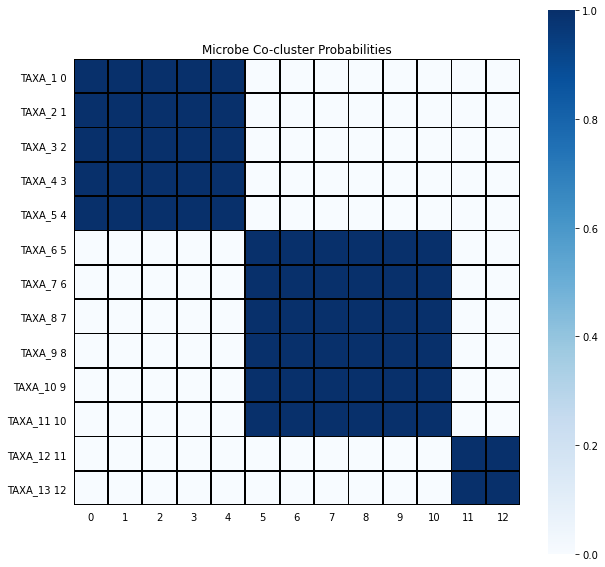

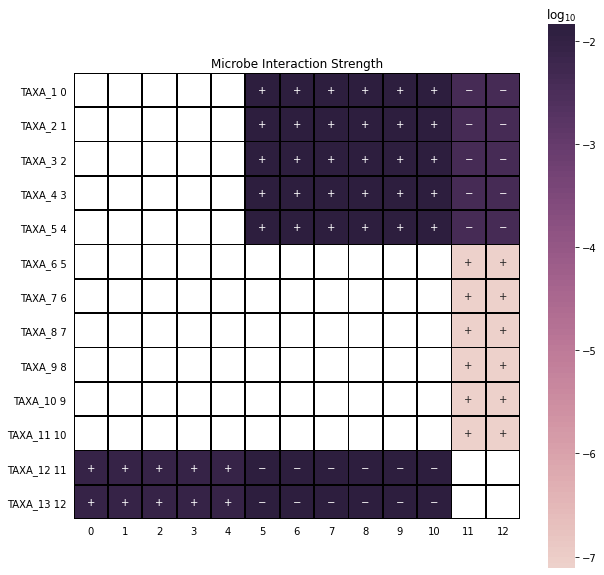

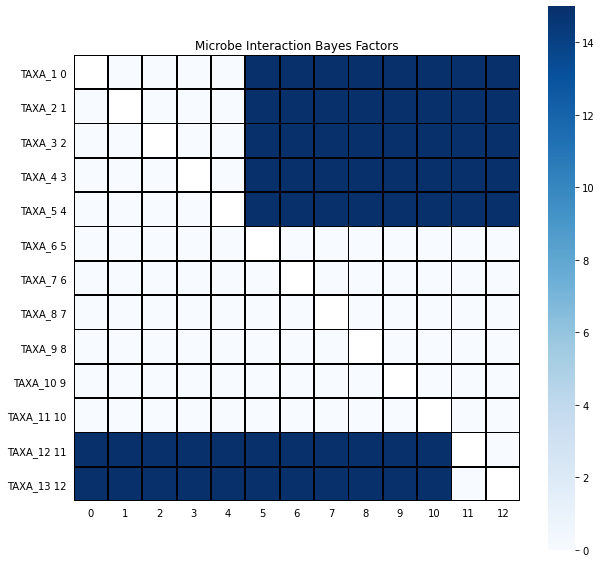

In [37]:
# Plot the posterior
clustering = mcmc.graph[STRNAMES.CLUSTERING_OBJ]
coclusters = md2.summary(clustering.coclusters)['mean']
md2.visualization.render_cocluster_probabilities(coclusters, taxa=study.taxa)

interactions = mcmc.graph[STRNAMES.INTERACTIONS_OBJ]
A = md2.summary(interactions, set_nan_to_0=True)['mean']
md2.visualization.render_interaction_strength(A, log_scale=True, taxa=study.taxa, 
                                              center_colors=True)
bf = md2.generate_interation_bayes_factors_posthoc(mcmc)
md2.visualization.render_bayes_factors(bf, taxa=study.taxa)


### Compute the errors between the predicted and the ground truth

Calculate the following statistics:
1. AUCROC of interactions
2. RMSE of interactions
3. RMSE growth values
4. relRMSE of predicted trajectory
5. Normalized mutual information of cluster assignments

In [17]:
# AUCROC
# ------

# Get truth
truth = syn.model.interactions

# Get predicted, set self-interactions as diagonal
pred = mcmc.graph[STRNAMES.INTERACTIONS_OBJ].get_trace_from_disk()
si = mcmc.graph[STRNAMES.SELF_INTERACTION_VALUE].get_trace_from_disk()
for i in range(len(study.taxa)):
    pred[:,i,i] = si[:, i]

roc_per_gibb = md2.metrics.rocauc_posterior_interactions(
    pred=pred, truth=truth, signed=True, per_gibb=True)
print('Average ROCAUC:', np.mean(roc_per_gibb))



Average ROCAUC: 0.815836781210228


In [18]:
# RMSE of interactions
# --------------------
arr = np.zeros(pred.shape[0])
for gibb in range(len(arr)):
    arr[gibb] = md2.metrics.RMSE(truth, pred[gibb])
print('Average RMSE error of interactions:', np.mean(arr))

Average RMSE error of interactions: 0.0333023698635899


In [19]:
# RMSE of growth values
# ---------------------

truth = syn.model.growth
pred = mcmc.graph[STRNAMES.GROWTH_VALUE].get_trace_from_disk()

arr = np.zeros(pred.shape[0])
for gibb in range(len(arr)):
    arr[gibb] = md2.metrics.RMSE(truth, pred[gibb])
print('Average RMSE error of growth values', np.mean(arr))

Average RMSE error of growth values 0.20240757206632654


INFO:model.215: 5/100 - 0.08403563499450684
INFO:model.215: 10/100 - 0.0659632682800293
INFO:model.215: 15/100 - 0.06899833679199219
INFO:model.215: 20/100 - 0.0690000057220459
INFO:model.215: 25/100 - 0.06803393363952637
INFO:model.215: 30/100 - 0.06703066825866699
INFO:model.215: 35/100 - 0.06602954864501953
INFO:model.215: 40/100 - 0.06821250915527344
INFO:model.215: 45/100 - 0.07799649238586426
INFO:model.215: 50/100 - 0.07400012016296387
INFO:model.215: 55/100 - 0.0689992904663086
INFO:model.215: 60/100 - 0.06799936294555664
INFO:model.215: 65/100 - 0.07699847221374512
INFO:model.215: 70/100 - 0.06703448295593262
INFO:model.215: 75/100 - 0.07904362678527832
INFO:model.215: 80/100 - 0.07300758361816406
INFO:model.215: 85/100 - 0.06607413291931152
INFO:model.215: 90/100 - 0.06499743461608887
INFO:model.215: 95/100 - 0.06601977348327637


Average relRMSE error for pred trajectory: 0.007996416197161953


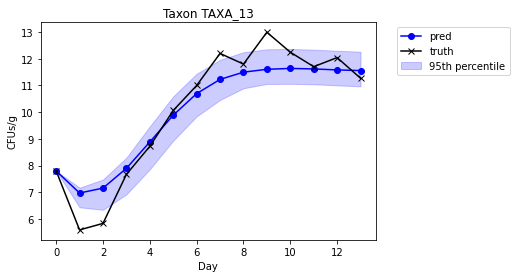

In [21]:
# relRMSE of predicted trajectories
# ---------------------------------

# Simulate a new trajectory
syn.add_subject('subj-validate')

syn.generate_trajectories(
    dt=0.01, init_dist=md2.variables.Uniform(low=2, high=15), 
    processvar=pv, seed=1010101) # only generates a new trajectory for the new subject

# Get the ground truth
truth = syn._data['subj-validate']

# Get the initial conditions
# has the shape [n_taxa, n_times]
initial_conditions = truth[:, 0]

# forward simulate
pred = md2.model.gLVDynamicsSingleClustering.forward_sim_from_chain(
    mcmc=mcmc, subj=None, initial_conditions=initial_conditions,
    times=syn.times, simulation_dt=0.01)
pred.shape

# Plot the predicted trajectory for the last taxa
low = np.percentile(pred[:, -1, :], q=2.5, axis=0)
high = np.percentile(pred[:, -1, :], q=97.5, axis=0)
med = np.percentile(pred[:, -1, :], q=50, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill_between(syn.times, low, high, alpha=0.2, color='blue',
                label='95th percentile')
ax.plot(syn.times, med, color='blue', label='pred', marker='o')
ax.plot(syn.times, truth[-1, :], color='black', marker='x', label='truth')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_title('Taxon {}'.format(study.taxa[len(study.taxa)-1].name))
ax.set_xlabel('Day')
ax.set_ylabel('CFUs/g')

# Get the relRMSE error
errors = np.zeros(pred.shape[0])
for i in range(len(errors)):
    errors[i] = md2.metrics.relRMSE(pred=pred[i], truth=truth)
print('Average relRMSE error for pred trajectory:', np.mean(errors))


In [22]:
# Normalized mutual information for cluster assignments
# -----------------------------------------------------
import sklearn.metrics

truth = syn.G[STRNAMES.CLUSTERING_OBJ].toarray()

clustering = mcmc.graph[STRNAMES.CLUSTERING_OBJ]
coclusters = clustering.coclusters.get_trace_from_disk()

errors = np.zeros(coclusters.shape[0])
for i in range(len(errors)):
    pred = md2.pylab.cluster.toarray_from_cocluster(coclusters[i])
    errors[i] = sklearn.metrics.normalized_mutual_info_score(
        labels_true=truth, labels_pred=pred)
print('Average normalized mutual information:', np.mean(errors))

Average normalized mutual information: 0.8054775321882914


# Semi synthetic
Simulate from a fixed clustering dynamics learned from the data

In [9]:
# Learn a synthetic system
# ------------------------
# Learn the clustering
a0 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A0])['mean']
a1 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A1])['mean']

basepath = 'output/semisynth/unfixed'
os.makedirs(basepath, exist_ok=True)
params = md2.config.MDSINE2ModelConfig(
    basepath=basepath, seed=0, burnin=50, 
    n_samples=100, negbin_a0=a0, negbin_a1=a1, checkpoint=50)
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'
mcmc_uc0 = md2.initialize_graph(params=params, graph_name=uc_toy.name, subjset=uc_toy)
mcmc_uc0 = md2.run_graph(mcmc_uc0, crash_if_error=True)

# Fix the cluster assignments
basepath='output/semisynth/fixed'
params = md2.config.MDSINE2ModelConfig(
    basepath=basepath, seed=0, burnin=50, n_samples=100, 
    negbin_a0=a0, negbin_a1=a1, checkpoint=50)
params.LEARN[STRNAMES.CLUSTERING] = False
params.LEARN[STRNAMES.CONCENTRATION] = False
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'fixed-clustering'
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value'] = 'output/semisynth/unfixed/mcmc.pkl'
mcmc = md2.initialize_graph(params=params, graph_name=uc_toy.name, subjset=uc_toy)
mcmc = md2.run_graph(mcmc, crash_if_error=True)

INFO:base.2727: max_value found: 1797837340792.1643, scaling_factor: 5.5622384590108656e-11
INFO:run.87: Normalizing abundances for a max value of 100. Normalization constant: 5.5622E-11
INFO:run.254: There are 372 qPCR measurements for 3 buckets. Each bucket is 124 measurements long
INFO:run.289: Initializing Filtering
INFO:posterior.2670: Setting up the essential timepoints
INFO:posterior.2683: Essential timepoints: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   6.   7.   8.   9.  10.  11.  14.  16.  18.  21.  21.5 22.  22.5 23.  23.5 24.  25.  28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  33.  35.  35.5 36.  36.5 37.  37.5 38.  39.  42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  47.  50.  50.5 51.  51.5 52.  52.5 53.  54.  57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
INFO:run.289: Initializing Zero inflation
INFO:design_matrices.851: Initializing LHS vector
INFO:design_matrices.1006: Initializing growth design matrix
INFO:design_matrices.932: Initializing self-inte

INFO:run.374: 		prior.loc: 0
INFO:run.372: 	perturbation Vancomycin
INFO:run.373: 		value: {100115: 0, 100116: 0, 100117: 0, 100118: 0, 100119: 0, 100120: 0, 100121: 0, 100122: 0, 100123: 0, 100124: 0, 100125: 0, 100126: 0, 100127: 0, 100128: 0, 100129: 0}
INFO:run.374: 		prior.loc: 0
INFO:run.372: 	perturbation Gentamicin
INFO:run.373: 		value: {100115: 0, 100116: 0, 100117: 0, 100118: 0, 100119: 0, 100120: 0, 100121: 0, 100122: 0, 100123: 0, 100124: 0, 100125: 0, 100126: 0, 100127: 0, 100128: 0, 100129: 0}
INFO:run.374: 		prior.loc: 0
INFO:run.375: Perturbation prior variances:
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.377: 		dof: 2.5
INFO:run.378: 		scale: 2000.0
INFO:run.379: 		value: 10000.0
INFO:run.380: Perturbation indicators:
INFO:run.383: 	perturbation High Fat Diet: [False False False False False False False False False False False False 

INFO:inference.456: Cluster interaction probability: 0.6043018889441922
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.026000499725341797s
perturbation High Fat Diet (11/15): [ True  True False  True  True  True  True  True  True  True False  True  True False False]
perturbation Vancomycin (9/15): [False False False False  True  True  True False  True  True  True False  True  True  True]
perturbation Gentamicin (11/15): [False  True  True False  True False  True  True False  True  True  True  True  True  True]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.5920580173583005
	perturbation Vancomycin: 0.549680099301045
	perturbation Gentamicin: 0.65283684507178
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.13888075 0.38883838 0.74198946 0.31702922 0.6896659  0

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.11337249 0.38859499 0.33014617 0.16887064 0.59203325 0.69092359 0.49483672 0.29434092 0.33698284 0.16648646 0.2863119  0.41301181 1.11932416 1.0522816  0.15503763]
Self Interactions:
[6.04604003e-02 1.92413895e-01 1.93158557e-01 6.93214556e-01 9.73754823e-01 8.24754963e-01 9.56571917e-01 7.91711182e-01 6.63315959e+01 1.04319589e+02 9.47963187e-01 1.11336927e+02 3.82490755e+00 3.12101908e+00 2.96078865e+00]
Interactions:
[-72.45039622  98.12626978 -93.54565691 134.83306348 136.00236192 -53.33429919  -0.20539336 -35.13039073 -92.81703672 -42.11358682  -5.56666542  -0.26252615  -0.22398897   4.83342818   0.49025318  -3.15168711 -38.33025929   2.42504201  27.12817503  11.47123513 -25.27745425  -0.59560067   1.80613917 -17.39412038 -21.3997764   41.28376106  -0.21061135 107.3118267    2.27839898  -0.92800089 -28.07395469 -21.49237607  -2.14547836]
Perturbations:
Perturbation Ma

INFO:inference.456: Clustering concentration parameter: 3448.097096069401
INFO:inference.447: 

Inference iteration 4/100, time: 0.39299893379211426
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False Fal

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 16.452398585960815
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 28.1503907712881
	perturbation Vancomycin: -26.45763937533464
	perturbation Gentamicin: -72.33467992925952
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.3405548591587161, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.2757919470218595, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 462.4907627126775
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4710.193698528133
	perturbation Vancomycin: 1871.8211868210165
	perturbation Genta

INFO:inference.456: Cluster interaction probability: 9.513074801944283e-06
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.010999917984008789s
perturbation High Fat Diet (0/14): [False False False False False False False False False False False False False False]
perturbation Vancomycin (1/14): [False False False False  True False False False False False False False False False]
perturbation Gentamicin (1/14): [False False False False False False False  True False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0033579122500730454
	perturbation Vancomycin: 0.0746805089595243
	perturbation Gentamicin: 0.05108652575560181
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.09508797 0.05021257 0.67220491 0.07540306 0.50136328 0.07226197 

INFO:inference.456: Clustering concentration parameter: 88.03515278651948
INFO:posterior.1585: 0/15: 12
INFO:posterior.1585: 1/15: 7
INFO:posterior.1585: 2/15: 9
INFO:posterior.1585: 3/15: 2
INFO:posterior.1585: 4/15: 1
INFO:posterior.1585: 5/15: 0
INFO:posterior.1585: 6/15: 4
INFO:posterior.1585: 7/15: 13
INFO:posterior.1585: 8/15: 14
INFO:posterior.1585: 9/15: 5
INFO:posterior.1585: 10/15: 11
INFO:posterior.1585: 11/15: 8
INFO:posterior.1585: 12/15: 3
INFO:posterior.1585: 13/15: 10
INFO:posterior.1585: 14/15: 6
INFO:inference.447: 

Inference iteration 9/100, time: 0.8627912998199463
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fal

INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 156.37432526118457
	perturbation Vancomycin: 20.53808434245524
	perturbation Gentamicin: 81.25794655663718
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.4936765075951804, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7714071216402885, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 74.00730122023141
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4488.441349107303
	perturbation Vancomycin: 1817.7365164281423
	perturbation Gentamicin: 3168.222944435099
INFO:inference.456: Process Variance parameter: 4.269004284966113, empirical_var

INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.011998891830444336s
perturbation High Fat Diet (0/14): [False False False False False False False False False False False False False False]
perturbation Vancomycin (3/14): [False  True False False False False False  True False  True False False False False]
perturbation Gentamicin (0/14): [False False False False False False False False False False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.020233801328186665
	perturbation Vancomycin: 0.12651278617704334
	perturbation Gentamicin: 0.009497945751149574
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.6616632  0.36674976 0.57593883 0.19522078 0.48030598 0.34150619 0.18034939 0.34123364 0.02546247 0.00678891 0.23081727 0.30983779 0.582903

INFO:inference.456: Clustering concentration parameter: 296.0224368190666
INFO:inference.447: 

Inference iteration 14/100, time: 0.365999698638916
INFO:inference.456: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fals

INFO:inference.456: Process Variance parameter: 4.140838549153522, empirical_variance: 4.09071
INFO:inference.456: Filtering: no-mp - Time: 0.2720, Acc: [0.634, 0.615, 0.622, 0.623, 0.618], data/sec: 20680.09
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 13
Cluster 100154
	members: ['OTU_17', 'OTU_9', 'OTU_16']
	size: 3
Cluster 100160
	members: ['OTU_13']
	size: 1
Cluster 100175
	members: ['OTU_7']
	size: 1
Cluster 100179
	members: ['OTU_10']
	size: 1
Cluster 100181
	members: ['OTU_5']
	size: 1
Cluster 100183
	members: ['OTU_1']
	size: 1
Cluster 100185
	members: ['OTU_6']
	size: 1
Cluster 100186
	members: ['OTU_18']
	size: 1
Cluster 100187
	members: ['OTU_8']
	size: 1
Cluster 100189
	members: ['OTU_3']
	size: 1
Cluster 100191
	members: ['OTU_4']
	size: 1
Cluster 100193
	members: ['OTU_12']
	size: 1
Cluster 100194
	members: ['OTU_2']
	size: 1
no mp - Total time: 0.446000337600708
INFO:inference.456: Clusteri

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 3.358772701106344
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 53.590013475648405
	perturbation Vancomycin: 57.862769813821
	perturbation Gentamicin: -135.39893013639534
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5683769711832217, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.0890186577351004, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 25.67923971303971
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 54252.7669649094
	perturbation Vancomycin: 3756.6911121095454
	perturbation Gentami

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 10.19790711035418
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 100.53885263209533
	perturbation Vancomycin: 20.79504632717145
	perturbation Gentamicin: 100.84023198028589
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.14495067566962627, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.9696825030964185, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 68.4567102198941
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 14147.426292385268
	perturbation Vancomycin: 3999.5646884126454
	perturbation Gent

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.79508747 0.39449399 0.60322871 0.08643502 0.47175138 0.25397105 0.31035797 0.31011284 0.16236486 0.19428609 0.51092815 0.07466683 1.24452173 0.88750287 0.33543884]
Self Interactions:
[  0.28715886   0.21592317   0.33241744   3.07829437   0.64936087   0.57066249   1.72839398   0.93828919 186.17469328 107.36673294   2.16406355  54.65717902   5.01337987   3.84123539   5.47723169]
Interactions:
[-1.34497766 -0.12949302]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.34642878]
	 perturbation Gentamicin: []
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 2.1244405856306017
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 13.526869696912074
	perturbation Vancomycin: 42.1

INFO:inference.456: Cluster interaction probability: 0.03004264249514047
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.009982824325561523s
perturbation High Fat Diet (0/12): [False False False False False False False False False False False False]
perturbation Vancomycin (1/12): [ True False False False False False False False False False False False]
perturbation Gentamicin (1/12): [False False False False False False False False False False  True False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 5.1049575320348055e-05
	perturbation Vancomycin: 0.1692775205149808
	perturbation Gentamicin: 0.20217154112192734
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.62176898 0.34763856 0.68748121 0.08499238 0.4695292  0.53881491 0.45433607 0.39738528 0.10872566 0.25

INFO:posterior.1585: 3/15: 13
INFO:posterior.1585: 4/15: 4
INFO:posterior.1585: 5/15: 8
INFO:posterior.1585: 6/15: 9
INFO:posterior.1585: 7/15: 14
INFO:posterior.1585: 8/15: 6
INFO:posterior.1585: 9/15: 5
INFO:posterior.1585: 10/15: 12
INFO:posterior.1585: 11/15: 2
INFO:posterior.1585: 12/15: 10
INFO:posterior.1585: 13/15: 3
INFO:posterior.1585: 14/15: 1
INFO:inference.447: 

Inference iteration 25/100, time: 0.7900004386901855
INFO:inference.456: Cluster interaction indicator parameter: [False False False  True False False False False False False False False False False False False False False False  True False False False  True False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False  True False  True False False Fa

INFO:inference.456: Filtering: no-mp - Time: 0.2770, Acc: [0.633, 0.635, 0.615, 0.637, 0.636], data/sec: 20304.33
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 10
Cluster 100207
	members: ['OTU_17', 'OTU_7', 'OTU_6', 'OTU_16']
	size: 4
Cluster 100231
	members: ['OTU_1', 'OTU_8']
	size: 2
Cluster 100240
	members: ['OTU_13', 'OTU_2']
	size: 2
Cluster 100242
	members: ['OTU_5']
	size: 1
Cluster 100244
	members: ['OTU_9']
	size: 1
Cluster 100246
	members: ['OTU_10']
	size: 1
Cluster 100247
	members: ['OTU_18']
	size: 1
Cluster 100251
	members: ['OTU_3']
	size: 1
Cluster 100253
	members: ['OTU_12']
	size: 1
Cluster 100255
	members: ['OTU_4']
	size: 1
no mp - Total time: 0.4329993724822998
INFO:inference.456: Clustering concentration parameter: 26.94289324668471
INFO:inference.447: 

Inference iteration 27/100, time: 0.3310425281524658
INFO:inference.456: Cluster interaction indicator parameter: [ True False Fals

INFO:inference.456: Process Variance parameter: 3.467352221535047, empirical_variance: 3.52300
INFO:inference.456: Filtering: no-mp - Time: 0.2740, Acc: [0.626, 0.612, 0.628, 0.628, 0.612], data/sec: 20531.74
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 10
Cluster 100207
	members: ['OTU_17', 'OTU_7', 'OTU_6', 'OTU_16']
	size: 4
Cluster 100231
	members: ['OTU_1', 'OTU_8']
	size: 2
Cluster 100240
	members: ['OTU_13', 'OTU_2']
	size: 2
Cluster 100242
	members: ['OTU_5']
	size: 1
Cluster 100244
	members: ['OTU_9']
	size: 1
Cluster 100246
	members: ['OTU_10']
	size: 1
Cluster 100247
	members: ['OTU_18']
	size: 1
Cluster 100251
	members: ['OTU_3']
	size: 1
Cluster 100253
	members: ['OTU_12']
	size: 1
Cluster 100255
	members: ['OTU_4']
	size: 1
no mp - Total time: 0.4329993724822998
INFO:inference.456: Clustering concentration parameter: 18.990508800173227
INFO:posterior.1585: 0/15: 7
INFO:posterior.1585: 1/15: 1

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4670233390869742, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.403308442464499, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 12.455414982186138
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 8034.858508336491
	perturbation Vancomycin: 1710.980978809604
	perturbation Gentamicin: 784.820803277324
INFO:inference.456: Process Variance parameter: 3.41562127734201, empirical_variance: 3.47771
INFO:inference.456: Filtering: no-mp - Time: 0.2670, Acc: [0.641, 0.615, 0.598, 0.631, 0.619], data/sec: 21070.30
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 10
Clu

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7217800769173863, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.6683689248283455, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 21.3245710546052
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1367.666637312224
	perturbation Vancomycin: 766.8062349411834
	perturbation Gentamicin: 3712.289517492893
INFO:inference.456: Process Variance parameter: 3.3959177140317958, empirical_variance: 3.40323
INFO:inference.456: Filtering: no-mp - Time: 0.2670, Acc: [0.633, 0.620, 0.631, 0.666, 0.613], data/sec: 21064.73
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 10
C

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.7512514918333144, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.051038049490372, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 59.47769265090355
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 507.0975056723121
	perturbation Vancomycin: 1321.9245506718044
	perturbation Gentamicin: 2036.903076324488
INFO:inference.456: Process Variance parameter: 3.402256530920826, empirical_variance: 3.32714
INFO:inference.456: Filtering: no-mp - Time: 0.2780, Acc: [0.628, 0.602, 0.614, 0.650, 0.609], data/sec: 20233.91
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cl

INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 100207
	members: ['OTU_16', 'OTU_17', 'OTU_6', 'OTU_5', 'OTU_7']
	size: 5
Cluster 100242
	members: ['OTU_13']
	size: 1
Cluster 100262
	members: ['OTU_2', 'OTU_1', 'OTU_8', 'OTU_10']
	size: 4
Cluster 100280
	members: ['OTU_18']
	size: 1
Cluster 100282
	members: ['OTU_12', 'OTU_3']
	size: 2
Cluster 100288
	members: ['OTU_4']
	size: 1
Cluster 100290
	members: ['OTU_9']
	size: 1
no mp - Total time: 0.33500242233276367
INFO:inference.456: Clustering concentration parameter: 2.6476327794037173
INFO:posterior.1585: 0/15: 3
INFO:posterior.1585: 1/15: 1
INFO:posterior.1585: 2/15: 4
INFO:posterior.1585: 3/15: 9
INFO:posterior.1585: 4/15: 12
INFO:posterior.1585: 5/15: 11
INFO:posterior.1585: 6/15: 10
INFO:posterior.1585: 7/15: 8
INFO:posterior.1585: 8/15: 14
INFO:posterior.1585: 9/15: 7
INFO:posterior.1585: 10/15: 2
INFO:posterior.1585: 11/15: 6
INFO:posterior.15

INFO:inference.456: Cluster interaction probability: 0.08438111538047556
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.004000186920166016s
perturbation High Fat Diet (0/4): [False False False False]
perturbation Vancomycin (1/4): [ True False False False]
perturbation Gentamicin (0/4): [False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.00015349593414716925
	perturbation Vancomycin: 0.6062826139516916
	perturbation Gentamicin: 0.0035264625188093316
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.62834914 0.35387466 0.50442724 0.24765312 1.0237121  0.68951898 0.52319806 0.3318652  0.14115849 0.18070927 0.42756473 0.25282155 1.08594628 1.26008173 0.35396187]
Self Interactions:
[4.18768167e-01 2.53563681e-01 2.29242992e-01 9.50833809e+00 5.

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -13.86257636620126
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 27.978501849028376
	perturbation Vancomycin: 8.623468525836321
	perturbation Gentamicin: 3.0590377567276033
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.8163090655633614, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.7634209543838881, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 43.105213345464456
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2646.8238425744103
	perturbation Vancomycin: 2018.956351499195
	perturbation Gen

INFO:inference.456: Clustering concentration parameter: 1.222632254024677
INFO:inference.447: 

Inference iteration 44/100, time: 0.31099772453308105
INFO:inference.456: Cluster interaction indicator parameter: [ True False False  True False False False  True False False False False False False False False False False False False]
total time: 0.012012004852294922, n_interactions: 3/20, 0.15
INFO:inference.456: Cluster interaction probability: 0.1326804697996742
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.007972002029418945s
perturbation High Fat Diet (0/5): [False False False False False]
perturbation Vancomycin (1/5): [ True False False False False]
perturbation Gentamicin (0/5): [False False False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.06323218926396762
	perturbation Vancomycin: 0.2758478583239249
	

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.59811155 0.42814742 0.54168437 0.18600103 0.76059954 0.99466302 0.82034298 0.4905009  0.1121394  0.04890201 0.29810462 0.3300236  1.21265704 1.13571718 0.08862902]
Self Interactions:
[  0.35646139   0.24707006   0.23825672   9.02145999   0.19590776   0.45822667   0.40244027   1.55627198 135.78800344 150.20711248   1.7938208   90.08487986   3.31962003   2.70615077   2.87781208]
Interactions:
[-0.18274383]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-0.89217266]
	 perturbation Gentamicin: []
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 7.066085585020877
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 43.42147162101267
	perturbation Vancomycin: 23.079808954534602

INFO:inference.456: Process Variance parameter: 2.9930012087326, empirical_variance: 2.96613
INFO:inference.456: Filtering: no-mp - Time: 0.2580, Acc: [0.645, 0.604, 0.636, 0.611, 0.616], data/sec: 21802.35
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100207
	members: ['OTU_17', 'OTU_5', 'OTU_6', 'OTU_16', 'OTU_7']
	size: 5
Cluster 100262
	members: ['OTU_10', 'OTU_2', 'OTU_12', 'OTU_1', 'OTU_4', 'OTU_13']
	size: 6
Cluster 100305
	members: ['OTU_18', 'OTU_9', 'OTU_3', 'OTU_8']
	size: 4
no mp - Total time: 0.1649777889251709
INFO:inference.456: Clustering concentration parameter: 1.4416645144112217
INFO:posterior.1585: 0/15: 14
INFO:posterior.1585: 1/15: 12
INFO:posterior.1585: 2/15: 8
INFO:posterior.1585: 3/15: 3
INFO:posterior.1585: 4/15: 1
INFO:posterior.1585: 5/15: 6
INFO:posterior.1585: 6/15: 5
INFO:posterior.1585: 7/15: 2
INFO:posterior.1585: 8/15: 11
INFO:posterior.1585: 9/15: 13
INFO:poster

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.022639504687605217
	perturbation Vancomycin: 0.29138719972538607
	perturbation Gentamicin: 0.10368903860380017
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.80031193 0.38628434 0.76624862 0.08421609 0.88328962 0.70200612 0.7176599  0.69016056 0.13309459 0.2216119  0.38490831 0.04488763 1.31476026 0.8943853  0.57428348]
Self Interactions:
[4.27543692e-01 2.98296202e-01 2.50561918e-01 1.02004788e+01 1.75935631e-01 2.91610223e-01 6.37229642e-01 1.72933410e+00 1.59394466e+02 2.34777925e+02 2.01178071e+00 8.35754619e+01 2.51021811e+00 3.36553734e+00 5.72108136e+00]
Interactions:
[-0.16293277]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-0.80636172]
	 perturbation Gentamicin: [-1.49203

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.0703035510895176, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.0401964026102046, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 56.6899618179315
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4573.221335735359
	perturbation Vancomycin: 3979.850785322681
	perturbation Gentamicin: 1811.08039618511
INFO:inference.456: Process Variance parameter: 2.8276393894327834, empirical_variance: 2.86935
INFO:inference.456: Filtering: no-mp - Time: 0.2830, Acc: [0.615, 0.613, 0.615, 0.652, 0.605], data/sec: 19874.52
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cl

INFO:inference.456: Cluster interaction probability: 0.1102030701461803
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.0050008296966552734s
perturbation High Fat Diet (0/3): [False False False]
perturbation Vancomycin (1/3): [ True False False]
perturbation Gentamicin (1/3): [False False  True]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.02625087083235413
	perturbation Vancomycin: 0.23503088454618035
	perturbation Gentamicin: 0.5916201351363407
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.785155   0.66436911 0.81661496 0.25103608 0.55806552 0.59795906 0.43994829 0.73066265 0.33076759 0.33269677 0.66989455 0.10505549 0.93514939 0.83922315 0.71971621]
Self Interactions:
[3.07041925e-01 3.27549609e-01 2.00977618e-01 1.04812267e+01 1.23073691e-01 6.84340959

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -1.183656755372128
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -136.44784067439969
	perturbation Vancomycin: -26.718133573080525
	perturbation Gentamicin: 17.57578696764979
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.0767136112215123, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.3790569553283336, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 20.093213676831276
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 24745.824523314113
	perturbation Vancomycin: 2512.895912811492
	perturbation 

INFO:inference.456: Clustering concentration parameter: 0.616401867308753
INFO:posterior.1585: 0/15: 10
INFO:posterior.1585: 1/15: 2
INFO:posterior.1585: 2/15: 7
INFO:posterior.1585: 3/15: 5
INFO:posterior.1585: 4/15: 0
INFO:posterior.1585: 5/15: 3
INFO:posterior.1585: 6/15: 13
INFO:posterior.1585: 7/15: 9
INFO:posterior.1585: 8/15: 12
INFO:posterior.1585: 9/15: 14
INFO:posterior.1585: 10/15: 11
INFO:posterior.1585: 11/15: 8
INFO:posterior.1585: 12/15: 6
INFO:posterior.1585: 13/15: 4
INFO:posterior.1585: 14/15: 1
INFO:inference.447: 

Inference iteration 61/100, time: 0.493025541305542
INFO:inference.456: Cluster interaction indicator parameter: [ True  True False False False  True]
total time: 0.006014823913574219, n_interactions: 3/6, 0.50
INFO:inference.456: Cluster interaction probability: 0.2379047578720197
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.005986928939819336s
perturbation High Fat Diet (0/4): [False False False False]
perturba

INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.65163855 0.56756829 0.58977139 0.32921564 0.80644993 0.8168133  0.63205478 0.6632107  0.22626622 0.37063908 0.60729064 0.38066386 1.18209228 0.96148114 0.6866253 ]
Self Interactions:
[3.19189436e-01 2.07846134e-01 2.07604081e-01 5.20475182e+00 7.51819097e-02 3.45646023e-01 8.59679417e-01 7.98787754e-01 2.38650633e+02 1.71331541e+02 3.41487604e+00 1.25871814e+02 3.15431877e+00 3.91020634e+00 1.97059719e+00]
Interactions:
[-0.93685576 -0.05975863 -1.02792516]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-0.97275083]
	 perturbation Gentamicin: []
INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -4.468234861988806
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -4.3707

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.1666207325370896, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.975169124613961, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 45.24984403848461
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5853.623836752447
	perturbation Vancomycin: 3934.0770080974153
	perturbation Gentamicin: 5422.034925994741
INFO:inference.456: Process Variance parameter: 2.5806774736037186, empirical_variance: 2.57891
INFO:inference.456: Filtering: no-mp - Time: 0.2755, Acc: [0.635, 0.624, 0.608, 0.604, 0.604], data/sec: 20417.60
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5


INFO:inference.456: Clustering concentration parameter: 4.256746568885342
INFO:inference.447: 

Inference iteration 68/100, time: 0.32286548614501953
INFO:inference.456: Cluster interaction indicator parameter: [ True False  True False False False False False False False False False False False False False False False False  True]
total time: 0.009996891021728516, n_interactions: 3/20, 0.15
INFO:inference.456: Cluster interaction probability: 0.12570742545579774
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.0060002803802490234s
perturbation High Fat Diet (0/5): [False False False False False]
perturbation Vancomycin (1/5): [ True False False False False]
perturbation Gentamicin (1/5): [False False False False  True]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.057508148919926144
	perturbation Vancomycin: 0.049065788132113

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.05731839327908066
	perturbation Vancomycin: 0.3086289126015055
	perturbation Gentamicin: 0.09818264708306
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.75471201 0.37818391 0.74596967 0.14160622 0.85746256 0.85050197 0.78996002 0.60685738 0.19214987 0.18599677 0.54582437 0.15191825 1.27363835 1.22006846 0.69198694]
Self Interactions:
[5.44469245e-01 3.14381235e-01 1.94436599e-01 7.72350826e+00 2.58524966e-01 4.51450457e-01 1.49048809e-01 1.76636441e+00 2.05011144e+02 1.88253454e+02 2.99569266e+00 1.68543654e+02 3.13877993e+00 3.54390523e+00 5.23940514e-01]
Interactions:
[-0.16362341 -0.52344696 -0.86517974]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-0.92169414]
	 perturbation Ge

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.914413785067707, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.1100285076205068, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 49.812197756425945
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1321.4964807063984
	perturbation Vancomycin: 734.6172849116489
	perturbation Gentamicin: 839.6201378895638
INFO:inference.456: Process Variance parameter: 2.4777637981278415, empirical_variance: 2.48362
INFO:inference.456: Filtering: no-mp - Time: 0.3010, Acc: [0.644, 0.612, 0.637, 0.612, 0.604], data/sec: 18687.66
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5

INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100207
	members: ['OTU_17', 'OTU_6', 'OTU_18', 'OTU_16', 'OTU_5', 'OTU_7']
	size: 6
Cluster 100305
	members: ['OTU_2', 'OTU_4', 'OTU_13', 'OTU_1']
	size: 4
Cluster 100410
	members: ['OTU_10', 'OTU_3', 'OTU_9', 'OTU_8']
	size: 4
Cluster 100441
	members: ['OTU_12']
	size: 1
no mp - Total time: 0.2105116844177246
INFO:inference.456: Clustering concentration parameter: 1.9433649970161848
INFO:inference.447: 

Inference iteration 75/100, time: 0.322005033493042
INFO:inference.456: Cluster interaction indicator parameter: [ True False  True False False False False False  True False False False]
total time: 0.010001420974731445, n_interactions: 3/12, 0.25
INFO:inference.456: Cluster interaction probability: 0.2782251525226648
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.005999088287353516s
perturbation High Fat Diet 

INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.004320414349864127
	perturbation Vancomycin: 0.047012133570686336
	perturbation Gentamicin: 0.03572172937127516
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.66192241 0.40082205 0.75000324 0.20521227 0.86304837 0.90752178 0.657599   0.40482453 0.43143391 0.35443499 0.90687733 0.0908429  1.45468114 1.19131596 0.78771796]
Self Interactions:
[4.22021799e-01 1.94868593e-01 2.06546510e-01 8.27402503e+00 2.08025349e-01 3.28195647e-01 3.13657771e-01 8.29224321e-01 1.90506291e+02 2.35543173e+02 2.15577433e+00 1.52392961e+02 2.52012747e+00 3.85283226e+00 2.41764345e+00]
Interactions:
[-0.15179778 -0.54192764 -0.96646356 -0.11254167]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-1.03805982]

INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 80.91872353234368
	perturbation Vancomycin: 4.448272090864227
	perturbation Gentamicin: -141.39139815246858
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.1467972045716395, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.7798831001798816, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 22.581787470424228
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 685.2270830108139
	perturbation Vancomycin: 716.1146349674145
	perturbation Gentamicin: 8278.045126595667
INFO:inference.456: Process Variance parameter: 2.4332844956899455, empirical_

INFO:inference.456: Process Variance parameter: 2.304201495413861, empirical_variance: 2.45874
INFO:inference.456: Filtering: no-mp - Time: 0.2730, Acc: [0.615, 0.608, 0.609, 0.605, 0.613], data/sec: 20602.18
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Cluster 100207
	members: ['OTU_18', 'OTU_7', 'OTU_17', 'OTU_16', 'OTU_5', 'OTU_6']
	size: 6
Cluster 100305
	members: ['OTU_2', 'OTU_1', 'OTU_13', 'OTU_10']
	size: 4
Cluster 100410
	members: ['OTU_9', 'OTU_8', 'OTU_12', 'OTU_4', 'OTU_3']
	size: 5
no mp - Total time: 0.19997072219848633
INFO:inference.456: Clustering concentration parameter: 0.5959370410630707
INFO:inference.447: 

Inference iteration 82/100, time: 0.3296499252319336
INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False  True]
total time: 0.005000591278076172, n_interactions: 2/6, 0.33
INFO:inference.456: Cluster interaction probability: 0.1888867095285

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -5.411903579006351
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 126.53823239588348
	perturbation Vancomycin: 51.35112373539638
	perturbation Gentamicin: 6.060692934875761
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.30890684711494276, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.5421307404456903, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 132.55332617775215
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3499.493512854751
	perturbation Vancomycin: 6447.727800006681
	perturbation Ge

INFO:inference.456: Process Variance parameter: 2.5555651504803096, empirical_variance: 2.45284
INFO:inference.456: Filtering: no-mp - Time: 0.2890, Acc: [0.613, 0.620, 0.617, 0.604, 0.616], data/sec: 19463.20
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 4
Cluster 100207
	members: ['OTU_6', 'OTU_18', 'OTU_5', 'OTU_17', 'OTU_7', 'OTU_16']
	size: 6
Cluster 100305
	members: ['OTU_2', 'OTU_13', 'OTU_9', 'OTU_1']
	size: 4
Cluster 100410
	members: ['OTU_12', 'OTU_4', 'OTU_3', 'OTU_8']
	size: 4
Cluster 100492
	members: ['OTU_10']
	size: 1
no mp - Total time: 0.1660003662109375
INFO:inference.456: Clustering concentration parameter: 0.3855250090457216
INFO:inference.447: 

Inference iteration 87/100, time: 0.31999897956848145
INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False False False  True False False False False]
total time: 0.006997346878051758, n_interactions: 2/12, 

INFO:inference.456: Cluster interaction probability: 0.2386967135334957
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.0049746036529541016s
perturbation High Fat Diet (0/3): [False False False]
perturbation Vancomycin (1/3): [ True False False]
perturbation Gentamicin (0/3): [False False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.03265126766822083
	perturbation Vancomycin: 0.11663842989828958
	perturbation Gentamicin: 0.0526810210362794
INFO:inference.456: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.6782926  0.25512666 0.74910907 0.44654758 0.60394137 0.73288358 0.50370842 0.50319791 0.46472989 0.12128556 0.89341423 0.30866448 1.06635136 0.83925783 0.76987281]
Self Interactions:
[4.61187316e-01 2.12273496e-01 2.48544693e-01 2.88524884e+00 1.22026051e-01 4.56645704

INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5031435882784066, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.907903305378094, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 99.52893141060483
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 6224.160434733384
	perturbation Vancomycin: 1543.13801715162
	perturbation Gentamicin: 60388.58175260183
INFO:inference.456: Process Variance parameter: 2.38420150086713, empirical_variance: 2.46525
INFO:inference.456: Filtering: no-mp - Time: 0.2920, Acc: [0.610, 0.613, 0.616, 0.607, 0.628], data/sec: 19263.90
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 3
Clu

INFO:inference.456: Clustering concentration parameter: 0.615299233750806
INFO:inference.447: 

Inference iteration 94/100, time: 0.33396482467651367
INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False  True]
total time: 0.00600123405456543, n_interactions: 2/6, 0.33
INFO:inference.456: Cluster interaction probability: 0.0956165186905601
INFO:inference.456: Perturbation indicator parameter: Perturbation Indicators - time: 0.0050201416015625s
perturbation High Fat Diet (0/3): [False False False]
perturbation Vancomycin (1/3): [ True False False]
perturbation Gentamicin (1/3): [ True False False]
INFO:inference.456: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.08809603222010622
	perturbation Vancomycin: 0.03565548766113413
	perturbation Gentamicin: 0.08977086191695592
INFO:inference.456: Logistic growth parameters (growth, self-interactions, int

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 2.681788739438014
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 213.06172990597295
	perturbation Vancomycin: -113.13762341567029
	perturbation Gentamicin: 17.23294260915946
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5555762390828511, Acceptance rate: 0.96
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.9023687909089504, Acceptance rate: 0.98
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 45.3459666701269
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 8186.00432537024
	perturbation Vancomycin: 1663.1925672950983
	perturbation Gent

INFO:inference.456: Process Variance parameter: 2.3874075713567677, empirical_variance: 2.33502
INFO:inference.456: Filtering: no-mp - Time: 0.2843, Acc: [0.631, 0.596, 0.621, 0.636, 0.624], data/sec: 19784.37
INFO:inference.456: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 100207
	members: ['OTU_7', 'OTU_16', 'OTU_18', 'OTU_5', 'OTU_6', 'OTU_17', 'OTU_8']
	size: 7
Cluster 100305
	members: ['OTU_1', 'OTU_13', 'OTU_2']
	size: 3
Cluster 100410
	members: ['OTU_3', 'OTU_12', 'OTU_4']
	size: 3
Cluster 100526
	members: ['OTU_9']
	size: 1
Cluster 100534
	members: ['OTU_10']
	size: 1
no mp - Total time: 0.22251105308532715
INFO:inference.456: Clustering concentration parameter: 1.7471638267313294
INFO:inference.447: 

Inference iteration 99/100, time: 0.3400108814239502
INFO:inference.456: Cluster interaction indicator parameter: [ True False False False False False False False False  True  True  True False False False Fals

INFO:run.289: Initializing Cluster interaction value parameter
INFO:run.289: Initializing Cluster interaction indicator parameter
INFO:design_matrices.1453: Initializing interactions base design matrix
INFO:design_matrices.1582: Initialized interactions mixing design matrix
INFO:design_matrices.1923: Initializing interactions matrix
INFO:run.289: Initializing Cluster interaction probability
INFO:posterior.4135: Indicator Probability initialization results:
	prior a: 0.5
	prior b: 4.9146595004514415
	value: 0.09234190994988938
INFO:run.289: Initializing Mean parameter for the normal prior of the perturbation parameter
INFO:run.289: Initializing Variance parameter for the normal prior of the perturbation parameter
INFO:posterior.8102: Prior Variance Interactions initialization results:
	prior dof: 2.5
	prior scale: 2000.0
	value: 10000.0
INFO:posterior.8102: Prior Variance Interactions initialization results:
	prior dof: 2.5
	prior scale: 2000.0
	value: 10000.0
INFO:posterior.8102: Prior

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 0
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 0
	perturbation Vancomycin: 0
	perturbation Gentamicin: 0
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: 1
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: 1.1868489034922658
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 14086.10319720794
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 10000.0
	perturbation Vancomycin: 10000.0
	perturbation Gentamicin: 10000.0
INFO:inference.456: Process Variance parameter: NA
INFO:inference.456: Filtering: parallel
INFO:inference.447: 

Inference iteration 1/100, time: 0

INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -68.09790793123923
	perturbation Vancomycin: 24.329666161889836
	perturbation Gentamicin: -45.55458731417844
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.37258651808739407, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.9427368485535569, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 467.462903260416
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2868.838623213101
	perturbation Vancomycin: 2025.985458475806
	perturbation Gentamicin: 4721.935296306459
INFO:inference.456: Process Variance parameter: 4.492254866345717, empirical_va

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 11.09790874692667
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -49.399434588193145
	perturbation Vancomycin: -0.5668279954758456
	perturbation Gentamicin: -160.64664587478325
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.6686788627663933, Acceptance rate: 0.8333333333333334
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.37881079049494226, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 110.88608426213095
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1633.6945582201754
	perturbation Vancomycin: 942.439745809944

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 3.6700279465172048
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 83.23787664199091
	perturbation Vancomycin: -19.467103529795462
	perturbation Gentamicin: -225.10282924480674
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.36264582003984525, Acceptance rate: 0.8888888888888888
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.09933731894980176, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 627.5965016837238
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 12428.126198420869
	perturbation Vancomycin: 1035.526818476082

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 3.000689002228267
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -48.2413541267313
	perturbation Vancomycin: -10.417585442818806
	perturbation Gentamicin: -126.65586769949641
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5407578677288898, Acceptance rate: 0.9166666666666666
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.37952486818436937, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 147.93158893475638
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 16184.235250923217
	perturbation Vancomycin: 1013.7568138436617

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.22769621357401093
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 206.70884000606503
	perturbation Vancomycin: 22.231696795942632
	perturbation Gentamicin: -105.5515156768873
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.17047639023132843, Acceptance rate: 0.9333333333333333
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.9118530505808096, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 38.81905549994081
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1754.4202086112361
	perturbation Vancomycin: 2519.857230890999

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 9.662439324467258
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -63.072134980480676
	perturbation Vancomycin: -102.8671196045024
	perturbation Gentamicin: -94.42775046013723
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.26395829801447546, Acceptance rate: 0.9444444444444444
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.4893740888264784, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 58.953725260151174
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5586.025366780175
	perturbation Vancomycin: 2841.616107125404
	

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.514819502016132
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -100.66388595049673
	perturbation Vancomycin: 1.7581579133280667
	perturbation Gentamicin: 163.49809460105797
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.455838931087948, Acceptance rate: 0.9523809523809523
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.4846798670852464, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 56.05728991192845
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 6019.009827961446
	perturbation Vancomycin: 2158.3498803643024
	p

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 10.578762005925368
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 218.00887017566146
	perturbation Vancomycin: 10.508640186995944
	perturbation Gentamicin: -90.11201469403044
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3385313600313515, Acceptance rate: 0.9583333333333334
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.493528237503594, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 249.59904087112176
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1137.865439314043
	perturbation Vancomycin: 696.521925467642
	per

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.5507894839074944
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -185.0919920034092
	perturbation Vancomycin: -18.161294771476996
	perturbation Gentamicin: -20.09221273185249
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9190685700244401, Acceptance rate: 0.9629629629629629
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.800798315194129, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 14.80235662899079
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4469.508059977139
	perturbation Vancomycin: 764.7936115449452
	p

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -1.8670948670458807
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -119.74276956385663
	perturbation Vancomycin: 39.66737351842299
	perturbation Gentamicin: -41.021869278032874
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.989560563725282, Acceptance rate: 0.9666666666666667
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.3658663893603666, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 14.87386826409482
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3631.8199199125893
	perturbation Vancomycin: 849.3637699596169
	

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 4.020661994680977
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 106.57242572841751
	perturbation Vancomycin: -8.37557395117783
	perturbation Gentamicin: -36.045363799384944
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8111664216552281, Acceptance rate: 0.9696969696969697
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.350363797330198, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 59.52468012764073
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2727.5605355197417
	perturbation Vancomycin: 1310.459317072502
	per

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -7.059862426443598
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 140.10467894094964
	perturbation Vancomycin: 183.6412873332955
	perturbation Gentamicin: 130.11347020831906
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.4637358583008908, Acceptance rate: 0.9722222222222222
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.338848810847244, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 89.2159105477748
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2975.9524445000798
	perturbation Vancomycin: 21298.204595885512
	per

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 0.15326406274504245
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 135.59464915488869
	perturbation Vancomycin: 29.427441778524102
	perturbation Gentamicin: 33.879825230846606
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5283842047349925, Acceptance rate: 0.9743589743589743
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.4554471132869193, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 25.91662727928375
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2681.5855874638473
	perturbation Vancomycin: 1424.747385041481
	

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 3.246924064018898
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -93.79475952614882
	perturbation Vancomycin: 13.869235457396615
	perturbation Gentamicin: -139.48401928346433
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0257882863803383, Acceptance rate: 0.9761904761904762
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.0438310575938528, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 28.951146953275543
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 742.3966000277602
	perturbation Vancomycin: 9973.35445075867
	pe

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 2.9781703072061947
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 125.15849696328642
	perturbation Vancomycin: -23.058340252378635
	perturbation Gentamicin: -101.3491026593933
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3313223309777384, Acceptance rate: 0.9777777777777777
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.8498994108878333, Acceptance rate: 0.9555555555555556
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 12.766313758841818
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 777.8179431743758
	perturbation Vancomycin: 2499

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.4247185662915782
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 111.25428478378694
	perturbation Vancomycin: 1.377274260179193
	perturbation Gentamicin: 65.28852023734808
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.3925301809149395, Acceptance rate: 0.9791666666666666
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.3245699436300737, Acceptance rate: 0.9583333333333334
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 19.348992596699595
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 715.5024078712555
	perturbation Vancomycin: 18763.

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -1.3574477982796564
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 153.24171768567686
	perturbation Vancomycin: -13.12156442940173
	perturbation Gentamicin: 81.32362345468613
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.7733148985293231, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 2.4138936373188082, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 33.11473873709359
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1545.9118288935053
	perturbation Vancomycin: 1072.1069223049365
	perturbation 

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.32180118430557625
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 120.78961346112725
	perturbation Vancomycin: 146.58171795860844
	perturbation Gentamicin: 171.53811663232878
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5912011299746087, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.4491867523749904, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 57.74177686688639
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2217.1277980514183
	perturbation Vancomycin: 6117.730959842264
	perturbation

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 2.7608597094268013
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 99.98868676134418
	perturbation Vancomycin: -7.454793463557786
	perturbation Gentamicin: 132.3544230805223
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.5901913776034033, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 4.120809593547814, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 67.5109573676108
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1543.7659363683
	perturbation Vancomycin: 2347.871776557205
	perturbation Gentamici

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -1.520531070557872
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -97.59209971282051
	perturbation Vancomycin: 0.8796777703381743
	perturbation Gentamicin: 112.04641498590485
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.668280973468378, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.577043188494866, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 59.85882765449143
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2133.369706843265
	perturbation Vancomycin: 4105.273957951309
	perturbation Genta

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 1.4859050356714363
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -57.72800381336906
	perturbation Vancomycin: 70.2617602600365
	perturbation Gentamicin: 57.09582027006035
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.1007400459228958, Acceptance rate: 1.0
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.9670166607468444, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 15.14134349613984
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 11644.894843407632
	perturbation Vancomycin: 4013.498405452355
	perturbation Genta

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.1629885462304106
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 14.52996540743586
	perturbation Vancomycin: -28.142939853007263
	perturbation Gentamicin: 138.2018116670181
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.9054989700946274, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 3.9228933949333062, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 19.19178144399557
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 9820.104605448052
	perturbation Vancomycin: 2260.7716916449267
	perturbation G

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 3.483402134236057
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 73.5328011812402
	perturbation Vancomycin: -10.04028031190116
	perturbation Gentamicin: -210.91299053408622
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.5563445036402532, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 4.467502272428464, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 25.84396125675531
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 6436.794577129082
	perturbation Vancomycin: 2914.3327479390186
	perturbation Gent

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.9551980501602217
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 96.35532049680583
	perturbation Vancomycin: -17.409553304801374
	perturbation Gentamicin: -0.241879127611657
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.607901669969808, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 4.488491455976822, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 28.970818211692222
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4261.427017197134
	perturbation Vancomycin: 750.2340942973185
	perturbation Ge

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 4.811038272237627
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -66.61932417538408
	perturbation Vancomycin: -17.74645392689254
	perturbation Gentamicin: 84.99691735318859
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3401510447885137, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 4.801093729853566, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 77.33396689684002
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5396.548436432088
	perturbation Vancomycin: 2980.5104171898865
	perturbation Gent

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.13712919671543933
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -55.417508368440835
	perturbation Vancomycin: 13.45557990850938
	perturbation Gentamicin: 42.487971217889566
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8719269845753792, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 5.601346473220155, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 19.78110856273774
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 24810.114502868455
	perturbation Vancomycin: 2438.8164648052452
	perturbation

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -3.782624213805242
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 14.29802718594958
	perturbation Vancomycin: -31.47254331285146
	perturbation Gentamicin: -0.3320552944249348
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0369027543783755, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 6.121996760282917, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 27.32819734233588
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 8269.949266181351
	perturbation Vancomycin: 1148.124129293846
	perturbation Gen

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 0.7640619444944788
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -206.6990783982758
	perturbation Vancomycin: 7.677054121830633
	perturbation Gentamicin: 7.672256531270713
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.5446990478648692, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 5.9965054120683785, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 19.752202564577697
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 61344.489458208845
	perturbation Vancomycin: 994.6900398723683
	perturbation Ge

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: 8.202095589323791
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -35.00931168528064
	perturbation Vancomycin: 32.79751283035881
	perturbation Gentamicin: 5.826658269906243
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4276506406862826, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 5.484856874394037, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 93.57249371114675
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4066.5317702450475
	perturbation Vancomycin: 1881.146774545069
	perturbation Genta

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -2.3036349939256167
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -19.104782314525984
	perturbation Vancomycin: -39.62767728143889
	perturbation Gentamicin: -18.84651817916954
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.300539060673502, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 6.208529588350716, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 32.11302830231003
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2044.4366801263002
	perturbation Vancomycin: 3127.196963084138
	perturbation G

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -0.82479223816632
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -5.5078768163066165
	perturbation Vancomycin: 38.445216433916336
	perturbation Gentamicin: -14.538417268338279
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4256175234244557, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 5.402465421005608, Acceptance rate: 0.96
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 40.97947844467836
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3940.988377176923
	perturbation Vancomycin: 1178.3991180915498
	perturbation G

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -1.5973984403359243
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -7.22359323225608
	perturbation Vancomycin: 23.614847139300107
	perturbation Gentamicin: 63.44773650746644
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.5173149197014753, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 4.1458476423089134, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 51.05864330927781
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5611.13004244545
	perturbation Vancomycin: 2487.678074517365
	perturbation Genta

INFO:inference.456: Mean parameter for the normal prior of the interaction parameter: -1.2270362273986497
INFO:inference.456: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 19.671992478716927
	perturbation Vancomycin: 16.892467270050005
	perturbation Gentamicin: -178.78541158822983
INFO:inference.456: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.6089144890903446, Acceptance rate: 0.98
INFO:inference.456: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 4.366270859607312, Acceptance rate: 1.0
INFO:inference.456: Variance parameter for the normal prior of the interaction parameter: 14.5362811418712
INFO:inference.456: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 486.11319253042484
	perturbation Vancomycin: 2355.873842746023
	perturbation Ge

INFO:synthetic.175: Forward simulating subj-1
INFO:synthetic.175: Forward simulating subj-2
INFO:synthetic.175: Forward simulating subj-3
INFO:synthetic.175: Forward simulating subj-4


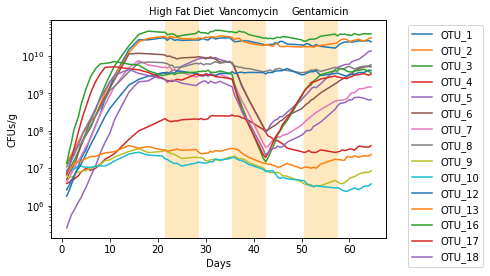

INFO:synthetic.249: Fitting real data


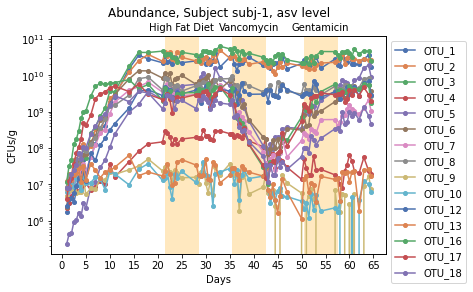

In [17]:
# Make the synthetic system
syn = md2.synthetic.make_semisynthetic(
    mcmc, min_bayes_factor=10, name='semisynth', set_times=True)

# make subject names
syn.set_subjects(['subj-{}'.format(i+1) for i in range(4)])

# Generate the trajectories
# YOURE HERE, WHY IS THIS RETURNING NAN
syn.generate_trajectories(dt=0.01, init_dist=md2.variables.Uniform(
    low=1e5, high=1e7), processvar=md2.model.MultiplicativeGlobal(0.1**2),
    seed=1111)
d = syn._data['subj-1']

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(d.shape[0]):
    ax.plot(syn.times, d[i, :], label=syn.taxa[i].name)
md2.visualization.shade_in_perturbations(ax, perturbations=syn.perturbations, subj='subj-1')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel('Days')
ax.set_ylabel('CFUs/g')
plt.show()


# Simulate noise
study = syn.simulateMeasurementNoise(
    a0=1e-10, a1=0.05, qpcr_noise_scale=0.25, approx_read_depth=50000, 
    name='semi-synth')
md2.visualization.abundance_over_time(
    study['subj-1'], dtype='abs', yscale_log=True)
plt.show()


If you want to have a study object of the True data without noise, use the same function but add very little measurement noise:

INFO:synthetic.249: Fitting real data


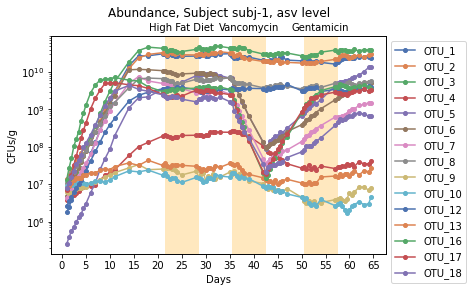

In [18]:
study_no_noise = syn.simulateMeasurementNoise(
    a0=1e-10, a1=1e-10, qpcr_noise_scale=1e-8, approx_read_depth=1000000, 
    name='semi-synth')
md2.visualization.abundance_over_time(
    study_no_noise['subj-1'], dtype='abs', yscale_log=True)
plt.show()

### Subsampling times
Subsample the times of a study using the function `mdsine2.synthetic.subsampple_timepoints`

In [21]:
# Get the times from the Study object
times = study.times(agg='union')
print(times)
print(len(times))

75

[ 1.   2.   2.5  3.5  4.   5.   6.   8.   9.  11.  14.  18.  21.  21.5 22.5 23.  24.  25.  28.5 29.  29.5 30.5 31.  32.  33.  35.5 36.  36.5 37.5 38.  42.  42.5 43.  44.  44.5 45.5 46.  50.  50.5 51.  52.  52.5 54.  57.  57.5 58.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
55


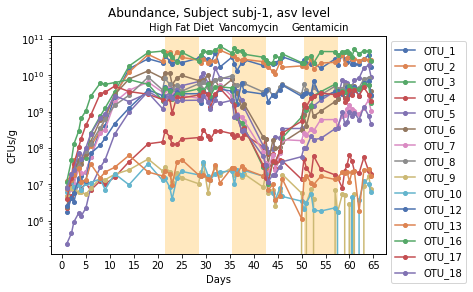

In [29]:
# Subsample to 55 timepoints do not remove times on the perturbations 
# and the first timepoint
from copy import deepcopy

must_keep = [times[0]]
for perturbation in study.perturbations:
    must_keep.append(perturbation.starts['subj-1'])
    must_keep.append(perturbation.ends['subj-1'])

times_new = md2.synthetic.subsample_timepoints(times, N=55, required=must_keep)
print(times_new)
print(len(times_new))

ts_to_delete = []
for t in study['subj-1'].times:
    if t not in times_new:
        ts_to_delete.append(t)
studynew = deepcopy(study)
studynew.pop_times(ts_to_delete)
md2.visualization.abundance_over_time(studynew['subj-1'], dtype='abs', yscale_log=True)
plt.show()

[ 1.   2.5  4.   6.   9.  14.  21.  21.5 23.  25.  28.5 29.5 31.  33.  35.5 36.5 38.  42.5 43.  44.5 46.  50.5 51.  52.5 57.  57.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
35


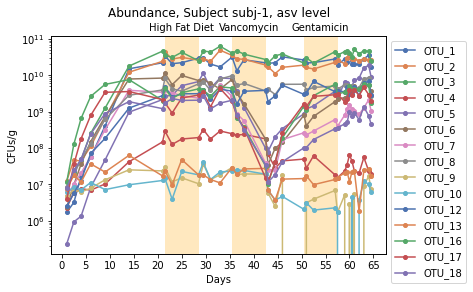

In [32]:
# Further subsample to 35 days
times55 = studynew.times(agg='union')
times35 = md2.synthetic.subsample_timepoints(times55, N=35, required=must_keep)
print(times35)
print(len(times35))

ts_to_delete = []
for t in studynew['subj-1'].times:
    if t not in times35:
        ts_to_delete.append(t)
study35 = deepcopy(studynew)
study35.pop_times(ts_to_delete)
md2.visualization.abundance_over_time(study35['subj-1'], dtype='abs', yscale_log=True)
plt.show()
